In [2]:
import os, sys

from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from data_manager import *
from metadata import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
No vtk


Setting environment for AWS compute node


# Plot for one stack

In [2]:
stack = 'MD658'

In [3]:
_, sec2fn = DataManager.load_sorted_filenames(stack)
first_sec, last_sec = DataManager.load_cropbox(stack)[4:]

In [4]:
# nissl_sections = [sec for sec, fn in sec2fn.iteritems() if not is_invalid(fn) and fn.split('-')[1][0] == 'N' and sec > first_sec and sec < last_sec]
# ntb_sections = [sec for sec, fn in sec2fn.iteritems() if not is_invalid(fn) and fn.split('-')[1][0] == 'F' and sec > first_sec and sec < last_sec]

In [5]:
# compare_pairs = []
# for nissl_sec in nissl_sections:
#     for i in range(1, 10):
#         closest_nissl_sec = nissl_sec + i
#         if closest_nissl_sec in nissl_sections:
#             break
#     compare_pairs.append((nissl_sec, closest_nissl_sec))

In [9]:
nissl2_values = np.arange(0, 257)

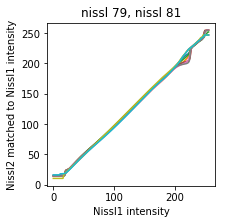

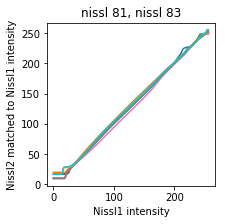

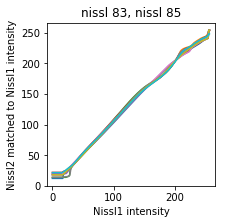

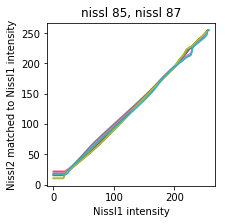

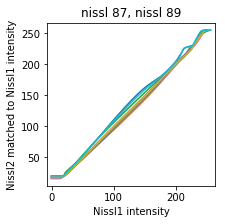

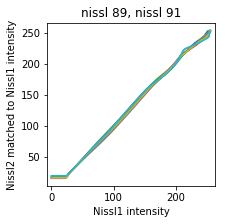

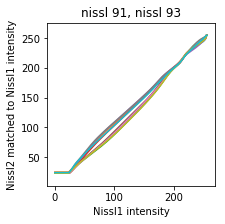

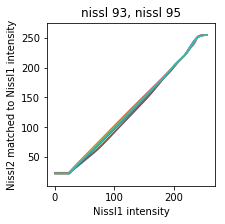

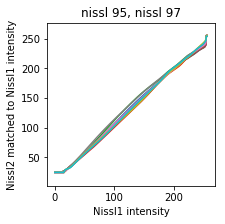

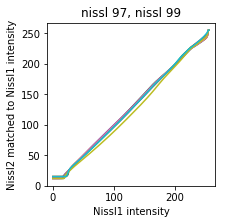

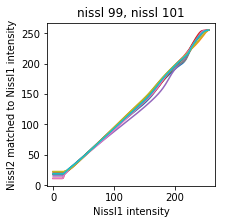

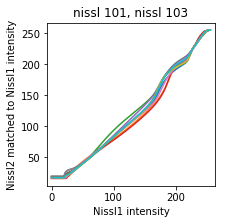

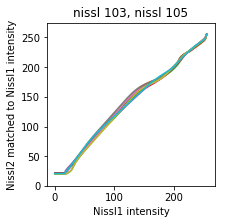

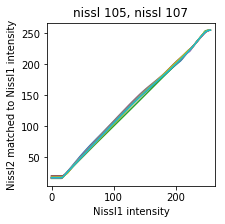

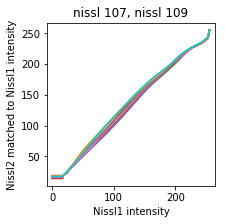

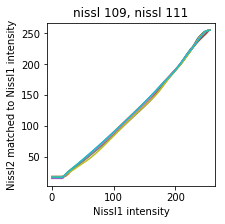

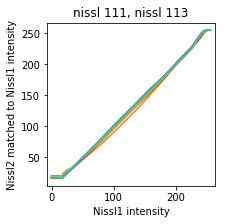

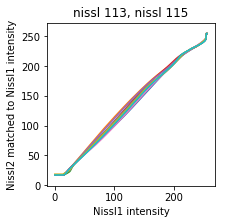

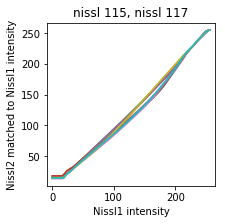

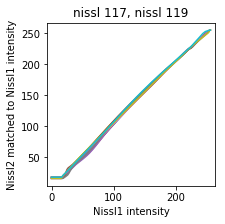

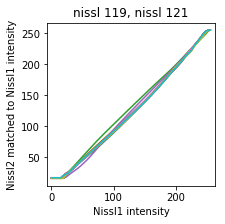

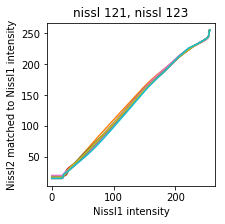

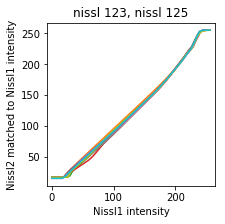

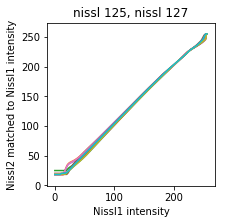

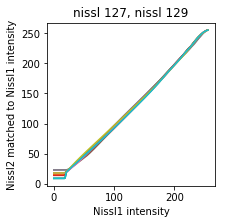

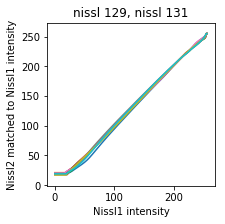

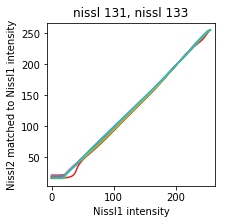

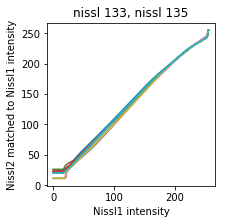

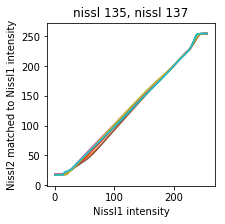

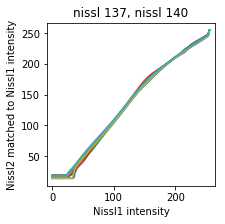

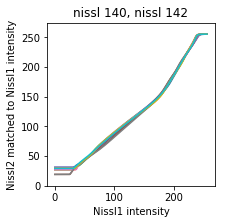

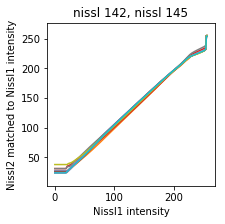

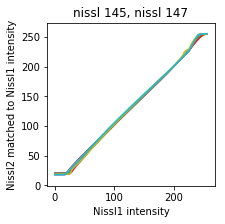

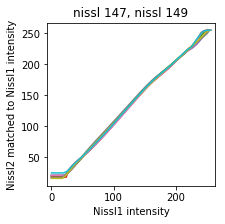

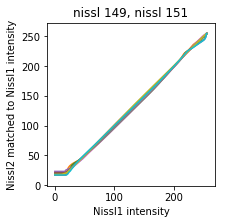

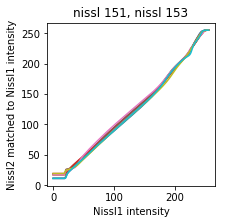

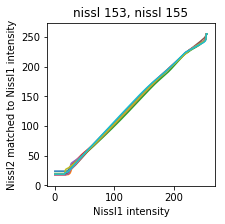

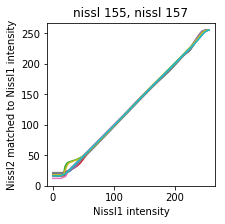

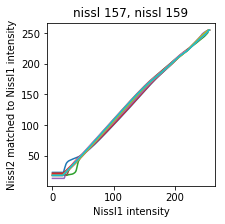

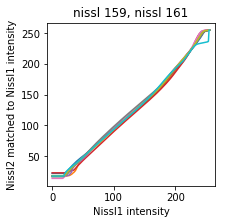

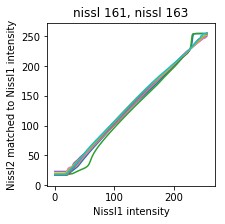

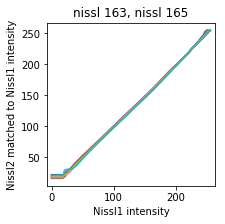

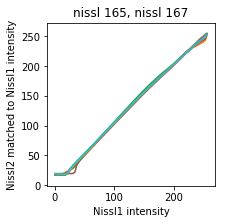

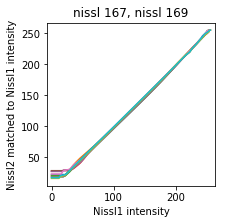

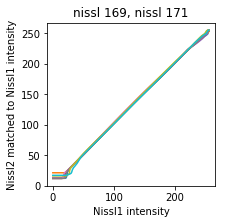

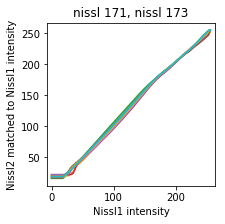

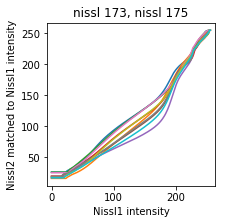

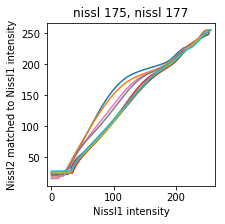

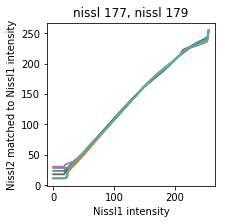

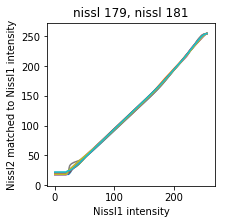

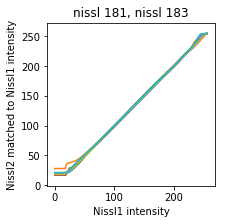

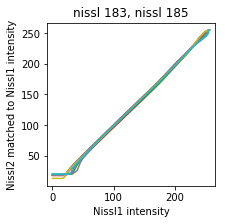

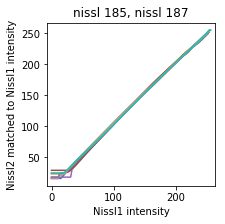

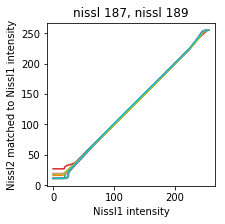

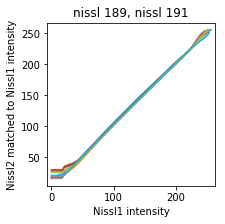

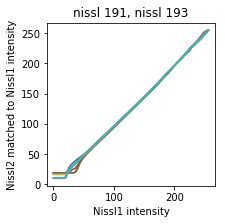

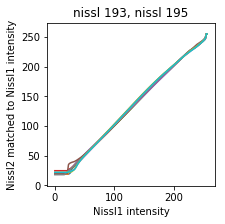

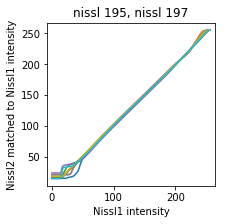

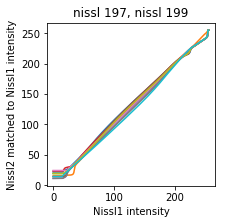

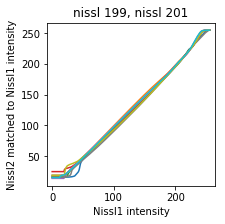

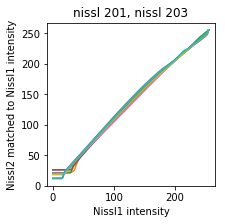

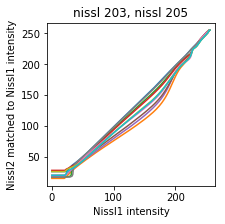

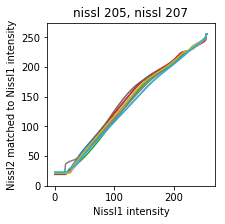

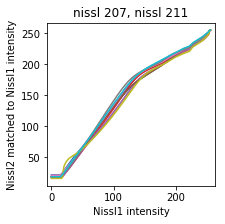

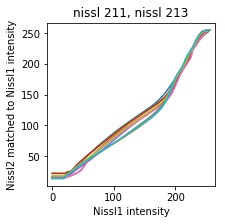

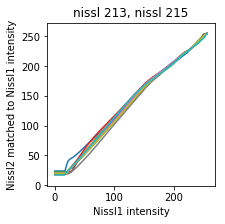

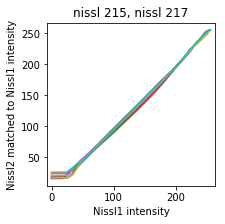

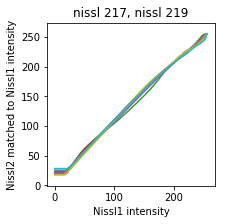

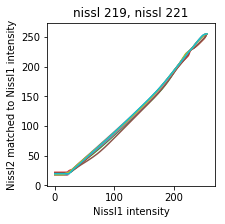

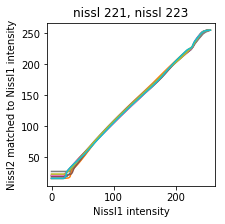

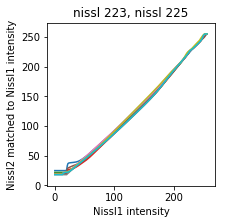

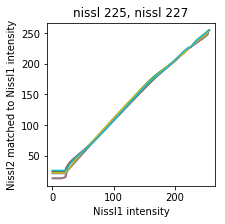

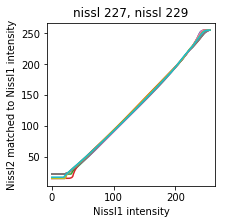

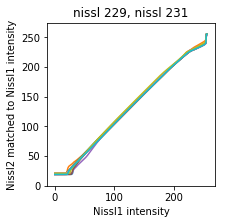

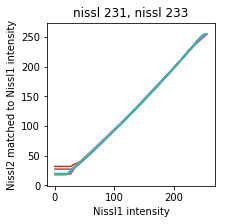

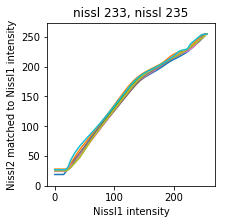

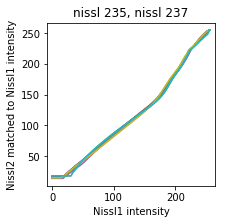

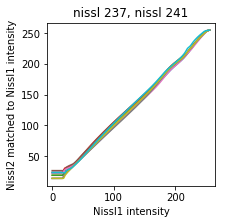

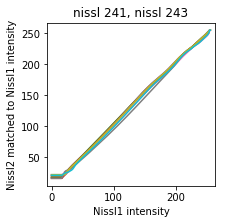

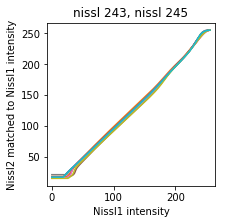

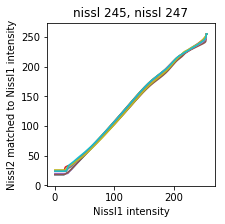

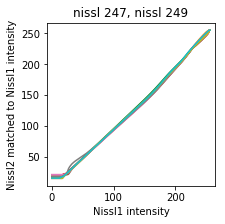

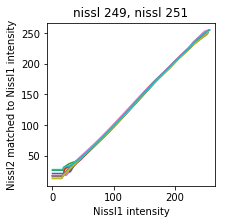

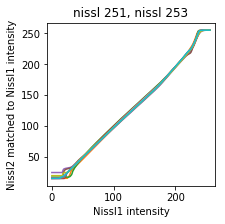

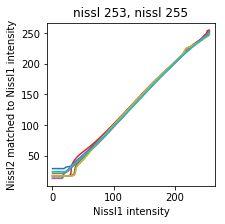

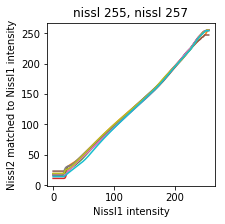

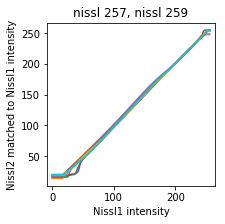

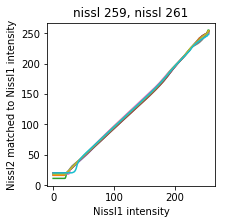

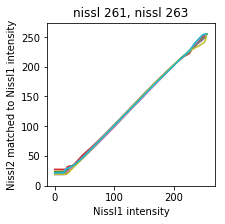

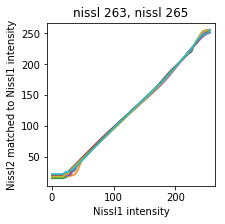

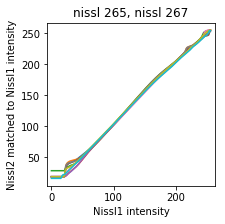

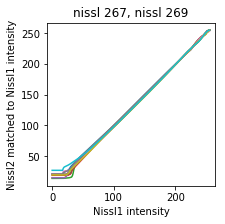

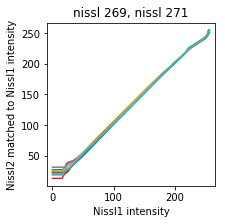

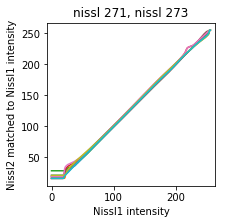

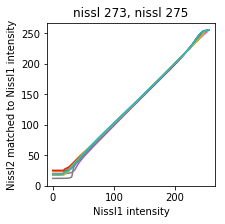

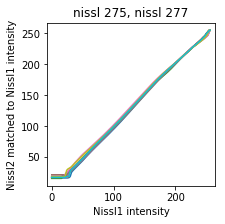

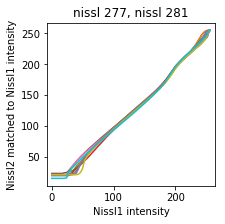

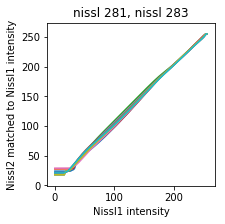

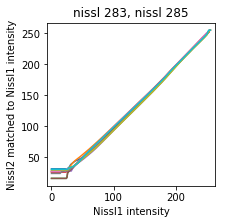

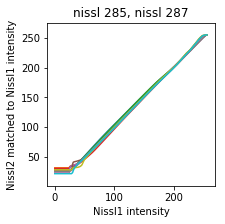

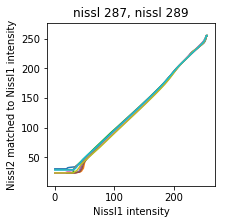

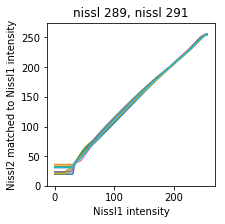

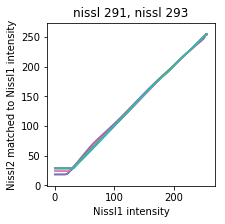

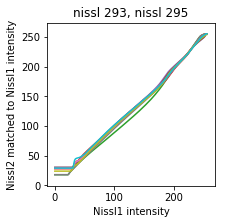

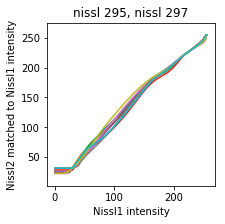

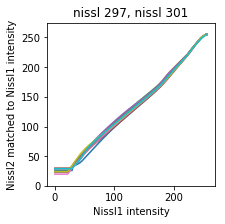

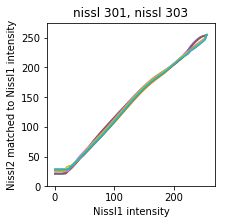

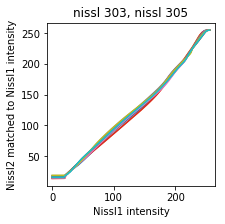

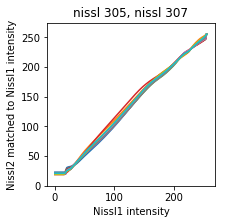

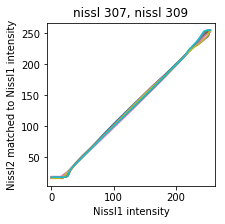

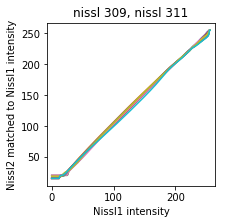

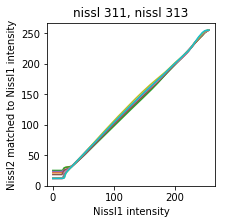

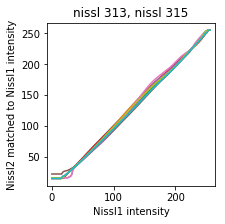

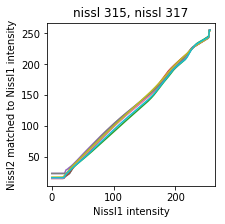

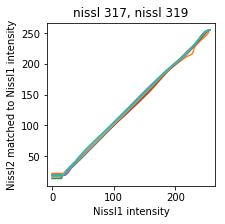

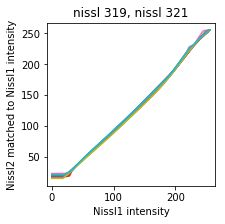

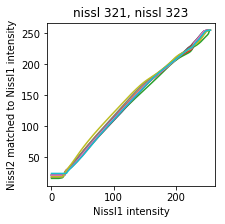

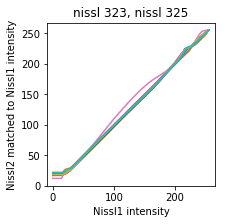

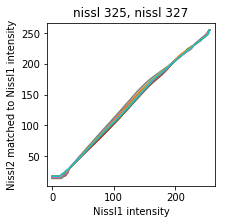

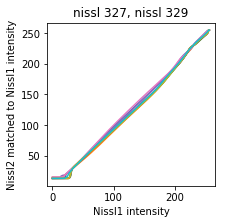

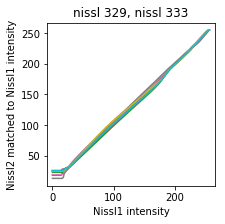

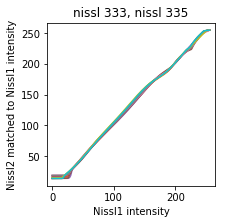

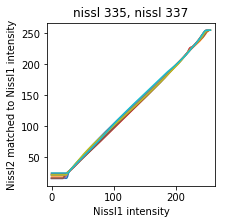

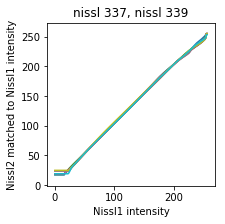

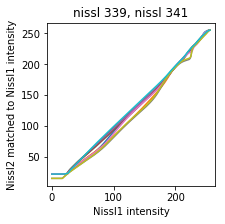

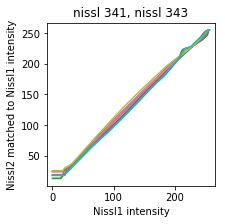

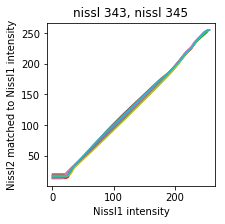

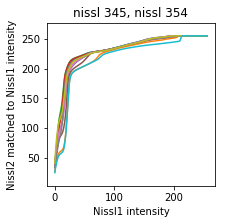

In [18]:
for nissl1_sec, nissl2_sec in compare_pairs:
        
    fp = os.path.join(DATA_DIR, stack, stack + '_histogram_matching', 'nissl_%d_to_nissl_%d.npy' % (nissl2_sec, nissl1_sec))
    nissl2_matched_values = np.load(fp)
    
    plt.figure(figsize=(3,3));
    
    plt.plot(nissl2_values, nissl2_matched_values.T);

    plt.xlim([0,256]);
    plt.ylim([0,256]);
    plt.xlabel('Nissl1 intensity');
    plt.ylabel('Nissl2 matched to Nissl1 intensity');
    plt.title('nissl %d, nissl %d' % (nissl1_sec, nissl2_sec));
    plt.axis('equal');
    plt.show();

In [4]:
ntb_values = np.arange(0, 5000)

In [5]:
sections_to_filenames = metadata_cache['sections_to_filenames'][stack]

In [6]:
nissl_sections = [sec for sec, fn in sections_to_filenames.iteritems() if not is_invalid(fn) and fn.split('-')[1][0] == 'N' and sec > first_sec and sec < last_sec]
ntb_sections = [sec for sec, fn in sections_to_filenames.iteritems() if not is_invalid(fn) and fn.split('-')[1][0] == 'F' and sec > first_sec and sec < last_sec]

In [23]:
filename_pairs = []
for nissl_sec in nissl_sections:
    for i in range(1, 99):
        closest_ntb_sec = nissl_sec + i
        if closest_ntb_sec in ntb_sections or closest_ntb_sec > last_sec:
            break
    if sections_to_filenames[closest_ntb_sec].split('-')[1][0] == 'F':
        filename_pairs.append((sections_to_filenames[nissl_sec], sections_to_filenames[closest_ntb_sec]))

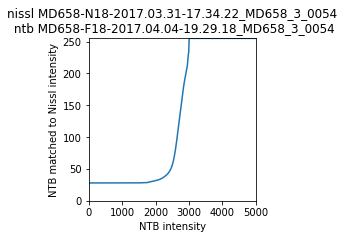

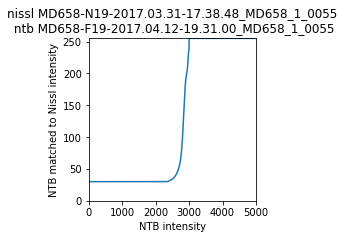

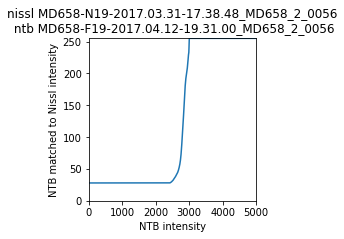

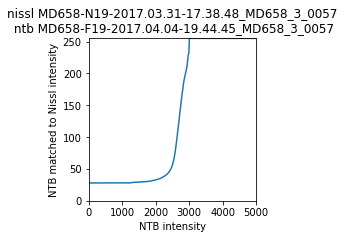

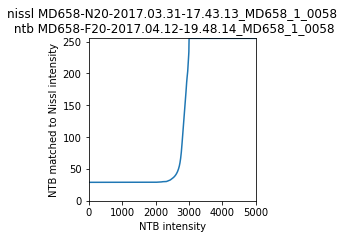

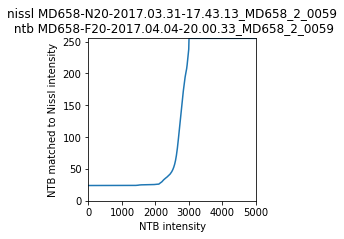

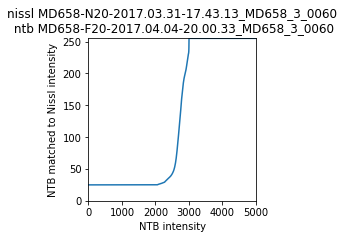

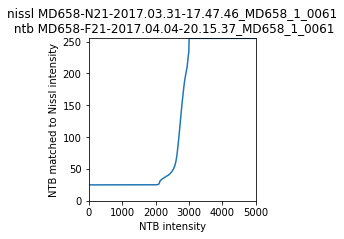

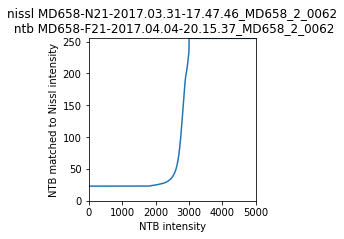

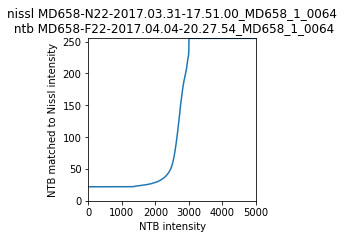

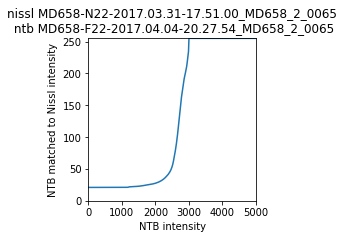

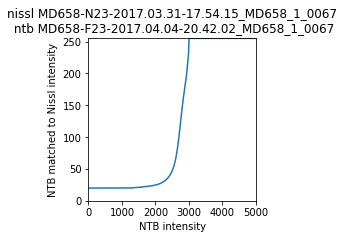

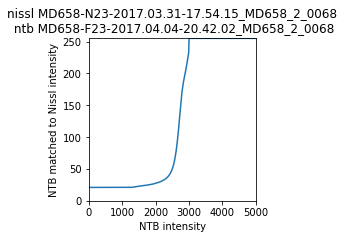

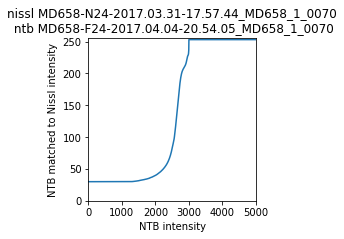

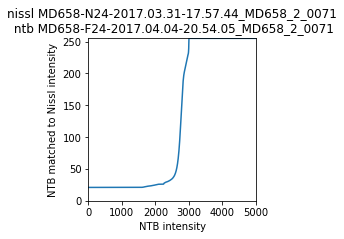

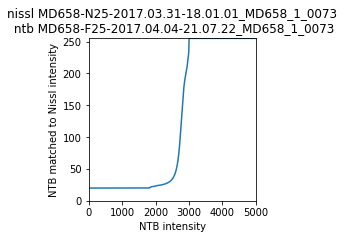

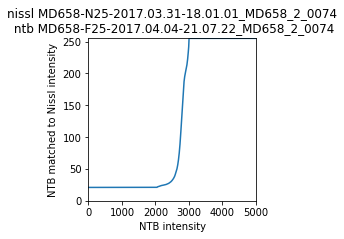

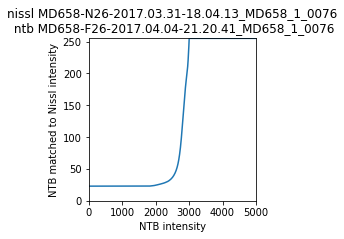

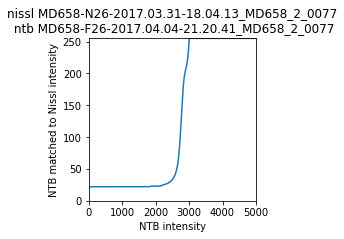

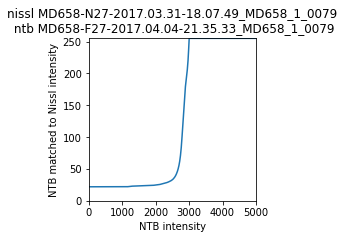

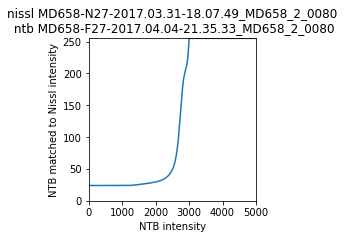

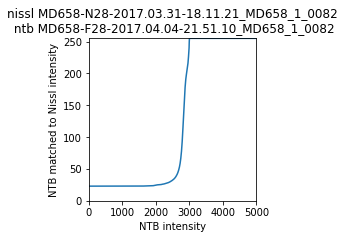

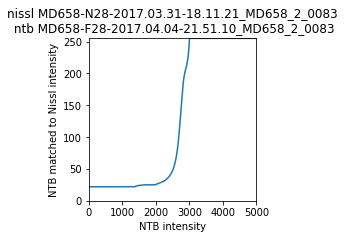

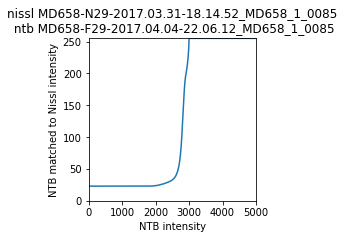

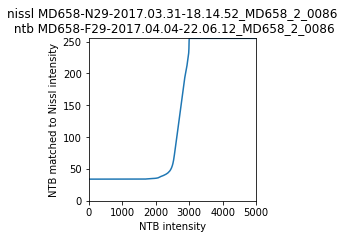

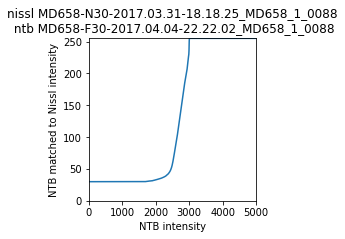

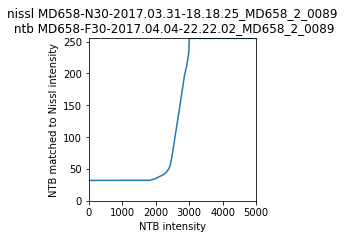

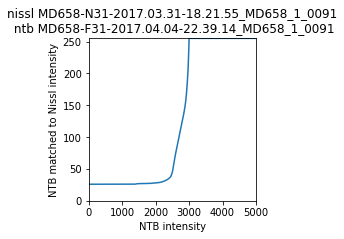

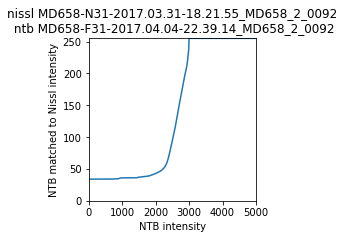

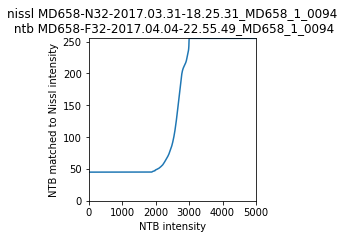

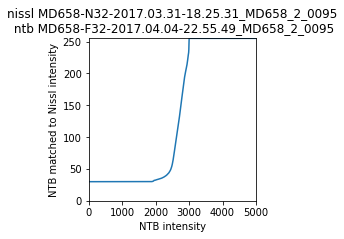

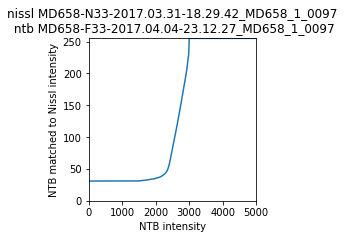

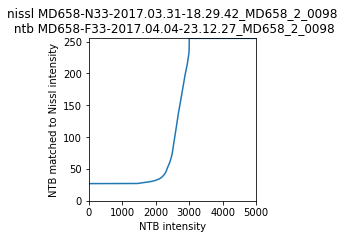

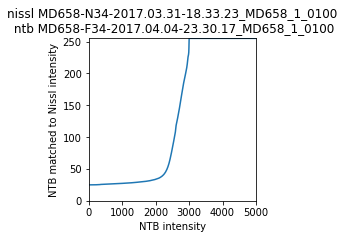

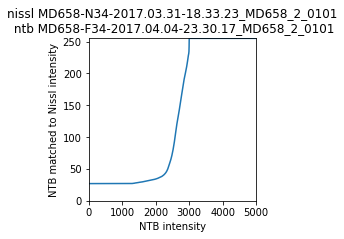

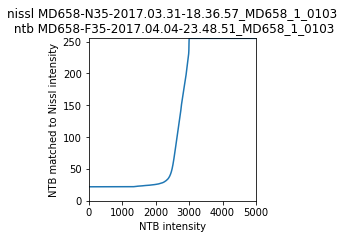

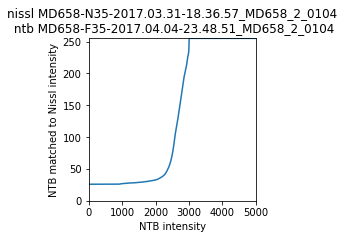

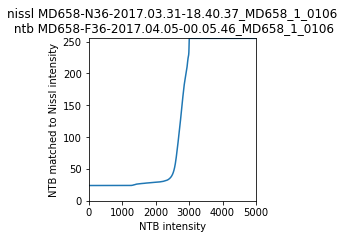

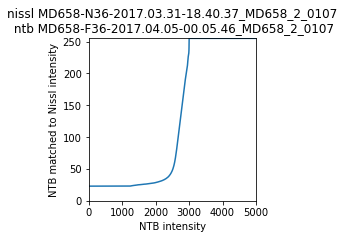

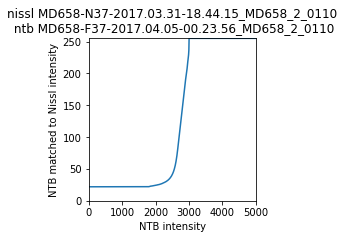

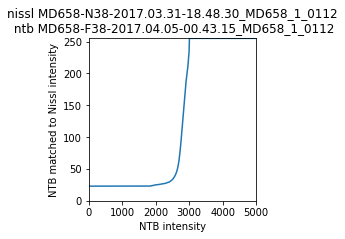

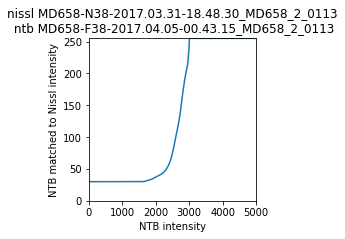

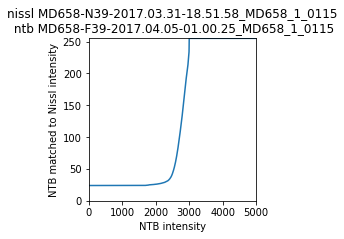

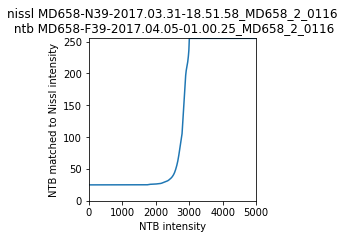

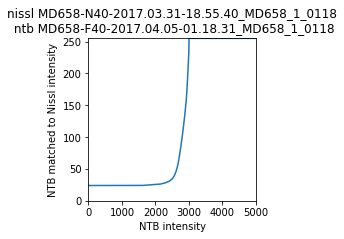

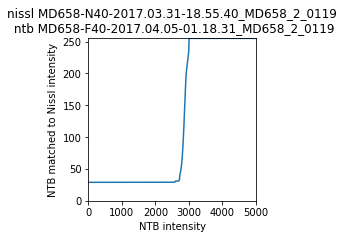

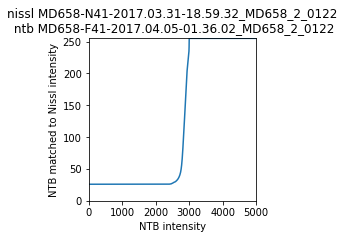

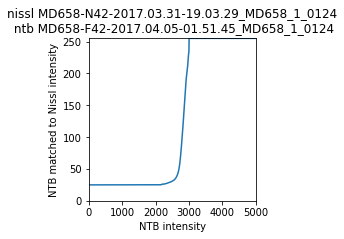

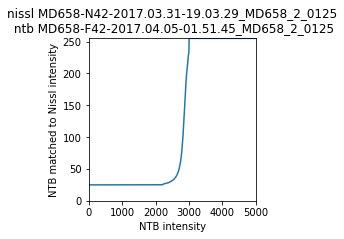

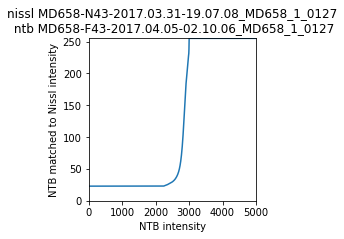

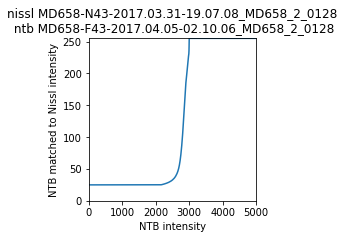

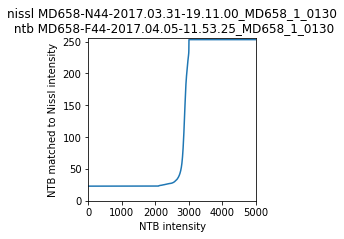

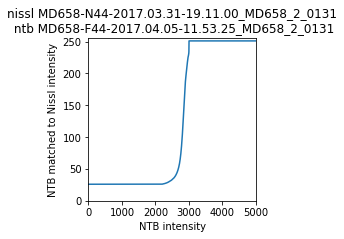

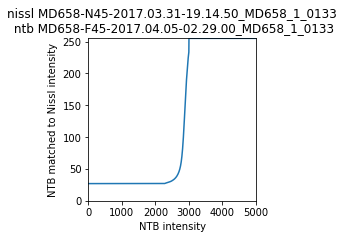

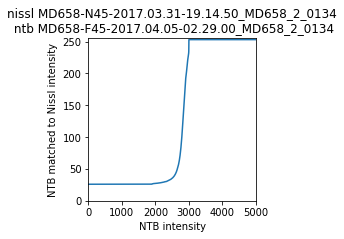

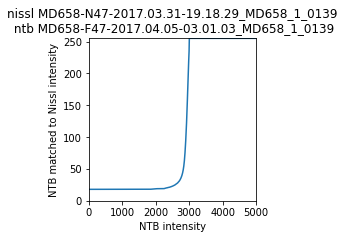

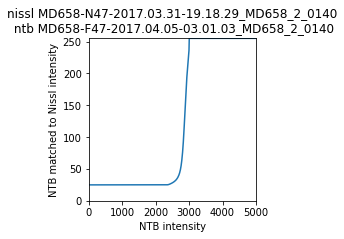

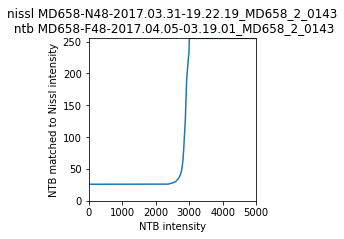

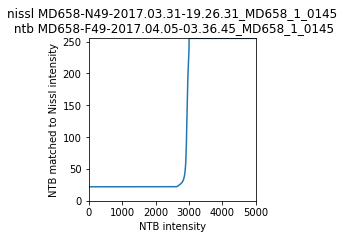

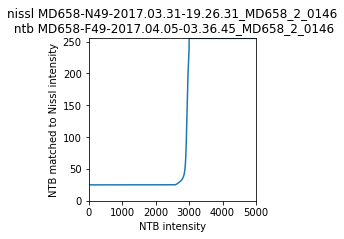

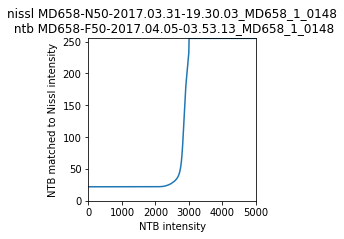

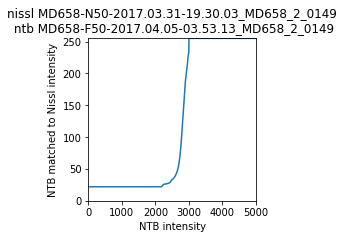

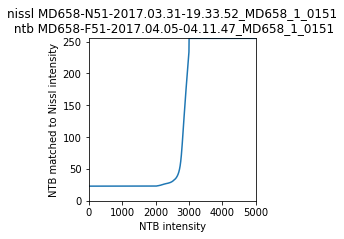

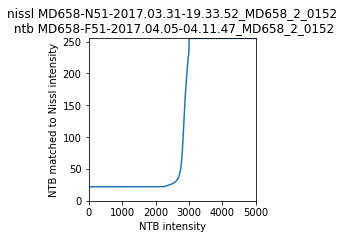

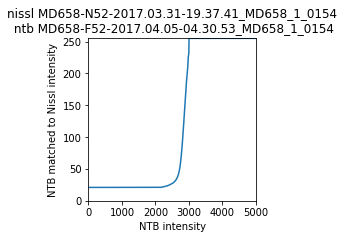

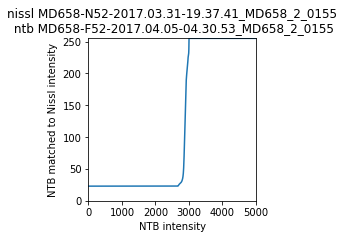

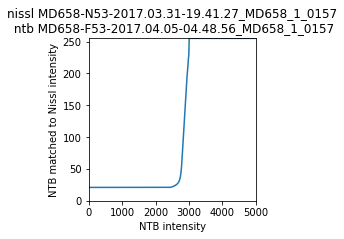

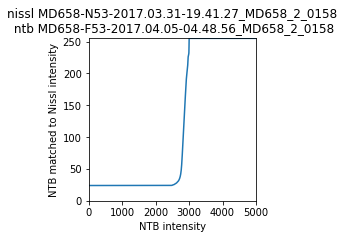

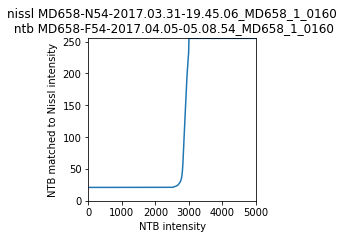

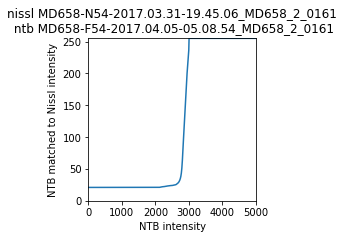

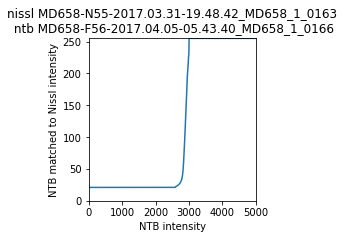

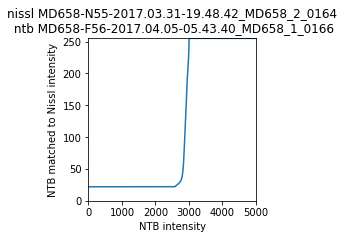

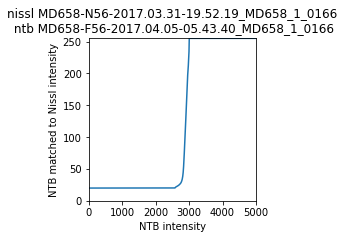

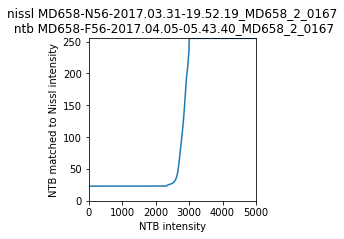

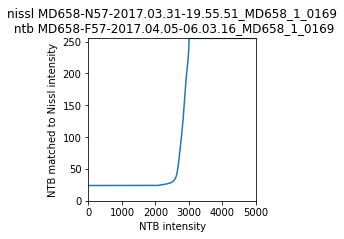

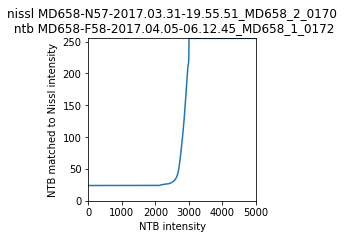

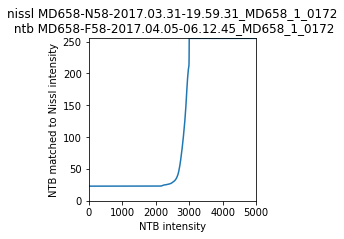

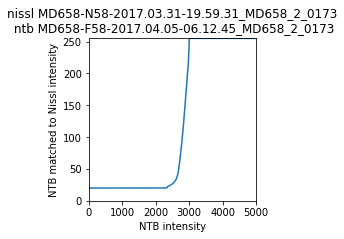

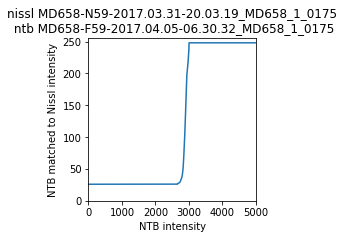

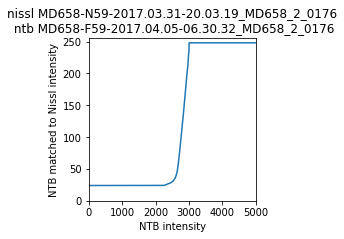

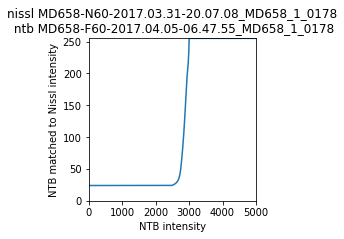

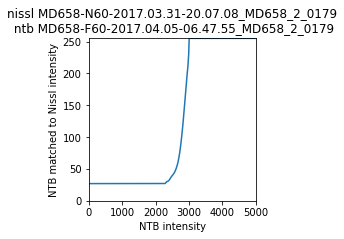

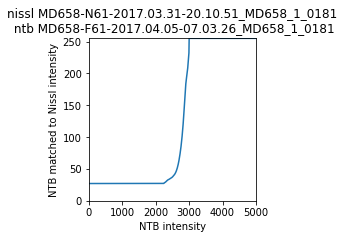

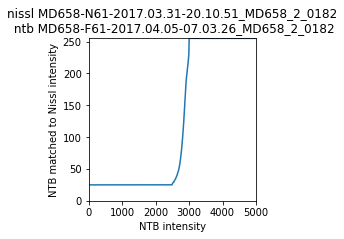

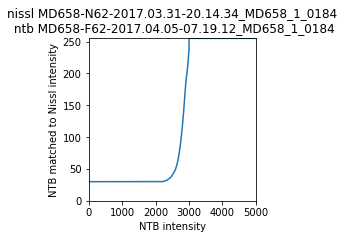

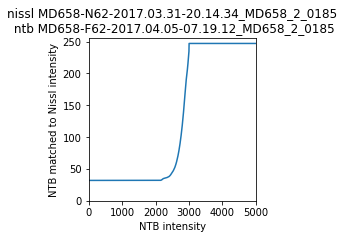

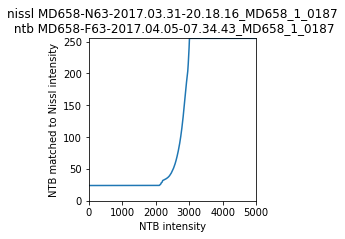

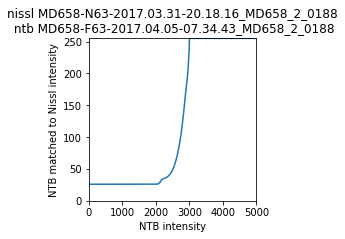

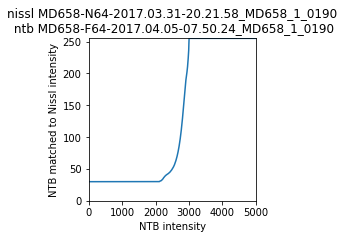

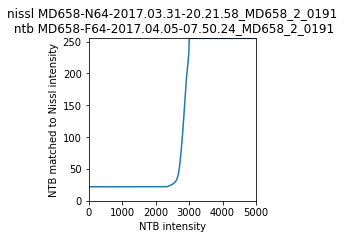

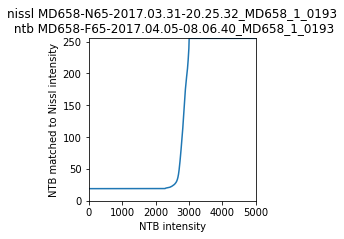

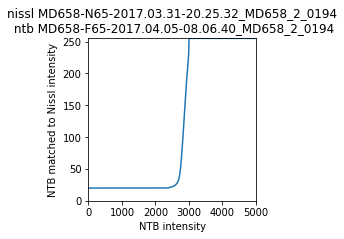

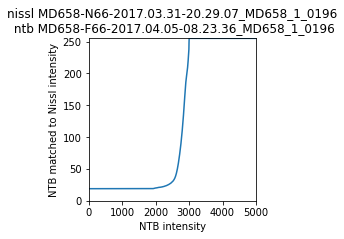

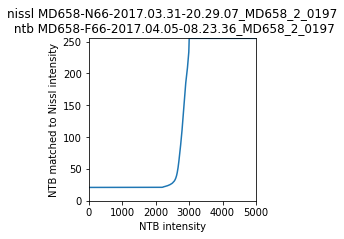

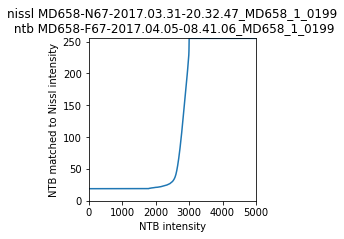

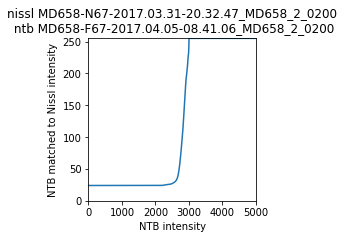

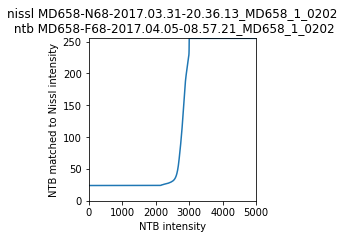

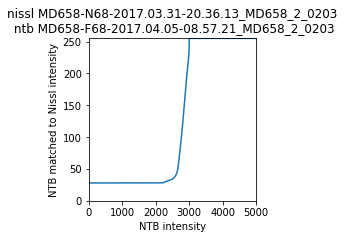

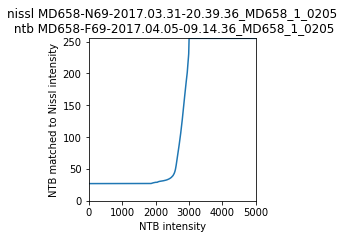

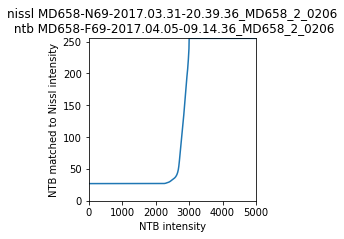

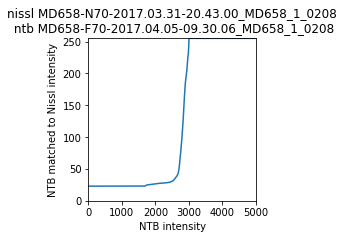

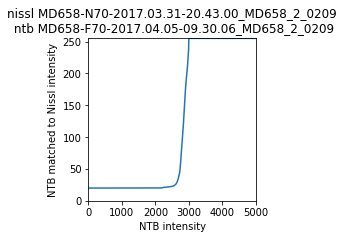

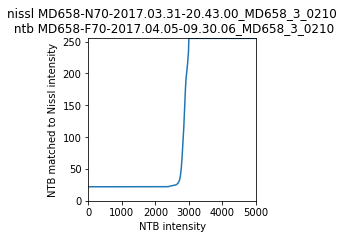

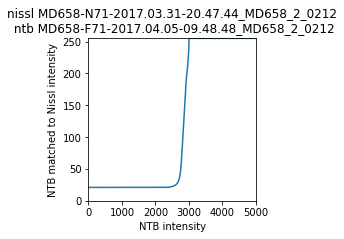

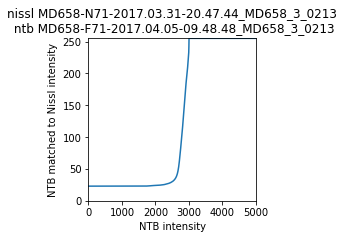

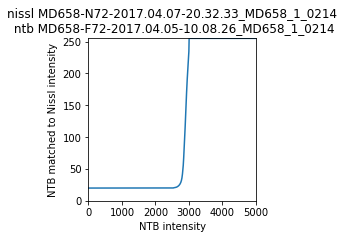

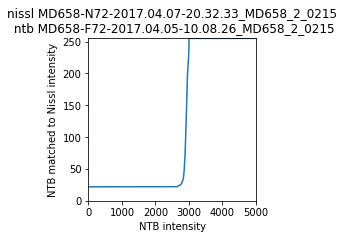

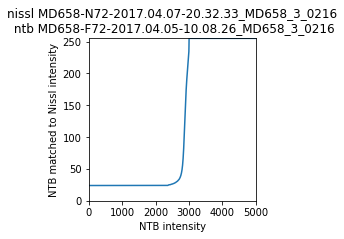

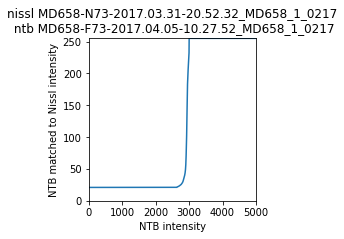

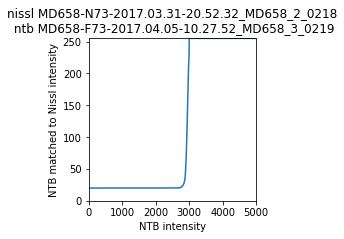

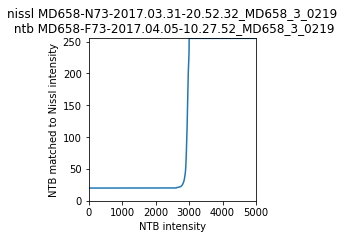

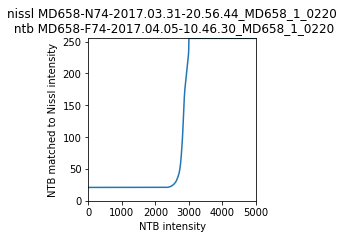

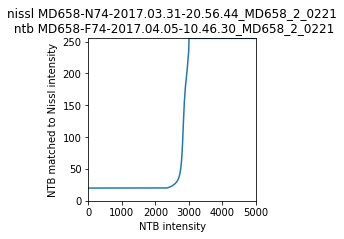

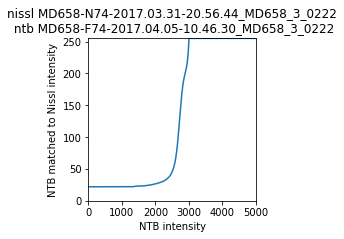

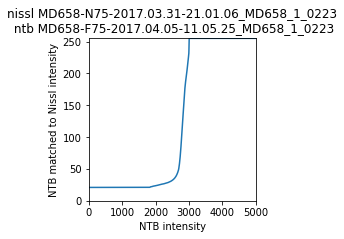

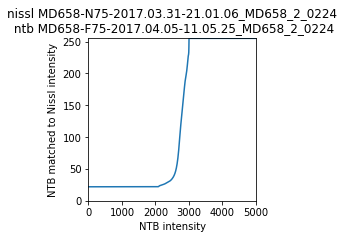

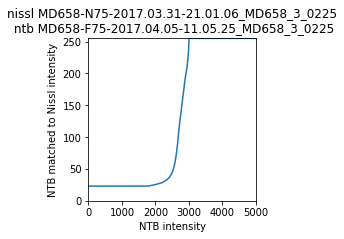

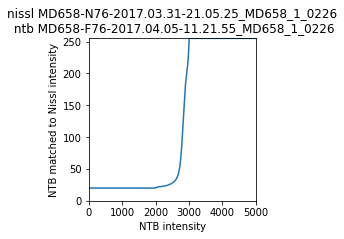

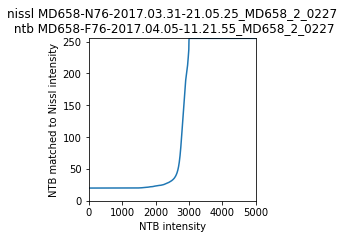

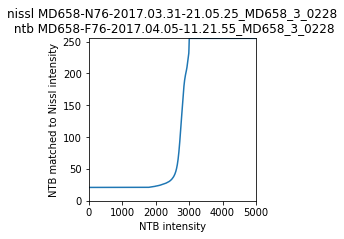

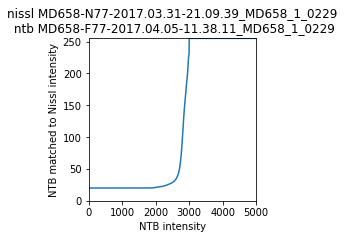

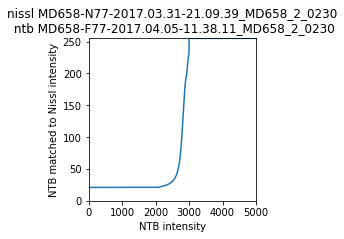

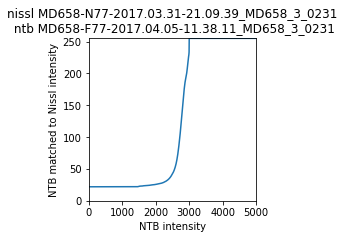

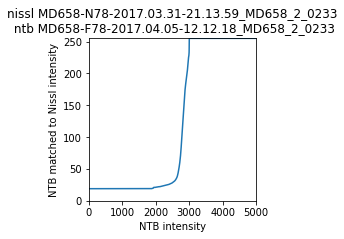

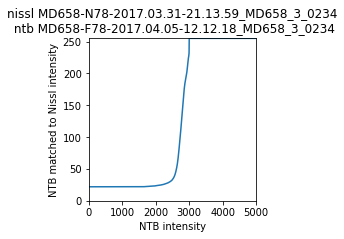

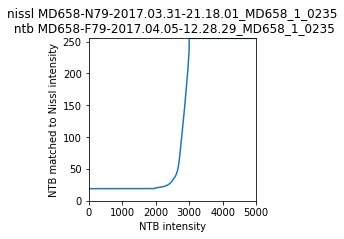

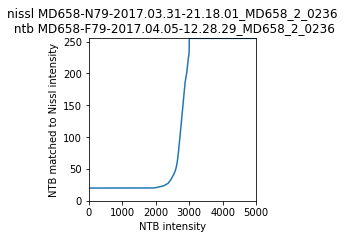

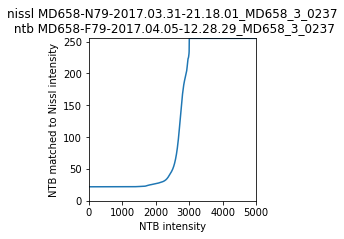

In [34]:
median_mapping_all_pairs = {}

for nissl_fn, ntb_fn in filename_pairs:
        
    fp = os.path.join(DATA_DIR, stack, stack + '_histogram_matching', '%s_to_%s_matched_values.npy' % (ntb_fn, nissl_fn))
    download_from_s3(fp)
    ntb_matched_values = np.load(fp)
    
#     fp = os.path.join(DATA_DIR, stack, stack + '_histogram_matching', '%s_to_%s_region_bboxes.npy' % (ntb_fn, nissl_fn))
#     download_from_s3(fp)
#     region_bboxes_all_examples_one_section = np.load(fp)
        
    plt.figure(figsize=(3,3));
    
#     plt.plot(ntb_values, ntb_matched_values.T);
    median_mapping = np.median(ntb_matched_values, axis=0)
    plt.plot(ntb_values, median_mapping)
    
    median_mapping_all_pairs[(nissl_fn, ntb_fn)] = median_mapping

    plt.xlim([0,5000]);
    plt.ylim([0,256]);
    plt.xlabel('NTB intensity');
    plt.ylabel('NTB matched to Nissl intensity');
    plt.title('nissl %s\n ntb %s' % (nissl_fn, ntb_fn));
    plt.show();

In [37]:
for nissl_fn, ntb_fn in filename_pairs:
    median_mapping = median_mapping_all_pairs[(nissl_fn, ntb_fn)]
#     fp = os.path.join(DATA_DIR, stack, stack + '_histogram_matching', '%s_to_%s_matched_values_median.npy' % (ntb_fn, nissl_fn))
    fp = os.path.join(DATA_DIR, stack, stack + '_intensity_mapping', '%s_intensity_mapping.npy' % (ntb_fn))
    create_parent_dir_if_not_exists(fp)
    np.save(fp, median_mapping)
    upload_to_s3(fp)

aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F18-2017.04.04-19.29.18_MD658_3_0054_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F18-2017.04.04-19.29.18_MD658_3_0054_intensity_mapping.npy


Child returned 0
0.43 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.12-19.31.00_MD658_1_0055_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.12-19.31.00_MD658_1_0055_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.12-19.31.00_MD658_2_0056_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.12-19.31.00_MD658_2_0056_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.04-19.44.45_MD658_3_0057_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.04-19.44.45_MD658_3_0057_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.12-19.48.14_MD658_1_0058_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.12-19.48.14_MD658_1_0058_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.04-20.00.33_MD658_2_0059_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.04-20.00.33_MD658_2_0059_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.04-20.00.33_MD658_3_0060_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.04-20.00.33_MD658_3_0060_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F21-2017.04.04-20.15.37_MD658_1_0061_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F21-2017.04.04-20.15.37_MD658_1_0061_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F21-2017.04.04-20.15.37_MD658_2_0062_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F21-2017.04.04-20.15.37_MD658_2_0062_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F22-2017.04.04-20.27.54_MD658_1_0064_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F22-2017.04.04-20.27.54_MD658_1_0064_intensity_mapping.npy


Child returned 0
0.43 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F22-2017.04.04-20.27.54_MD658_2_0065_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F22-2017.04.04-20.27.54_MD658_2_0065_intensity_mapping.npy


Child returned 0
0.43 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F23-2017.04.04-20.42.02_MD658_1_0067_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F23-2017.04.04-20.42.02_MD658_1_0067_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F23-2017.04.04-20.42.02_MD658_2_0068_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F23-2017.04.04-20.42.02_MD658_2_0068_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F24-2017.04.04-20.54.05_MD658_1_0070_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F24-2017.04.04-20.54.05_MD658_1_0070_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F24-2017.04.04-20.54.05_MD658_2_0071_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F24-2017.04.04-20.54.05_MD658_2_0071_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F25-2017.04.04-21.07.22_MD658_1_0073_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F25-2017.04.04-21.07.22_MD658_1_0073_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F25-2017.04.04-21.07.22_MD658_2_0074_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F25-2017.04.04-21.07.22_MD658_2_0074_intensity_mapping.npy


Child returned 0
0.47 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F26-2017.04.04-21.20.41_MD658_1_0076_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F26-2017.04.04-21.20.41_MD658_1_0076_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F26-2017.04.04-21.20.41_MD658_2_0077_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F26-2017.04.04-21.20.41_MD658_2_0077_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F27-2017.04.04-21.35.33_MD658_1_0079_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F27-2017.04.04-21.35.33_MD658_1_0079_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F27-2017.04.04-21.35.33_MD658_2_0080_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F27-2017.04.04-21.35.33_MD658_2_0080_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F28-2017.04.04-21.51.10_MD658_1_0082_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F28-2017.04.04-21.51.10_MD658_1_0082_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F28-2017.04.04-21.51.10_MD658_2_0083_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F28-2017.04.04-21.51.10_MD658_2_0083_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F29-2017.04.04-22.06.12_MD658_1_0085_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F29-2017.04.04-22.06.12_MD658_1_0085_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F29-2017.04.04-22.06.12_MD658_2_0086_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F29-2017.04.04-22.06.12_MD658_2_0086_intensity_mapping.npy


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F30-2017.04.04-22.22.02_MD658_1_0088_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F30-2017.04.04-22.22.02_MD658_1_0088_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F30-2017.04.04-22.22.02_MD658_2_0089_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F30-2017.04.04-22.22.02_MD658_2_0089_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F31-2017.04.04-22.39.14_MD658_1_0091_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F31-2017.04.04-22.39.14_MD658_1_0091_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F31-2017.04.04-22.39.14_MD658_2_0092_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F31-2017.04.04-22.39.14_MD658_2_0092_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F32-2017.04.04-22.55.49_MD658_1_0094_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F32-2017.04.04-22.55.49_MD658_1_0094_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F32-2017.04.04-22.55.49_MD658_2_0095_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F32-2017.04.04-22.55.49_MD658_2_0095_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F33-2017.04.04-23.12.27_MD658_1_0097_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F33-2017.04.04-23.12.27_MD658_1_0097_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F33-2017.04.04-23.12.27_MD658_2_0098_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F33-2017.04.04-23.12.27_MD658_2_0098_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F34-2017.04.04-23.30.17_MD658_1_0100_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F34-2017.04.04-23.30.17_MD658_1_0100_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F34-2017.04.04-23.30.17_MD658_2_0101_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F34-2017.04.04-23.30.17_MD658_2_0101_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F35-2017.04.04-23.48.51_MD658_1_0103_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F35-2017.04.04-23.48.51_MD658_1_0103_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F35-2017.04.04-23.48.51_MD658_2_0104_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F35-2017.04.04-23.48.51_MD658_2_0104_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F36-2017.04.05-00.05.46_MD658_1_0106_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F36-2017.04.05-00.05.46_MD658_1_0106_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F36-2017.04.05-00.05.46_MD658_2_0107_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F36-2017.04.05-00.05.46_MD658_2_0107_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F37-2017.04.05-00.23.56_MD658_2_0110_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F37-2017.04.05-00.23.56_MD658_2_0110_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F38-2017.04.05-00.43.15_MD658_1_0112_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F38-2017.04.05-00.43.15_MD658_1_0112_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F38-2017.04.05-00.43.15_MD658_2_0113_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F38-2017.04.05-00.43.15_MD658_2_0113_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F39-2017.04.05-01.00.25_MD658_1_0115_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F39-2017.04.05-01.00.25_MD658_1_0115_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F39-2017.04.05-01.00.25_MD658_2_0116_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F39-2017.04.05-01.00.25_MD658_2_0116_intensity_mapping.npy


Child returned 0
0.41 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F40-2017.04.05-01.18.31_MD658_1_0118_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F40-2017.04.05-01.18.31_MD658_1_0118_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F40-2017.04.05-01.18.31_MD658_2_0119_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F40-2017.04.05-01.18.31_MD658_2_0119_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F41-2017.04.05-01.36.02_MD658_2_0122_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F41-2017.04.05-01.36.02_MD658_2_0122_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F42-2017.04.05-01.51.45_MD658_1_0124_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F42-2017.04.05-01.51.45_MD658_1_0124_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F42-2017.04.05-01.51.45_MD658_2_0125_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F42-2017.04.05-01.51.45_MD658_2_0125_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F43-2017.04.05-02.10.06_MD658_1_0127_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F43-2017.04.05-02.10.06_MD658_1_0127_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F43-2017.04.05-02.10.06_MD658_2_0128_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F43-2017.04.05-02.10.06_MD658_2_0128_intensity_mapping.npy


Child returned 0
0.43 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F44-2017.04.05-11.53.25_MD658_1_0130_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F44-2017.04.05-11.53.25_MD658_1_0130_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F44-2017.04.05-11.53.25_MD658_2_0131_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F44-2017.04.05-11.53.25_MD658_2_0131_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F45-2017.04.05-02.29.00_MD658_1_0133_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F45-2017.04.05-02.29.00_MD658_1_0133_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F45-2017.04.05-02.29.00_MD658_2_0134_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F45-2017.04.05-02.29.00_MD658_2_0134_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F47-2017.04.05-03.01.03_MD658_1_0139_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F47-2017.04.05-03.01.03_MD658_1_0139_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F47-2017.04.05-03.01.03_MD658_2_0140_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F47-2017.04.05-03.01.03_MD658_2_0140_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F48-2017.04.05-03.19.01_MD658_2_0143_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F48-2017.04.05-03.19.01_MD658_2_0143_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F49-2017.04.05-03.36.45_MD658_1_0145_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F49-2017.04.05-03.36.45_MD658_1_0145_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F49-2017.04.05-03.36.45_MD658_2_0146_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F49-2017.04.05-03.36.45_MD658_2_0146_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F50-2017.04.05-03.53.13_MD658_1_0148_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F50-2017.04.05-03.53.13_MD658_1_0148_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F50-2017.04.05-03.53.13_MD658_2_0149_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F50-2017.04.05-03.53.13_MD658_2_0149_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F51-2017.04.05-04.11.47_MD658_1_0151_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F51-2017.04.05-04.11.47_MD658_1_0151_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F51-2017.04.05-04.11.47_MD658_2_0152_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F51-2017.04.05-04.11.47_MD658_2_0152_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F52-2017.04.05-04.30.53_MD658_1_0154_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F52-2017.04.05-04.30.53_MD658_1_0154_intensity_mapping.npy


Child returned 0
0.41 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F52-2017.04.05-04.30.53_MD658_2_0155_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F52-2017.04.05-04.30.53_MD658_2_0155_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F53-2017.04.05-04.48.56_MD658_1_0157_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F53-2017.04.05-04.48.56_MD658_1_0157_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F53-2017.04.05-04.48.56_MD658_2_0158_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F53-2017.04.05-04.48.56_MD658_2_0158_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F54-2017.04.05-05.08.54_MD658_1_0160_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F54-2017.04.05-05.08.54_MD658_1_0160_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F54-2017.04.05-05.08.54_MD658_2_0161_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F54-2017.04.05-05.08.54_MD658_2_0161_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_1_0166_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_1_0166_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_1_0166_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_1_0166_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_1_0166_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_1_0166_intensity_mapping.npy


Child returned 0
0.43 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_2_0167_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_2_0167_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F57-2017.04.05-06.03.16_MD658_1_0169_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F57-2017.04.05-06.03.16_MD658_1_0169_intensity_mapping.npy


Child returned 0
0.82 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_1_0172_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_1_0172_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_1_0172_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_1_0172_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_2_0173_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_2_0173_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F59-2017.04.05-06.30.32_MD658_1_0175_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F59-2017.04.05-06.30.32_MD658_1_0175_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F59-2017.04.05-06.30.32_MD658_2_0176_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F59-2017.04.05-06.30.32_MD658_2_0176_intensity_mapping.npy


Child returned 0
0.47 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F60-2017.04.05-06.47.55_MD658_1_0178_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F60-2017.04.05-06.47.55_MD658_1_0178_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F60-2017.04.05-06.47.55_MD658_2_0179_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F60-2017.04.05-06.47.55_MD658_2_0179_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F61-2017.04.05-07.03.26_MD658_1_0181_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F61-2017.04.05-07.03.26_MD658_1_0181_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F61-2017.04.05-07.03.26_MD658_2_0182_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F61-2017.04.05-07.03.26_MD658_2_0182_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F62-2017.04.05-07.19.12_MD658_1_0184_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F62-2017.04.05-07.19.12_MD658_1_0184_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F62-2017.04.05-07.19.12_MD658_2_0185_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F62-2017.04.05-07.19.12_MD658_2_0185_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F63-2017.04.05-07.34.43_MD658_1_0187_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F63-2017.04.05-07.34.43_MD658_1_0187_intensity_mapping.npy


Child returned 0
0.62 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F63-2017.04.05-07.34.43_MD658_2_0188_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F63-2017.04.05-07.34.43_MD658_2_0188_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F64-2017.04.05-07.50.24_MD658_1_0190_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F64-2017.04.05-07.50.24_MD658_1_0190_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F64-2017.04.05-07.50.24_MD658_2_0191_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F64-2017.04.05-07.50.24_MD658_2_0191_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F65-2017.04.05-08.06.40_MD658_1_0193_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F65-2017.04.05-08.06.40_MD658_1_0193_intensity_mapping.npy


Child returned 0
0.41 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F65-2017.04.05-08.06.40_MD658_2_0194_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F65-2017.04.05-08.06.40_MD658_2_0194_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F66-2017.04.05-08.23.36_MD658_1_0196_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F66-2017.04.05-08.23.36_MD658_1_0196_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F66-2017.04.05-08.23.36_MD658_2_0197_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F66-2017.04.05-08.23.36_MD658_2_0197_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F67-2017.04.05-08.41.06_MD658_1_0199_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F67-2017.04.05-08.41.06_MD658_1_0199_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F67-2017.04.05-08.41.06_MD658_2_0200_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F67-2017.04.05-08.41.06_MD658_2_0200_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F68-2017.04.05-08.57.21_MD658_1_0202_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F68-2017.04.05-08.57.21_MD658_1_0202_intensity_mapping.npy


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F68-2017.04.05-08.57.21_MD658_2_0203_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F68-2017.04.05-08.57.21_MD658_2_0203_intensity_mapping.npy


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F69-2017.04.05-09.14.36_MD658_1_0205_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F69-2017.04.05-09.14.36_MD658_1_0205_intensity_mapping.npy


Child returned 0
0.38 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F69-2017.04.05-09.14.36_MD658_2_0206_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F69-2017.04.05-09.14.36_MD658_2_0206_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_1_0208_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_1_0208_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_2_0209_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_2_0209_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_3_0210_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_3_0210_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_2_0212_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_2_0212_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_3_0213_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_3_0213_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_1_0214_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_1_0214_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_2_0215_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_2_0215_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_3_0216_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_3_0216_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_1_0217_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_1_0217_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_3_0219_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_3_0219_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_3_0219_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_3_0219_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_1_0220_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_1_0220_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_2_0221_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_2_0221_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_3_0222_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_3_0222_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_1_0223_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_1_0223_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_2_0224_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_2_0224_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_3_0225_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_3_0225_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_1_0226_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_1_0226_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_2_0227_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_2_0227_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_3_0228_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_3_0228_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_1_0229_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_1_0229_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_2_0230_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_2_0230_intensity_mapping.npy


Child returned 0
0.37 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_3_0231_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_3_0231_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_2_0233_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_2_0233_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_3_0234_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_3_0234_intensity_mapping.npy


Child returned 0
0.43 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_1_0235_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_1_0235_intensity_mapping.npy


Child returned 0
0.42 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_2_0236_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_2_0236_intensity_mapping.npy


Child returned 0
0.36 seconds.


aws s3 cp /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_3_0237_intensity_mapping.npy s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_3_0237_intensity_mapping.npy


Child returned 0
0.42 seconds.


# Plot median intensity mapping for all stacks

rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_intensity_mapping.npy


Child returned 0
Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F15-2016.12.20-21.04.12_MD653_2_0044_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F15-2016.12.20-21.04.12_MD653_2_0044_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F15-2016.12.20-21.04.12_MD653_2_0044_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F15-2016.12.20-21.04.12_MD653_3_0045_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F15-2016.12.20-21.04.12_MD653_3_0045_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F15-2016.12.20-21.04.12_MD653_3_0045_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F16-2016.12.20-21.19.34_MD653_1_0046_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F16-2016.12.20-21.19.34_MD653_1_0046_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F16-2016.12.20-21.19.34_MD653_1_0046_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F16-2016.12.20-21.19.34_MD653_2_0047_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F16-2016.12.20-21.19.34_MD653_2_0047_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F16-2016.12.20-21.19.34_MD653_2_0047_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F16-2016.12.20-21.19.34_MD653_3_0048_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F16-2016.12.20-21.19.34_MD653_3_0048_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F16-2016.12.20-21.19.34_MD653_3_0048_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F17-2016.12.22-15.35.56_MD653_1_0049_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F17-2016.12.22-15.35.56_MD653_1_0049_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F17-2016.12.22-15.35.56_MD653_1_0049_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F17-2016.12.22-15.35.56_MD653_2_0050_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F17-2016.12.22-15.35.56_MD653_2_0050_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F17-2016.12.22-15.35.56_MD653_2_0050_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F17-2016.12.22-15.35.56_MD653_3_0051_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F17-2016.12.22-15.35.56_MD653_3_0051_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F17-2016.12.22-15.35.56_MD653_3_0051_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F18-2016.12.22-15.51.22_MD653_1_0052_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F18-2016.12.22-15.51.22_MD653_1_0052_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F18-2016.12.22-15.51.22_MD653_1_0052_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F18-2016.12.22-15.51.22_MD653_2_0053_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F18-2016.12.22-15.51.22_MD653_2_0053_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F18-2016.12.22-15.51.22_MD653_2_0053_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F18-2016.12.22-15.51.22_MD653_3_0054_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F18-2016.12.22-15.51.22_MD653_3_0054_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F18-2016.12.22-15.51.22_MD653_3_0054_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F19-2016.12.22-16.10.29_MD653_1_0055_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F19-2016.12.22-16.10.29_MD653_1_0055_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F19-2016.12.22-16.10.29_MD653_1_0055_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F19-2016.12.22-16.10.29_MD653_2_0056_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F19-2016.12.22-16.10.29_MD653_2_0056_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F19-2016.12.22-16.10.29_MD653_2_0056_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F19-2016.12.22-16.10.29_MD653_3_0057_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F19-2016.12.22-16.10.29_MD653_3_0057_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F19-2016.12.22-16.10.29_MD653_3_0057_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F20-2016.12.20-21.35.31_MD653_1_0058_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F20-2016.12.20-21.35.31_MD653_1_0058_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F20-2016.12.20-21.35.31_MD653_1_0058_intensity_mapping.npy


Child returned 0
0.47 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F20-2016.12.20-21.35.31_MD653_2_0059_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F20-2016.12.20-21.35.31_MD653_2_0059_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F20-2016.12.20-21.35.31_MD653_2_0059_intensity_mapping.npy


Child returned 0
0.54 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F20-2016.12.20-21.35.31_MD653_3_0060_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F20-2016.12.20-21.35.31_MD653_3_0060_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F20-2016.12.20-21.35.31_MD653_3_0060_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F21-2016.12.20-21.53.38_MD653_1_0061_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F21-2016.12.20-21.53.38_MD653_1_0061_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F21-2016.12.20-21.53.38_MD653_1_0061_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F21-2016.12.20-21.53.38_MD653_2_0062_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F21-2016.12.20-21.53.38_MD653_2_0062_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F21-2016.12.20-21.53.38_MD653_2_0062_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F21-2016.12.20-21.53.38_MD653_3_0063_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F21-2016.12.20-21.53.38_MD653_3_0063_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F21-2016.12.20-21.53.38_MD653_3_0063_intensity_mapping.npy


Child returned 0
0.46 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F22-2016.12.20-22.11.34_MD653_1_0064_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F22-2016.12.20-22.11.34_MD653_1_0064_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F22-2016.12.20-22.11.34_MD653_1_0064_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F22-2016.12.20-22.11.34_MD653_2_0065_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F22-2016.12.20-22.11.34_MD653_2_0065_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F22-2016.12.20-22.11.34_MD653_2_0065_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F22-2016.12.20-22.11.34_MD653_3_0066_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F22-2016.12.20-22.11.34_MD653_3_0066_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F22-2016.12.20-22.11.34_MD653_3_0066_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F23-2016.12.20-22.31.25_MD653_1_0067_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F23-2016.12.20-22.31.25_MD653_1_0067_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F23-2016.12.20-22.31.25_MD653_1_0067_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F23-2016.12.20-22.31.25_MD653_2_0068_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F23-2016.12.20-22.31.25_MD653_2_0068_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F23-2016.12.20-22.31.25_MD653_2_0068_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F23-2016.12.20-22.31.25_MD653_3_0069_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F23-2016.12.20-22.31.25_MD653_3_0069_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F23-2016.12.20-22.31.25_MD653_3_0069_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F24-2016.12.20-22.50.13_MD653_1_0070_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F24-2016.12.20-22.50.13_MD653_1_0070_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F24-2016.12.20-22.50.13_MD653_1_0070_intensity_mapping.npy


Child returned 0
0.54 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F24-2016.12.20-22.50.13_MD653_2_0071_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F24-2016.12.20-22.50.13_MD653_2_0071_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F24-2016.12.20-22.50.13_MD653_2_0071_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F24-2016.12.20-22.50.13_MD653_3_0072_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F24-2016.12.20-22.50.13_MD653_3_0072_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F24-2016.12.20-22.50.13_MD653_3_0072_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F25-2016.12.20-23.10.49_MD653_1_0073_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F25-2016.12.20-23.10.49_MD653_1_0073_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F25-2016.12.20-23.10.49_MD653_1_0073_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F25-2016.12.20-23.10.49_MD653_2_0074_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F25-2016.12.20-23.10.49_MD653_2_0074_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F25-2016.12.20-23.10.49_MD653_2_0074_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F25-2016.12.20-23.10.49_MD653_3_0075_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F25-2016.12.20-23.10.49_MD653_3_0075_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F25-2016.12.20-23.10.49_MD653_3_0075_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F26-2016.12.20-23.30.31_MD653_1_0076_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F26-2016.12.20-23.30.31_MD653_1_0076_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F26-2016.12.20-23.30.31_MD653_1_0076_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F26-2016.12.20-23.30.31_MD653_2_0077_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F26-2016.12.20-23.30.31_MD653_2_0077_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F26-2016.12.20-23.30.31_MD653_2_0077_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F26-2016.12.20-23.30.31_MD653_3_0078_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F26-2016.12.20-23.30.31_MD653_3_0078_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F26-2016.12.20-23.30.31_MD653_3_0078_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F27-2016.12.20-23.52.13_MD653_1_0079_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F27-2016.12.20-23.52.13_MD653_1_0079_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F27-2016.12.20-23.52.13_MD653_1_0079_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F27-2016.12.20-23.52.13_MD653_2_0080_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F27-2016.12.20-23.52.13_MD653_2_0080_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F27-2016.12.20-23.52.13_MD653_2_0080_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F27-2016.12.20-23.52.13_MD653_3_0081_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F27-2016.12.20-23.52.13_MD653_3_0081_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F27-2016.12.20-23.52.13_MD653_3_0081_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F28-2016.12.21-00.12.35_MD653_1_0082_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F28-2016.12.21-00.12.35_MD653_1_0082_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F28-2016.12.21-00.12.35_MD653_1_0082_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F28-2016.12.21-00.12.35_MD653_2_0083_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F28-2016.12.21-00.12.35_MD653_2_0083_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F28-2016.12.21-00.12.35_MD653_2_0083_intensity_mapping.npy


Child returned 0
0.51 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F28-2016.12.21-00.12.35_MD653_3_0084_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F28-2016.12.21-00.12.35_MD653_3_0084_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F28-2016.12.21-00.12.35_MD653_3_0084_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F29-2016.12.21-00.36.49_MD653_1_0085_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F29-2016.12.21-00.36.49_MD653_1_0085_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F29-2016.12.21-00.36.49_MD653_1_0085_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F29-2016.12.21-00.36.49_MD653_2_0086_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F29-2016.12.21-00.36.49_MD653_2_0086_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F29-2016.12.21-00.36.49_MD653_2_0086_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F30-2016.12.21-00.54.01_MD653_1_0088_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F30-2016.12.21-00.54.01_MD653_1_0088_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F30-2016.12.21-00.54.01_MD653_1_0088_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F30-2016.12.21-00.54.01_MD653_2_0089_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F30-2016.12.21-00.54.01_MD653_2_0089_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F30-2016.12.21-00.54.01_MD653_2_0089_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F31-2016.12.21-01.14.19_MD653_1_0091_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F31-2016.12.21-01.14.19_MD653_1_0091_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F31-2016.12.21-01.14.19_MD653_1_0091_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F31-2016.12.21-01.14.19_MD653_2_0092_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F31-2016.12.21-01.14.19_MD653_2_0092_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F31-2016.12.21-01.14.19_MD653_2_0092_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F32-2016.12.21-01.30.08_MD653_1_0094_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F32-2016.12.21-01.30.08_MD653_1_0094_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F32-2016.12.21-01.30.08_MD653_1_0094_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F32-2016.12.21-01.30.08_MD653_2_0095_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F32-2016.12.21-01.30.08_MD653_2_0095_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F32-2016.12.21-01.30.08_MD653_2_0095_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F33-2016.12.21-01.48.00_MD653_1_0097_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F33-2016.12.21-01.48.00_MD653_1_0097_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F33-2016.12.21-01.48.00_MD653_1_0097_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F33-2016.12.21-01.48.00_MD653_2_0098_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F33-2016.12.21-01.48.00_MD653_2_0098_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F33-2016.12.21-01.48.00_MD653_2_0098_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F34-2016.12.21-02.08.06_MD653_1_0100_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F34-2016.12.21-02.08.06_MD653_1_0100_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F34-2016.12.21-02.08.06_MD653_1_0100_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F34-2016.12.21-02.08.06_MD653_2_0101_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F34-2016.12.21-02.08.06_MD653_2_0101_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F34-2016.12.21-02.08.06_MD653_2_0101_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F35-2016.12.21-02.26.16_MD653_1_0103_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F35-2016.12.21-02.26.16_MD653_1_0103_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F35-2016.12.21-02.26.16_MD653_1_0103_intensity_mapping.npy


Child returned 0
0.51 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F35-2016.12.21-02.26.16_MD653_2_0104_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F35-2016.12.21-02.26.16_MD653_2_0104_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F35-2016.12.21-02.26.16_MD653_2_0104_intensity_mapping.npy


Child returned 0
0.55 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F36-2016.12.21-02.43.07_MD653_1_0106_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F36-2016.12.21-02.43.07_MD653_1_0106_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F36-2016.12.21-02.43.07_MD653_1_0106_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F36-2016.12.21-02.43.07_MD653_2_0107_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F36-2016.12.21-02.43.07_MD653_2_0107_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F36-2016.12.21-02.43.07_MD653_2_0107_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F37-2016.12.21-03.00.33_MD653_1_0109_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F37-2016.12.21-03.00.33_MD653_1_0109_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F37-2016.12.21-03.00.33_MD653_1_0109_intensity_mapping.npy


Child returned 0
0.56 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F37-2016.12.21-03.00.33_MD653_2_0110_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F37-2016.12.21-03.00.33_MD653_2_0110_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F37-2016.12.21-03.00.33_MD653_2_0110_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F38-2016.12.21-03.20.41_MD653_1_0112_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F38-2016.12.21-03.20.41_MD653_1_0112_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F38-2016.12.21-03.20.41_MD653_1_0112_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F38-2016.12.21-03.20.41_MD653_2_0113_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F38-2016.12.21-03.20.41_MD653_2_0113_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F38-2016.12.21-03.20.41_MD653_2_0113_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F39-2016.12.21-03.40.02_MD653_1_0115_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F39-2016.12.21-03.40.02_MD653_1_0115_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F39-2016.12.21-03.40.02_MD653_1_0115_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F39-2016.12.21-03.40.02_MD653_2_0116_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F39-2016.12.21-03.40.02_MD653_2_0116_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F39-2016.12.21-03.40.02_MD653_2_0116_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F40-2016.12.21-03.58.02_MD653_1_0118_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F40-2016.12.21-03.58.02_MD653_1_0118_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F40-2016.12.21-03.58.02_MD653_1_0118_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F40-2016.12.21-03.58.02_MD653_2_0119_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F40-2016.12.21-03.58.02_MD653_2_0119_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F40-2016.12.21-03.58.02_MD653_2_0119_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F41-2016.12.21-04.16.46_MD653_1_0121_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F41-2016.12.21-04.16.46_MD653_1_0121_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F41-2016.12.21-04.16.46_MD653_1_0121_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F41-2016.12.21-04.16.46_MD653_2_0122_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F41-2016.12.21-04.16.46_MD653_2_0122_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F41-2016.12.21-04.16.46_MD653_2_0122_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F42-2016.12.21-04.36.51_MD653_1_0124_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F42-2016.12.21-04.36.51_MD653_1_0124_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F42-2016.12.21-04.36.51_MD653_1_0124_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F42-2016.12.21-04.36.51_MD653_2_0125_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F42-2016.12.21-04.36.51_MD653_2_0125_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F42-2016.12.21-04.36.51_MD653_2_0125_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F43-2016.12.21-04.57.18_MD653_1_0127_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F43-2016.12.21-04.57.18_MD653_1_0127_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F43-2016.12.21-04.57.18_MD653_1_0127_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F43-2016.12.21-04.57.18_MD653_2_0128_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F43-2016.12.21-04.57.18_MD653_2_0128_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F43-2016.12.21-04.57.18_MD653_2_0128_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F44-2016.12.21-05.17.15_MD653_1_0130_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F44-2016.12.21-05.17.15_MD653_1_0130_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F44-2016.12.21-05.17.15_MD653_1_0130_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F44-2016.12.21-05.17.15_MD653_2_0131_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F44-2016.12.21-05.17.15_MD653_2_0131_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F44-2016.12.21-05.17.15_MD653_2_0131_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F45-2016.12.21-05.36.07_MD653_1_0133_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F45-2016.12.21-05.36.07_MD653_1_0133_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F45-2016.12.21-05.36.07_MD653_1_0133_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F45-2016.12.21-05.36.07_MD653_2_0134_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F45-2016.12.21-05.36.07_MD653_2_0134_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F45-2016.12.21-05.36.07_MD653_2_0134_intensity_mapping.npy


Child returned 0
0.52 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F46-2016.12.21-05.54.44_MD653_1_0136_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F46-2016.12.21-05.54.44_MD653_1_0136_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F46-2016.12.21-05.54.44_MD653_1_0136_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F46-2016.12.21-05.54.44_MD653_2_0137_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F46-2016.12.21-05.54.44_MD653_2_0137_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F46-2016.12.21-05.54.44_MD653_2_0137_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F47-2016.12.21-06.14.51_MD653_1_0139_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F47-2016.12.21-06.14.51_MD653_1_0139_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F47-2016.12.21-06.14.51_MD653_1_0139_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F47-2016.12.21-06.14.51_MD653_2_0140_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F47-2016.12.21-06.14.51_MD653_2_0140_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F47-2016.12.21-06.14.51_MD653_2_0140_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F48-2016.12.21-06.34.12_MD653_1_0142_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F48-2016.12.21-06.34.12_MD653_1_0142_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F48-2016.12.21-06.34.12_MD653_1_0142_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F48-2016.12.21-06.34.12_MD653_2_0143_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F48-2016.12.21-06.34.12_MD653_2_0143_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F48-2016.12.21-06.34.12_MD653_2_0143_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F49-2016.12.21-06.53.34_MD653_1_0145_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F49-2016.12.21-06.53.34_MD653_1_0145_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F49-2016.12.21-06.53.34_MD653_1_0145_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F49-2016.12.21-06.53.34_MD653_2_0146_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F49-2016.12.21-06.53.34_MD653_2_0146_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F49-2016.12.21-06.53.34_MD653_2_0146_intensity_mapping.npy


Child returned 0
0.47 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F50-2016.12.21-07.14.16_MD653_1_0148_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F50-2016.12.21-07.14.16_MD653_1_0148_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F50-2016.12.21-07.14.16_MD653_1_0148_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F50-2016.12.21-07.14.16_MD653_2_0149_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F50-2016.12.21-07.14.16_MD653_2_0149_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F50-2016.12.21-07.14.16_MD653_2_0149_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F51-2016.12.21-07.34.18_MD653_1_0151_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F51-2016.12.21-07.34.18_MD653_1_0151_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F51-2016.12.21-07.34.18_MD653_1_0151_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F51-2016.12.21-07.34.18_MD653_2_0152_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F51-2016.12.21-07.34.18_MD653_2_0152_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F51-2016.12.21-07.34.18_MD653_2_0152_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F52-2016.12.21-07.53.13_MD653_1_0154_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F52-2016.12.21-07.53.13_MD653_1_0154_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F52-2016.12.21-07.53.13_MD653_1_0154_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F52-2016.12.21-07.53.13_MD653_2_0155_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F52-2016.12.21-07.53.13_MD653_2_0155_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F52-2016.12.21-07.53.13_MD653_2_0155_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F53-2016.12.21-08.13.17_MD653_1_0157_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F53-2016.12.21-08.13.17_MD653_1_0157_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F53-2016.12.21-08.13.17_MD653_1_0157_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F53-2016.12.21-08.13.17_MD653_2_0158_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F53-2016.12.21-08.13.17_MD653_2_0158_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F53-2016.12.21-08.13.17_MD653_2_0158_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F54-2016.12.21-08.33.51_MD653_1_0160_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F54-2016.12.21-08.33.51_MD653_1_0160_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F54-2016.12.21-08.33.51_MD653_1_0160_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F54-2016.12.21-08.33.51_MD653_2_0161_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F54-2016.12.21-08.33.51_MD653_2_0161_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F54-2016.12.21-08.33.51_MD653_2_0161_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F55-2016.12.21-08.54.11_MD653_1_0163_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F55-2016.12.21-08.54.11_MD653_1_0163_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F55-2016.12.21-08.54.11_MD653_1_0163_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F55-2016.12.21-08.54.11_MD653_2_0164_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F55-2016.12.21-08.54.11_MD653_2_0164_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F55-2016.12.21-08.54.11_MD653_2_0164_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F56-2016.12.21-09.15.02_MD653_1_0166_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F56-2016.12.21-09.15.02_MD653_1_0166_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F56-2016.12.21-09.15.02_MD653_1_0166_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F56-2016.12.21-09.15.02_MD653_2_0167_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F56-2016.12.21-09.15.02_MD653_2_0167_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F56-2016.12.21-09.15.02_MD653_2_0167_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F57-2016.12.21-09.35.07_MD653_1_0169_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F57-2016.12.21-09.35.07_MD653_1_0169_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F57-2016.12.21-09.35.07_MD653_1_0169_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F57-2016.12.21-09.35.07_MD653_2_0170_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F57-2016.12.21-09.35.07_MD653_2_0170_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F57-2016.12.21-09.35.07_MD653_2_0170_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F58-2016.12.21-09.56.43_MD653_1_0172_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F58-2016.12.21-09.56.43_MD653_1_0172_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F58-2016.12.21-09.56.43_MD653_1_0172_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F58-2016.12.21-09.56.43_MD653_2_0173_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F58-2016.12.21-09.56.43_MD653_2_0173_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F58-2016.12.21-09.56.43_MD653_2_0173_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F59-2016.12.21-10.16.36_MD653_1_0175_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F59-2016.12.21-10.16.36_MD653_1_0175_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F59-2016.12.21-10.16.36_MD653_1_0175_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F59-2016.12.21-10.16.36_MD653_2_0176_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F59-2016.12.21-10.16.36_MD653_2_0176_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F59-2016.12.21-10.16.36_MD653_2_0176_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F60-2016.12.21-10.37.21_MD653_1_0178_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F60-2016.12.21-10.37.21_MD653_1_0178_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F60-2016.12.21-10.37.21_MD653_1_0178_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F60-2016.12.21-10.37.21_MD653_2_0179_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F60-2016.12.21-10.37.21_MD653_2_0179_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F60-2016.12.21-10.37.21_MD653_2_0179_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F61-2016.12.21-10.59.14_MD653_1_0181_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F61-2016.12.21-10.59.14_MD653_1_0181_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F61-2016.12.21-10.59.14_MD653_1_0181_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F61-2016.12.21-10.59.14_MD653_2_0182_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F61-2016.12.21-10.59.14_MD653_2_0182_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F61-2016.12.21-10.59.14_MD653_2_0182_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F62-2016.12.21-11.19.37_MD653_1_0184_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F62-2016.12.21-11.19.37_MD653_1_0184_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F62-2016.12.21-11.19.37_MD653_1_0184_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F62-2016.12.21-11.19.37_MD653_2_0185_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F62-2016.12.21-11.19.37_MD653_2_0185_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F62-2016.12.21-11.19.37_MD653_2_0185_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F63-2016.12.21-11.41.38_MD653_1_0187_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F63-2016.12.21-11.41.38_MD653_1_0187_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F63-2016.12.21-11.41.38_MD653_1_0187_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F63-2016.12.21-11.41.38_MD653_2_0188_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F63-2016.12.21-11.41.38_MD653_2_0188_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F63-2016.12.21-11.41.38_MD653_2_0188_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F64-2016.12.21-12.03.55_MD653_1_0190_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F64-2016.12.21-12.03.55_MD653_1_0190_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F64-2016.12.21-12.03.55_MD653_1_0190_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F64-2016.12.21-12.03.55_MD653_2_0191_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F64-2016.12.21-12.03.55_MD653_2_0191_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F64-2016.12.21-12.03.55_MD653_2_0191_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F65-2016.12.21-12.26.18_MD653_1_0193_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F65-2016.12.21-12.26.18_MD653_1_0193_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F65-2016.12.21-12.26.18_MD653_1_0193_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F65-2016.12.21-12.26.18_MD653_2_0194_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F65-2016.12.21-12.26.18_MD653_2_0194_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F65-2016.12.21-12.26.18_MD653_2_0194_intensity_mapping.npy


Child returned 0
0.74 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F66-2016.12.21-12.46.35_MD653_1_0196_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F66-2016.12.21-12.46.35_MD653_1_0196_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F66-2016.12.21-12.46.35_MD653_1_0196_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F66-2016.12.21-12.46.35_MD653_2_0197_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F66-2016.12.21-12.46.35_MD653_2_0197_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F66-2016.12.21-12.46.35_MD653_2_0197_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F67-2016.12.21-13.03.22_MD653_1_0199_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F67-2016.12.21-13.03.22_MD653_1_0199_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F67-2016.12.21-13.03.22_MD653_1_0199_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F67-2016.12.21-13.03.22_MD653_2_0200_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F67-2016.12.21-13.03.22_MD653_2_0200_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F67-2016.12.21-13.03.22_MD653_2_0200_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F68-2016.12.21-13.18.32_MD653_1_0202_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F68-2016.12.21-13.18.32_MD653_1_0202_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F68-2016.12.21-13.18.32_MD653_1_0202_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F68-2016.12.21-13.18.32_MD653_2_0203_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F68-2016.12.21-13.18.32_MD653_2_0203_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F68-2016.12.21-13.18.32_MD653_2_0203_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F68-2016.12.21-13.18.32_MD653_3_0204_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F68-2016.12.21-13.18.32_MD653_3_0204_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F68-2016.12.21-13.18.32_MD653_3_0204_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F69-2016.12.21-13.35.53_MD653_1_0205_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F69-2016.12.21-13.35.53_MD653_1_0205_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F69-2016.12.21-13.35.53_MD653_1_0205_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F69-2016.12.21-13.35.53_MD653_2_0206_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F69-2016.12.21-13.35.53_MD653_2_0206_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F69-2016.12.21-13.35.53_MD653_2_0206_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F69-2016.12.21-13.35.53_MD653_3_0207_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F69-2016.12.21-13.35.53_MD653_3_0207_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F69-2016.12.21-13.35.53_MD653_3_0207_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F70-2016.12.21-13.53.58_MD653_1_0208_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F70-2016.12.21-13.53.58_MD653_1_0208_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F70-2016.12.21-13.53.58_MD653_1_0208_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F70-2016.12.21-13.53.58_MD653_2_0209_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F70-2016.12.21-13.53.58_MD653_2_0209_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F70-2016.12.21-13.53.58_MD653_2_0209_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F70-2016.12.21-13.53.58_MD653_3_0210_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F70-2016.12.21-13.53.58_MD653_3_0210_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F70-2016.12.21-13.53.58_MD653_3_0210_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F71-2016.12.21-14.10.42_MD653_1_0211_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F71-2016.12.21-14.10.42_MD653_1_0211_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F71-2016.12.21-14.10.42_MD653_1_0211_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F71-2016.12.21-14.10.42_MD653_2_0212_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F71-2016.12.21-14.10.42_MD653_2_0212_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F71-2016.12.21-14.10.42_MD653_2_0212_intensity_mapping.npy


Child returned 0
0.46 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F71-2016.12.21-14.10.42_MD653_3_0213_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F71-2016.12.21-14.10.42_MD653_3_0213_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F71-2016.12.21-14.10.42_MD653_3_0213_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F72-2016.12.21-14.26.45_MD653_1_0214_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F72-2016.12.21-14.26.45_MD653_1_0214_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F72-2016.12.21-14.26.45_MD653_1_0214_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F72-2016.12.21-14.26.45_MD653_2_0215_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F72-2016.12.21-14.26.45_MD653_2_0215_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F72-2016.12.21-14.26.45_MD653_2_0215_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F72-2016.12.21-14.26.45_MD653_3_0216_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F72-2016.12.21-14.26.45_MD653_3_0216_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F72-2016.12.21-14.26.45_MD653_3_0216_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F73-2016.12.21-14.43.43_MD653_1_0217_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F73-2016.12.21-14.43.43_MD653_1_0217_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F73-2016.12.21-14.43.43_MD653_1_0217_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F73-2016.12.21-14.43.43_MD653_2_0218_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F73-2016.12.21-14.43.43_MD653_2_0218_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F73-2016.12.21-14.43.43_MD653_2_0218_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F73-2016.12.21-14.43.43_MD653_3_0219_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F73-2016.12.21-14.43.43_MD653_3_0219_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F73-2016.12.21-14.43.43_MD653_3_0219_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F74-2016.12.21-15.01.48_MD653_1_0220_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F74-2016.12.21-15.01.48_MD653_1_0220_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F74-2016.12.21-15.01.48_MD653_1_0220_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F74-2016.12.21-15.01.48_MD653_2_0221_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F74-2016.12.21-15.01.48_MD653_2_0221_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F74-2016.12.21-15.01.48_MD653_2_0221_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F74-2016.12.21-15.01.48_MD653_3_0222_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F74-2016.12.21-15.01.48_MD653_3_0222_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F74-2016.12.21-15.01.48_MD653_3_0222_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F75-2016.12.21-15.18.14_MD653_1_0223_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F75-2016.12.21-15.18.14_MD653_1_0223_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F75-2016.12.21-15.18.14_MD653_1_0223_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F75-2016.12.21-15.18.14_MD653_2_0224_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F75-2016.12.21-15.18.14_MD653_2_0224_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F75-2016.12.21-15.18.14_MD653_2_0224_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F75-2016.12.21-15.18.14_MD653_3_0225_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F75-2016.12.21-15.18.14_MD653_3_0225_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F75-2016.12.21-15.18.14_MD653_3_0225_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F76-2016.12.21-15.34.16_MD653_1_0226_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F76-2016.12.21-15.34.16_MD653_1_0226_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F76-2016.12.21-15.34.16_MD653_1_0226_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F76-2016.12.21-15.34.16_MD653_2_0227_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F76-2016.12.21-15.34.16_MD653_2_0227_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F76-2016.12.21-15.34.16_MD653_2_0227_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F76-2016.12.21-15.34.16_MD653_3_0228_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD653/MD653_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F76-2016.12.21-15.34.16_MD653_3_0228_intensity_mapping.npy /shared/CSHL_data_processed/MD653/MD653_intensity_mapping/MD653-F76-2016.12.21-15.34.16_MD653_3_0228_intensity_mapping.npy


Child returned 0
0.44 seconds.


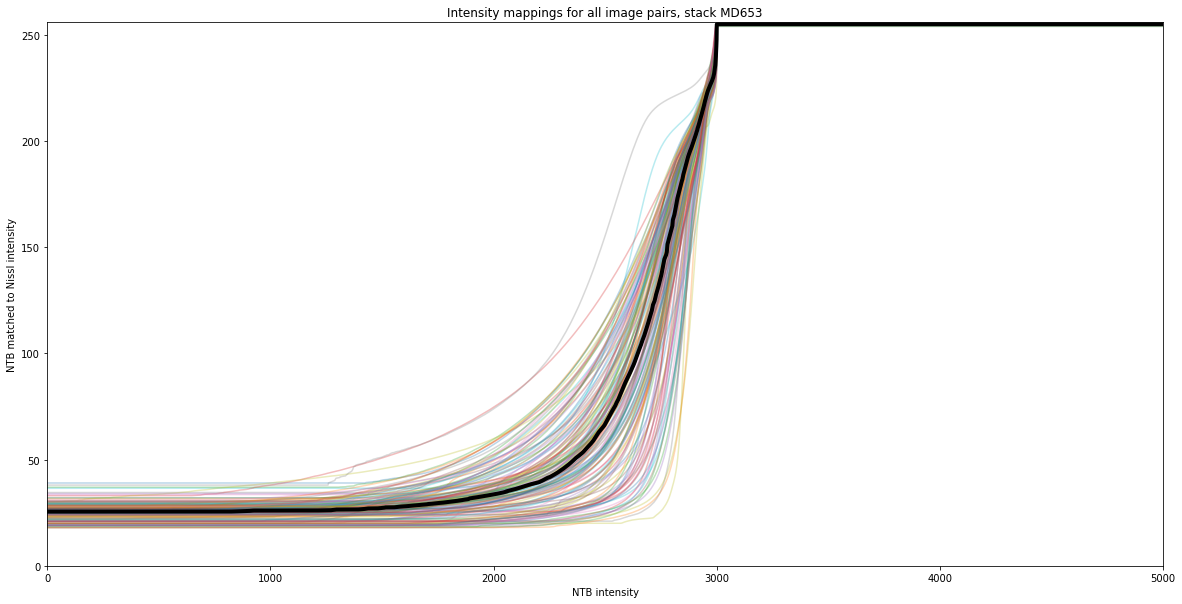

rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_intensity_mapping.npy


Child returned 0
Child returned 0
0.54 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F16-2016.12.16-21.00.10_MD652_1_0046_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F16-2016.12.16-21.00.10_MD652_1_0046_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F16-2016.12.16-21.00.10_MD652_1_0046_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F16-2016.12.16-21.00.10_MD652_2_0047_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F16-2016.12.16-21.00.10_MD652_2_0047_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F16-2016.12.16-21.00.10_MD652_2_0047_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F16-2016.12.16-21.00.10_MD652_3_0048_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F16-2016.12.16-21.00.10_MD652_3_0048_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F16-2016.12.16-21.00.10_MD652_3_0048_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F17-2016.12.16-21.14.41_MD652_1_0049_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F17-2016.12.16-21.14.41_MD652_1_0049_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F17-2016.12.16-21.14.41_MD652_1_0049_intensity_mapping.npy


Child returned 0
0.51 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F17-2016.12.16-21.14.41_MD652_2_0050_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F17-2016.12.16-21.14.41_MD652_2_0050_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F17-2016.12.16-21.14.41_MD652_2_0050_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F17-2016.12.16-21.14.41_MD652_3_0051_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F17-2016.12.16-21.14.41_MD652_3_0051_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F17-2016.12.16-21.14.41_MD652_3_0051_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F18-2016.12.16-21.30.08_MD652_1_0052_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F18-2016.12.16-21.30.08_MD652_1_0052_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F18-2016.12.16-21.30.08_MD652_1_0052_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F18-2016.12.16-21.30.08_MD652_2_0053_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F18-2016.12.16-21.30.08_MD652_2_0053_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F18-2016.12.16-21.30.08_MD652_2_0053_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F18-2016.12.16-21.30.08_MD652_3_0054_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F18-2016.12.16-21.30.08_MD652_3_0054_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F18-2016.12.16-21.30.08_MD652_3_0054_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F19-2016.12.16-21.46.59_MD652_1_0055_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F19-2016.12.16-21.46.59_MD652_1_0055_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F19-2016.12.16-21.46.59_MD652_1_0055_intensity_mapping.npy


Child returned 0
0.54 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F19-2016.12.16-21.46.59_MD652_2_0056_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F19-2016.12.16-21.46.59_MD652_2_0056_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F19-2016.12.16-21.46.59_MD652_2_0056_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F19-2016.12.16-21.46.59_MD652_3_0057_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F19-2016.12.16-21.46.59_MD652_3_0057_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F19-2016.12.16-21.46.59_MD652_3_0057_intensity_mapping.npy


Child returned 0
0.46 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F20-2016.12.16-22.03.21_MD652_1_0058_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F20-2016.12.16-22.03.21_MD652_1_0058_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F20-2016.12.16-22.03.21_MD652_1_0058_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F20-2016.12.16-22.03.21_MD652_2_0059_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F20-2016.12.16-22.03.21_MD652_2_0059_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F20-2016.12.16-22.03.21_MD652_2_0059_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F20-2016.12.16-22.03.21_MD652_3_0060_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F20-2016.12.16-22.03.21_MD652_3_0060_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F20-2016.12.16-22.03.21_MD652_3_0060_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F21-2016.12.16-22.20.12_MD652_1_0061_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F21-2016.12.16-22.20.12_MD652_1_0061_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F21-2016.12.16-22.20.12_MD652_1_0061_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F21-2016.12.16-22.20.12_MD652_2_0062_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F21-2016.12.16-22.20.12_MD652_2_0062_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F21-2016.12.16-22.20.12_MD652_2_0062_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F21-2016.12.16-22.20.12_MD652_3_0063_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F21-2016.12.16-22.20.12_MD652_3_0063_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F21-2016.12.16-22.20.12_MD652_3_0063_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F22-2016.12.16-22.38.10_MD652_1_0064_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F22-2016.12.16-22.38.10_MD652_1_0064_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F22-2016.12.16-22.38.10_MD652_1_0064_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F22-2016.12.16-22.38.10_MD652_2_0065_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F22-2016.12.16-22.38.10_MD652_2_0065_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F22-2016.12.16-22.38.10_MD652_2_0065_intensity_mapping.npy


Child returned 0
0.47 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F22-2016.12.16-22.38.10_MD652_3_0066_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F22-2016.12.16-22.38.10_MD652_3_0066_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F22-2016.12.16-22.38.10_MD652_3_0066_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F23-2016.12.16-22.55.44_MD652_1_0067_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F23-2016.12.16-22.55.44_MD652_1_0067_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F23-2016.12.16-22.55.44_MD652_1_0067_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F23-2016.12.16-22.55.44_MD652_2_0068_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F23-2016.12.16-22.55.44_MD652_2_0068_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F23-2016.12.16-22.55.44_MD652_2_0068_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F23-2016.12.16-22.55.44_MD652_3_0069_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F23-2016.12.16-22.55.44_MD652_3_0069_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F23-2016.12.16-22.55.44_MD652_3_0069_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F24-2016.12.16-23.13.26_MD652_1_0070_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F24-2016.12.16-23.13.26_MD652_1_0070_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F24-2016.12.16-23.13.26_MD652_1_0070_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F24-2016.12.16-23.13.26_MD652_2_0071_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F24-2016.12.16-23.13.26_MD652_2_0071_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F24-2016.12.16-23.13.26_MD652_2_0071_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F24-2016.12.16-23.13.26_MD652_3_0072_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F24-2016.12.16-23.13.26_MD652_3_0072_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F24-2016.12.16-23.13.26_MD652_3_0072_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F25-2016.12.21-19.17.55_MD652_1_0073_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F25-2016.12.21-19.17.55_MD652_1_0073_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F25-2016.12.21-19.17.55_MD652_1_0073_intensity_mapping.npy


Child returned 0
0.47 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F25-2016.12.21-19.17.55_MD652_2_0074_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F25-2016.12.21-19.17.55_MD652_2_0074_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F25-2016.12.21-19.17.55_MD652_2_0074_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F25-2016.12.21-19.17.55_MD652_3_0075_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F25-2016.12.21-19.17.55_MD652_3_0075_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F25-2016.12.21-19.17.55_MD652_3_0075_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F26-2016.12.16-23.32.06_MD652_1_0076_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F26-2016.12.16-23.32.06_MD652_1_0076_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F26-2016.12.16-23.32.06_MD652_1_0076_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F26-2016.12.16-23.32.06_MD652_2_0077_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F26-2016.12.16-23.32.06_MD652_2_0077_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F26-2016.12.16-23.32.06_MD652_2_0077_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F27-2016.12.16-23.47.41_MD652_1_0079_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F27-2016.12.16-23.47.41_MD652_1_0079_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F27-2016.12.16-23.47.41_MD652_1_0079_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F27-2016.12.16-23.47.41_MD652_2_0080_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F27-2016.12.16-23.47.41_MD652_2_0080_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F27-2016.12.16-23.47.41_MD652_2_0080_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F28-2016.12.17-00.07.19_MD652_1_0082_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F28-2016.12.17-00.07.19_MD652_1_0082_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F28-2016.12.17-00.07.19_MD652_1_0082_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F28-2016.12.17-00.07.19_MD652_2_0083_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F28-2016.12.17-00.07.19_MD652_2_0083_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F28-2016.12.17-00.07.19_MD652_2_0083_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F29-2016.12.17-00.27.10_MD652_1_0085_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F29-2016.12.17-00.27.10_MD652_1_0085_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F29-2016.12.17-00.27.10_MD652_1_0085_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F29-2016.12.17-00.27.10_MD652_2_0086_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F29-2016.12.17-00.27.10_MD652_2_0086_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F29-2016.12.17-00.27.10_MD652_2_0086_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F30-2016.12.17-00.43.54_MD652_1_0088_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F30-2016.12.17-00.43.54_MD652_1_0088_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F30-2016.12.17-00.43.54_MD652_1_0088_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F30-2016.12.17-00.43.54_MD652_2_0089_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F30-2016.12.17-00.43.54_MD652_2_0089_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F30-2016.12.17-00.43.54_MD652_2_0089_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F31-2016.12.17-01.03.29_MD652_1_0091_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F31-2016.12.17-01.03.29_MD652_1_0091_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F31-2016.12.17-01.03.29_MD652_1_0091_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F31-2016.12.17-01.03.29_MD652_2_0092_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F31-2016.12.17-01.03.29_MD652_2_0092_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F31-2016.12.17-01.03.29_MD652_2_0092_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F32-2016.12.17-01.20.56_MD652_1_0094_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F32-2016.12.17-01.20.56_MD652_1_0094_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F32-2016.12.17-01.20.56_MD652_1_0094_intensity_mapping.npy


Child returned 0
0.54 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F32-2016.12.17-01.20.56_MD652_2_0095_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F32-2016.12.17-01.20.56_MD652_2_0095_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F32-2016.12.17-01.20.56_MD652_2_0095_intensity_mapping.npy


Child returned 0
0.46 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F33-2016.12.17-01.41.02_MD652_1_0097_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F33-2016.12.17-01.41.02_MD652_1_0097_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F33-2016.12.17-01.41.02_MD652_1_0097_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F33-2016.12.17-01.41.02_MD652_2_0098_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F33-2016.12.17-01.41.02_MD652_2_0098_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F33-2016.12.17-01.41.02_MD652_2_0098_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F34-2016.12.17-02.01.21_MD652_1_0100_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F34-2016.12.17-02.01.21_MD652_1_0100_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F34-2016.12.17-02.01.21_MD652_1_0100_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F34-2016.12.17-02.01.21_MD652_2_0101_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F34-2016.12.17-02.01.21_MD652_2_0101_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F34-2016.12.17-02.01.21_MD652_2_0101_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F35-2016.12.17-02.22.15_MD652_1_0103_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F35-2016.12.17-02.22.15_MD652_1_0103_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F35-2016.12.17-02.22.15_MD652_1_0103_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F35-2016.12.17-02.22.15_MD652_2_0104_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F35-2016.12.17-02.22.15_MD652_2_0104_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F35-2016.12.17-02.22.15_MD652_2_0104_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F36-2016.12.17-02.42.25_MD652_1_0106_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F36-2016.12.17-02.42.25_MD652_1_0106_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F36-2016.12.17-02.42.25_MD652_1_0106_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F36-2016.12.17-02.42.25_MD652_2_0107_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F36-2016.12.17-02.42.25_MD652_2_0107_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F36-2016.12.17-02.42.25_MD652_2_0107_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F37-2016.12.17-03.03.35_MD652_1_0109_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F37-2016.12.17-03.03.35_MD652_1_0109_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F37-2016.12.17-03.03.35_MD652_1_0109_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F37-2016.12.17-03.03.35_MD652_2_0110_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F37-2016.12.17-03.03.35_MD652_2_0110_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F37-2016.12.17-03.03.35_MD652_2_0110_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F38-2016.12.17-03.26.49_MD652_1_0112_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F38-2016.12.17-03.26.49_MD652_1_0112_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F38-2016.12.17-03.26.49_MD652_1_0112_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F38-2016.12.17-03.26.49_MD652_2_0113_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F38-2016.12.17-03.26.49_MD652_2_0113_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F38-2016.12.17-03.26.49_MD652_2_0113_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F39-2016.12.17-03.48.57_MD652_1_0115_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F39-2016.12.17-03.48.57_MD652_1_0115_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F39-2016.12.17-03.48.57_MD652_1_0115_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F39-2016.12.17-03.48.57_MD652_2_0116_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F39-2016.12.17-03.48.57_MD652_2_0116_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F39-2016.12.17-03.48.57_MD652_2_0116_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F40-2016.12.17-04.11.06_MD652_1_0118_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F40-2016.12.17-04.11.06_MD652_1_0118_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F40-2016.12.17-04.11.06_MD652_1_0118_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F40-2016.12.17-04.11.06_MD652_2_0119_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F40-2016.12.17-04.11.06_MD652_2_0119_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F40-2016.12.17-04.11.06_MD652_2_0119_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F41-2016.12.17-04.32.16_MD652_1_0121_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F41-2016.12.17-04.32.16_MD652_1_0121_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F41-2016.12.17-04.32.16_MD652_1_0121_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F41-2016.12.17-04.32.16_MD652_2_0122_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F41-2016.12.17-04.32.16_MD652_2_0122_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F41-2016.12.17-04.32.16_MD652_2_0122_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F42-2016.12.17-04.52.39_MD652_1_0124_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F42-2016.12.17-04.52.39_MD652_1_0124_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F42-2016.12.17-04.52.39_MD652_1_0124_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F42-2016.12.17-04.52.39_MD652_2_0125_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F42-2016.12.17-04.52.39_MD652_2_0125_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F42-2016.12.17-04.52.39_MD652_2_0125_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F43-2016.12.17-05.14.08_MD652_1_0127_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F43-2016.12.17-05.14.08_MD652_1_0127_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F43-2016.12.17-05.14.08_MD652_1_0127_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F43-2016.12.17-05.14.08_MD652_2_0128_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F43-2016.12.17-05.14.08_MD652_2_0128_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F43-2016.12.17-05.14.08_MD652_2_0128_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F44-2016.12.17-05.33.57_MD652_1_0130_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F44-2016.12.17-05.33.57_MD652_1_0130_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F44-2016.12.17-05.33.57_MD652_1_0130_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F44-2016.12.17-05.33.57_MD652_2_0131_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F44-2016.12.17-05.33.57_MD652_2_0131_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F44-2016.12.17-05.33.57_MD652_2_0131_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F45-2016.12.17-05.56.31_MD652_1_0133_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F45-2016.12.17-05.56.31_MD652_1_0133_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F45-2016.12.17-05.56.31_MD652_1_0133_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F45-2016.12.17-05.56.31_MD652_2_0134_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F45-2016.12.17-05.56.31_MD652_2_0134_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F45-2016.12.17-05.56.31_MD652_2_0134_intensity_mapping.npy


Child returned 0
0.47 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F46-2016.12.17-06.19.10_MD652_1_0136_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F46-2016.12.17-06.19.10_MD652_1_0136_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F46-2016.12.17-06.19.10_MD652_1_0136_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F46-2016.12.17-06.19.10_MD652_2_0137_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F46-2016.12.17-06.19.10_MD652_2_0137_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F46-2016.12.17-06.19.10_MD652_2_0137_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F47-2016.12.17-06.39.51_MD652_1_0139_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F47-2016.12.17-06.39.51_MD652_1_0139_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F47-2016.12.17-06.39.51_MD652_1_0139_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F47-2016.12.17-06.39.51_MD652_2_0140_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F47-2016.12.17-06.39.51_MD652_2_0140_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F47-2016.12.17-06.39.51_MD652_2_0140_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F48-2016.12.17-07.02.21_MD652_1_0142_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F48-2016.12.17-07.02.21_MD652_1_0142_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F48-2016.12.17-07.02.21_MD652_1_0142_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F48-2016.12.17-07.02.21_MD652_2_0143_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F48-2016.12.17-07.02.21_MD652_2_0143_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F48-2016.12.17-07.02.21_MD652_2_0143_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F49-2016.12.17-07.24.25_MD652_1_0145_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F49-2016.12.17-07.24.25_MD652_1_0145_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F49-2016.12.17-07.24.25_MD652_1_0145_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F49-2016.12.17-07.24.25_MD652_2_0146_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F49-2016.12.17-07.24.25_MD652_2_0146_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F49-2016.12.17-07.24.25_MD652_2_0146_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F50-2016.12.17-07.45.18_MD652_1_0148_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F50-2016.12.17-07.45.18_MD652_1_0148_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F50-2016.12.17-07.45.18_MD652_1_0148_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F50-2016.12.17-07.45.18_MD652_2_0149_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F50-2016.12.17-07.45.18_MD652_2_0149_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F50-2016.12.17-07.45.18_MD652_2_0149_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F51-2016.12.17-08.06.38_MD652_1_0151_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F51-2016.12.17-08.06.38_MD652_1_0151_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F51-2016.12.17-08.06.38_MD652_1_0151_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F51-2016.12.17-08.06.38_MD652_2_0152_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F51-2016.12.17-08.06.38_MD652_2_0152_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F51-2016.12.17-08.06.38_MD652_2_0152_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F52-2016.12.17-08.27.19_MD652_1_0154_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F52-2016.12.17-08.27.19_MD652_1_0154_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F52-2016.12.17-08.27.19_MD652_1_0154_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F52-2016.12.17-08.27.19_MD652_2_0155_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F52-2016.12.17-08.27.19_MD652_2_0155_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F52-2016.12.17-08.27.19_MD652_2_0155_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F53-2016.12.17-08.49.58_MD652_1_0157_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F53-2016.12.17-08.49.58_MD652_1_0157_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F53-2016.12.17-08.49.58_MD652_1_0157_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F53-2016.12.17-08.49.58_MD652_2_0158_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F53-2016.12.17-08.49.58_MD652_2_0158_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F53-2016.12.17-08.49.58_MD652_2_0158_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F54-2016.12.17-09.11.29_MD652_1_0160_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F54-2016.12.17-09.11.29_MD652_1_0160_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F54-2016.12.17-09.11.29_MD652_1_0160_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F54-2016.12.17-09.11.29_MD652_2_0161_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F54-2016.12.17-09.11.29_MD652_2_0161_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F54-2016.12.17-09.11.29_MD652_2_0161_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F55-2016.12.17-09.33.02_MD652_1_0163_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F55-2016.12.17-09.33.02_MD652_1_0163_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F55-2016.12.17-09.33.02_MD652_1_0163_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F55-2016.12.17-09.33.02_MD652_2_0164_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F55-2016.12.17-09.33.02_MD652_2_0164_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F55-2016.12.17-09.33.02_MD652_2_0164_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F56-2016.12.17-09.52.35_MD652_1_0166_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F56-2016.12.17-09.52.35_MD652_1_0166_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F56-2016.12.17-09.52.35_MD652_1_0166_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F56-2016.12.17-09.52.35_MD652_2_0167_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F56-2016.12.17-09.52.35_MD652_2_0167_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F56-2016.12.17-09.52.35_MD652_2_0167_intensity_mapping.npy


Child returned 0
0.41 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F57-2016.12.17-10.12.43_MD652_1_0169_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F57-2016.12.17-10.12.43_MD652_1_0169_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F57-2016.12.17-10.12.43_MD652_1_0169_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F57-2016.12.17-10.12.43_MD652_2_0170_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F57-2016.12.17-10.12.43_MD652_2_0170_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F57-2016.12.17-10.12.43_MD652_2_0170_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F58-2016.12.17-10.32.53_MD652_1_0172_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F58-2016.12.17-10.32.53_MD652_1_0172_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F58-2016.12.17-10.32.53_MD652_1_0172_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F58-2016.12.17-10.32.53_MD652_2_0173_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F58-2016.12.17-10.32.53_MD652_2_0173_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F58-2016.12.17-10.32.53_MD652_2_0173_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F59-2016.12.17-10.54.18_MD652_1_0175_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F59-2016.12.17-10.54.18_MD652_1_0175_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F59-2016.12.17-10.54.18_MD652_1_0175_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F59-2016.12.17-10.54.18_MD652_2_0176_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F59-2016.12.17-10.54.18_MD652_2_0176_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F59-2016.12.17-10.54.18_MD652_2_0176_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F60-2016.12.17-11.14.14_MD652_1_0178_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F60-2016.12.17-11.14.14_MD652_1_0178_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F60-2016.12.17-11.14.14_MD652_1_0178_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F60-2016.12.17-11.14.14_MD652_2_0179_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F60-2016.12.17-11.14.14_MD652_2_0179_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F60-2016.12.17-11.14.14_MD652_2_0179_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F61-2016.12.17-11.34.22_MD652_1_0181_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F61-2016.12.17-11.34.22_MD652_1_0181_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F61-2016.12.17-11.34.22_MD652_1_0181_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F61-2016.12.17-11.34.22_MD652_2_0182_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F61-2016.12.17-11.34.22_MD652_2_0182_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F61-2016.12.17-11.34.22_MD652_2_0182_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F62-2016.12.17-11.54.35_MD652_1_0184_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F62-2016.12.17-11.54.35_MD652_1_0184_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F62-2016.12.17-11.54.35_MD652_1_0184_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F62-2016.12.17-11.54.35_MD652_2_0185_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F62-2016.12.17-11.54.35_MD652_2_0185_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F62-2016.12.17-11.54.35_MD652_2_0185_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F62-2016.12.17-11.54.35_MD652_3_0186_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F62-2016.12.17-11.54.35_MD652_3_0186_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F62-2016.12.17-11.54.35_MD652_3_0186_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F63-2016.12.17-12.13.44_MD652_1_0187_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F63-2016.12.17-12.13.44_MD652_1_0187_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F63-2016.12.17-12.13.44_MD652_1_0187_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F63-2016.12.17-12.13.44_MD652_2_0188_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F63-2016.12.17-12.13.44_MD652_2_0188_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F63-2016.12.17-12.13.44_MD652_2_0188_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F63-2016.12.17-12.13.44_MD652_3_0189_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F63-2016.12.17-12.13.44_MD652_3_0189_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F63-2016.12.17-12.13.44_MD652_3_0189_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F64-2016.12.17-12.36.08_MD652_1_0190_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F64-2016.12.17-12.36.08_MD652_1_0190_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F64-2016.12.17-12.36.08_MD652_1_0190_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F64-2016.12.17-12.36.08_MD652_2_0191_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F64-2016.12.17-12.36.08_MD652_2_0191_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F64-2016.12.17-12.36.08_MD652_2_0191_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F64-2016.12.17-12.36.08_MD652_3_0192_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F64-2016.12.17-12.36.08_MD652_3_0192_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F64-2016.12.17-12.36.08_MD652_3_0192_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F65-2016.12.17-12.56.37_MD652_1_0193_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F65-2016.12.17-12.56.37_MD652_1_0193_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F65-2016.12.17-12.56.37_MD652_1_0193_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F65-2016.12.17-12.56.37_MD652_2_0194_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F65-2016.12.17-12.56.37_MD652_2_0194_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F65-2016.12.17-12.56.37_MD652_2_0194_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F65-2016.12.17-12.56.37_MD652_3_0195_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F65-2016.12.17-12.56.37_MD652_3_0195_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F65-2016.12.17-12.56.37_MD652_3_0195_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F66-2016.12.17-13.17.05_MD652_1_0196_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F66-2016.12.17-13.17.05_MD652_1_0196_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F66-2016.12.17-13.17.05_MD652_1_0196_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F66-2016.12.17-13.17.05_MD652_2_0197_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F66-2016.12.17-13.17.05_MD652_2_0197_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F66-2016.12.17-13.17.05_MD652_2_0197_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F66-2016.12.17-13.17.05_MD652_3_0198_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F66-2016.12.17-13.17.05_MD652_3_0198_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F66-2016.12.17-13.17.05_MD652_3_0198_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F67-2016.12.17-13.38.34_MD652_1_0199_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F67-2016.12.17-13.38.34_MD652_1_0199_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F67-2016.12.17-13.38.34_MD652_1_0199_intensity_mapping.npy


Child returned 0
0.46 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F67-2016.12.17-13.38.34_MD652_2_0200_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F67-2016.12.17-13.38.34_MD652_2_0200_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F67-2016.12.17-13.38.34_MD652_2_0200_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F67-2016.12.17-13.38.34_MD652_3_0201_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F67-2016.12.17-13.38.34_MD652_3_0201_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F67-2016.12.17-13.38.34_MD652_3_0201_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F68-2016.12.17-14.00.21_MD652_1_0202_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F68-2016.12.17-14.00.21_MD652_1_0202_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F68-2016.12.17-14.00.21_MD652_1_0202_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F68-2016.12.17-14.00.21_MD652_2_0203_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F68-2016.12.17-14.00.21_MD652_2_0203_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F68-2016.12.17-14.00.21_MD652_2_0203_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F68-2016.12.17-14.00.21_MD652_3_0204_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F68-2016.12.17-14.00.21_MD652_3_0204_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F68-2016.12.17-14.00.21_MD652_3_0204_intensity_mapping.npy


Child returned 0
0.39 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F69-2016.12.17-14.21.17_MD652_1_0205_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F69-2016.12.17-14.21.17_MD652_1_0205_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F69-2016.12.17-14.21.17_MD652_1_0205_intensity_mapping.npy


Child returned 0
0.46 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F69-2016.12.17-14.21.17_MD652_2_0206_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F69-2016.12.17-14.21.17_MD652_2_0206_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F69-2016.12.17-14.21.17_MD652_2_0206_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F69-2016.12.17-14.21.17_MD652_3_0207_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F69-2016.12.17-14.21.17_MD652_3_0207_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F69-2016.12.17-14.21.17_MD652_3_0207_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F70-2016.12.17-14.40.15_MD652_1_0208_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F70-2016.12.17-14.40.15_MD652_1_0208_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F70-2016.12.17-14.40.15_MD652_1_0208_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F70-2016.12.17-14.40.15_MD652_2_0209_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F70-2016.12.17-14.40.15_MD652_2_0209_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F70-2016.12.17-14.40.15_MD652_2_0209_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F70-2016.12.17-14.40.15_MD652_3_0210_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F70-2016.12.17-14.40.15_MD652_3_0210_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F70-2016.12.17-14.40.15_MD652_3_0210_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F71-2016.12.17-14.57.58_MD652_1_0211_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F71-2016.12.17-14.57.58_MD652_1_0211_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F71-2016.12.17-14.57.58_MD652_1_0211_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F71-2016.12.17-14.57.58_MD652_2_0212_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F71-2016.12.17-14.57.58_MD652_2_0212_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F71-2016.12.17-14.57.58_MD652_2_0212_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F71-2016.12.17-14.57.58_MD652_3_0213_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F71-2016.12.17-14.57.58_MD652_3_0213_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F71-2016.12.17-14.57.58_MD652_3_0213_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F72-2016.12.17-15.15.41_MD652_1_0214_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F72-2016.12.17-15.15.41_MD652_1_0214_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F72-2016.12.17-15.15.41_MD652_1_0214_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F72-2016.12.17-15.15.41_MD652_2_0215_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F72-2016.12.17-15.15.41_MD652_2_0215_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F72-2016.12.17-15.15.41_MD652_2_0215_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F72-2016.12.17-15.15.41_MD652_3_0216_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F72-2016.12.17-15.15.41_MD652_3_0216_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F72-2016.12.17-15.15.41_MD652_3_0216_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F73-2016.12.17-15.32.01_MD652_1_0217_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F73-2016.12.17-15.32.01_MD652_1_0217_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F73-2016.12.17-15.32.01_MD652_1_0217_intensity_mapping.npy


Child returned 0
0.41 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F73-2016.12.17-15.32.01_MD652_2_0218_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F73-2016.12.17-15.32.01_MD652_2_0218_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F73-2016.12.17-15.32.01_MD652_2_0218_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F73-2016.12.17-15.32.01_MD652_3_0219_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F73-2016.12.17-15.32.01_MD652_3_0219_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F73-2016.12.17-15.32.01_MD652_3_0219_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F74-2016.12.17-15.50.00_MD652_1_0220_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F74-2016.12.17-15.50.00_MD652_1_0220_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F74-2016.12.17-15.50.00_MD652_1_0220_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F74-2016.12.17-15.50.00_MD652_2_0221_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F74-2016.12.17-15.50.00_MD652_2_0221_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F74-2016.12.17-15.50.00_MD652_2_0221_intensity_mapping.npy


Child returned 0
0.39 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F74-2016.12.17-15.50.00_MD652_3_0222_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F74-2016.12.17-15.50.00_MD652_3_0222_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F74-2016.12.17-15.50.00_MD652_3_0222_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F75-2016.12.17-16.07.27_MD652_1_0223_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F75-2016.12.17-16.07.27_MD652_1_0223_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F75-2016.12.17-16.07.27_MD652_1_0223_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F75-2016.12.17-16.07.27_MD652_2_0224_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F75-2016.12.17-16.07.27_MD652_2_0224_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F75-2016.12.17-16.07.27_MD652_2_0224_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F75-2016.12.17-16.07.27_MD652_3_0225_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F75-2016.12.17-16.07.27_MD652_3_0225_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F75-2016.12.17-16.07.27_MD652_3_0225_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F76-2016.12.17-16.24.34_MD652_1_0226_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F76-2016.12.17-16.24.34_MD652_1_0226_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F76-2016.12.17-16.24.34_MD652_1_0226_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F76-2016.12.17-16.24.34_MD652_2_0227_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD652/MD652_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F76-2016.12.17-16.24.34_MD652_2_0227_intensity_mapping.npy /shared/CSHL_data_processed/MD652/MD652_intensity_mapping/MD652-F76-2016.12.17-16.24.34_MD652_2_0227_intensity_mapping.npy


Child returned 0
0.44 seconds.


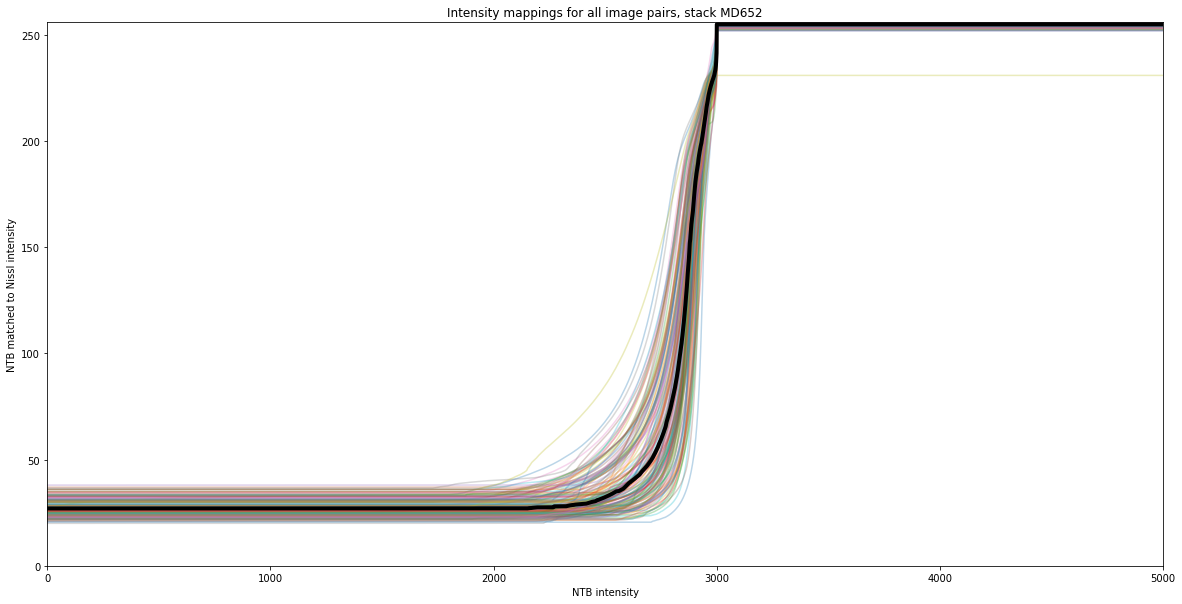

rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F14-2017.01.14-01.26.25_MD642_2_0041_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F14-2017.01.14-01.26.25_MD642_2_0041_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F14-2017.01.14-01.26.25_MD642_2_0041_intensity_mapping.npy


Child returned 0
Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F14-2017.01.14-01.26.25_MD642_3_0042_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F14-2017.01.14-01.26.25_MD642_3_0042_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F14-2017.01.14-01.26.25_MD642_3_0042_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F15-2017.01.14-01.41.14_MD642_1_0043_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F15-2017.01.14-01.41.14_MD642_1_0043_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F15-2017.01.14-01.41.14_MD642_1_0043_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F15-2017.01.14-01.41.14_MD642_2_0044_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F15-2017.01.14-01.41.14_MD642_2_0044_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F15-2017.01.14-01.41.14_MD642_2_0044_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F15-2017.01.14-01.41.14_MD642_3_0045_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F15-2017.01.14-01.41.14_MD642_3_0045_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F15-2017.01.14-01.41.14_MD642_3_0045_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F16-2017.01.14-01.57.29_MD642_1_0046_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F16-2017.01.14-01.57.29_MD642_1_0046_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F16-2017.01.14-01.57.29_MD642_1_0046_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F16-2017.01.14-01.57.29_MD642_2_0047_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F16-2017.01.14-01.57.29_MD642_2_0047_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F16-2017.01.14-01.57.29_MD642_2_0047_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F16-2017.01.14-01.57.29_MD642_3_0048_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F16-2017.01.14-01.57.29_MD642_3_0048_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F16-2017.01.14-01.57.29_MD642_3_0048_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F17-2017.01.14-02.13.38_MD642_1_0049_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F17-2017.01.14-02.13.38_MD642_1_0049_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F17-2017.01.14-02.13.38_MD642_1_0049_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F17-2017.01.14-02.13.38_MD642_2_0050_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F17-2017.01.14-02.13.38_MD642_2_0050_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F17-2017.01.14-02.13.38_MD642_2_0050_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F17-2017.01.14-02.13.38_MD642_3_0051_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F17-2017.01.14-02.13.38_MD642_3_0051_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F17-2017.01.14-02.13.38_MD642_3_0051_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F18-2017.01.14-02.29.55_MD642_1_0052_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F18-2017.01.14-02.29.55_MD642_1_0052_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F18-2017.01.14-02.29.55_MD642_1_0052_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F18-2017.01.14-02.29.55_MD642_2_0053_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F18-2017.01.14-02.29.55_MD642_2_0053_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F18-2017.01.14-02.29.55_MD642_2_0053_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F18-2017.01.14-02.29.55_MD642_3_0054_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F18-2017.01.14-02.29.55_MD642_3_0054_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F18-2017.01.14-02.29.55_MD642_3_0054_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F19-2017.01.14-02.45.12_MD642_1_0055_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F19-2017.01.14-02.45.12_MD642_1_0055_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F19-2017.01.14-02.45.12_MD642_1_0055_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F19-2017.01.14-02.45.12_MD642_2_0056_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F19-2017.01.14-02.45.12_MD642_2_0056_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F19-2017.01.14-02.45.12_MD642_2_0056_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F19-2017.01.14-02.45.12_MD642_3_0057_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F19-2017.01.14-02.45.12_MD642_3_0057_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F19-2017.01.14-02.45.12_MD642_3_0057_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F20-2017.01.14-03.02.52_MD642_1_0058_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F20-2017.01.14-03.02.52_MD642_1_0058_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F20-2017.01.14-03.02.52_MD642_1_0058_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F20-2017.01.14-03.02.52_MD642_2_0059_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F20-2017.01.14-03.02.52_MD642_2_0059_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F20-2017.01.14-03.02.52_MD642_2_0059_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F20-2017.01.14-03.02.52_MD642_3_0060_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F20-2017.01.14-03.02.52_MD642_3_0060_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F20-2017.01.14-03.02.52_MD642_3_0060_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F21-2017.01.14-03.20.17_MD642_1_0061_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F21-2017.01.14-03.20.17_MD642_1_0061_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F21-2017.01.14-03.20.17_MD642_1_0061_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F21-2017.01.14-03.20.17_MD642_2_0062_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F21-2017.01.14-03.20.17_MD642_2_0062_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F21-2017.01.14-03.20.17_MD642_2_0062_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F21-2017.01.14-03.20.17_MD642_3_0063_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F21-2017.01.14-03.20.17_MD642_3_0063_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F21-2017.01.14-03.20.17_MD642_3_0063_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F22-2017.01.14-03.38.23_MD642_1_0064_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F22-2017.01.14-03.38.23_MD642_1_0064_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F22-2017.01.14-03.38.23_MD642_1_0064_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F22-2017.01.14-03.38.23_MD642_2_0065_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F22-2017.01.14-03.38.23_MD642_2_0065_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F22-2017.01.14-03.38.23_MD642_2_0065_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F23-2017.01.14-03.51.55_MD642_1_0067_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F23-2017.01.14-03.51.55_MD642_1_0067_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F23-2017.01.14-03.51.55_MD642_1_0067_intensity_mapping.npy


Child returned 0
0.55 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F23-2017.01.14-03.51.55_MD642_2_0068_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F23-2017.01.14-03.51.55_MD642_2_0068_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F23-2017.01.14-03.51.55_MD642_2_0068_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F24-2017.01.20-12.36.05_MD642_2_0071_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F24-2017.01.20-12.36.05_MD642_2_0071_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F24-2017.01.20-12.36.05_MD642_2_0071_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F24-2017.01.20-12.36.05_MD642_3_0072_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F24-2017.01.20-12.36.05_MD642_3_0072_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F24-2017.01.20-12.36.05_MD642_3_0072_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F25-2017.01.14-04.05.34_MD642_1_0073_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F25-2017.01.14-04.05.34_MD642_1_0073_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F25-2017.01.14-04.05.34_MD642_1_0073_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F25-2017.01.14-04.05.34_MD642_2_0074_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F25-2017.01.14-04.05.34_MD642_2_0074_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F25-2017.01.14-04.05.34_MD642_2_0074_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F26-2017.01.20-13.12.30_MD642_2_0077_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F26-2017.01.20-13.12.30_MD642_2_0077_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F26-2017.01.20-13.12.30_MD642_2_0077_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F26-2017.01.20-13.12.30_MD642_3_0078_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F26-2017.01.20-13.12.30_MD642_3_0078_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F26-2017.01.20-13.12.30_MD642_3_0078_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F27-2017.01.14-04.20.38_MD642_1_0079_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F27-2017.01.14-04.20.38_MD642_1_0079_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F27-2017.01.14-04.20.38_MD642_1_0079_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F27-2017.01.14-04.20.38_MD642_2_0080_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F27-2017.01.14-04.20.38_MD642_2_0080_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F27-2017.01.14-04.20.38_MD642_2_0080_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F28-2017.01.14-04.36.18_MD642_1_0082_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F28-2017.01.14-04.36.18_MD642_1_0082_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F28-2017.01.14-04.36.18_MD642_1_0082_intensity_mapping.npy


Child returned 0
0.40 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F28-2017.01.14-04.36.18_MD642_2_0083_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F28-2017.01.14-04.36.18_MD642_2_0083_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F28-2017.01.14-04.36.18_MD642_2_0083_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F29-2017.01.14-04.51.03_MD642_1_0085_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F29-2017.01.14-04.51.03_MD642_1_0085_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F29-2017.01.14-04.51.03_MD642_1_0085_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F29-2017.01.14-04.51.03_MD642_2_0086_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F29-2017.01.14-04.51.03_MD642_2_0086_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F29-2017.01.14-04.51.03_MD642_2_0086_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F30-2017.01.14-05.05.16_MD642_1_0088_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F30-2017.01.14-05.05.16_MD642_1_0088_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F30-2017.01.14-05.05.16_MD642_1_0088_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F30-2017.01.14-05.05.16_MD642_2_0089_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F30-2017.01.14-05.05.16_MD642_2_0089_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F30-2017.01.14-05.05.16_MD642_2_0089_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F31-2017.01.14-05.20.53_MD642_1_0091_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F31-2017.01.14-05.20.53_MD642_1_0091_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F31-2017.01.14-05.20.53_MD642_1_0091_intensity_mapping.npy


Child returned 0
0.39 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F31-2017.01.14-05.20.53_MD642_2_0092_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F31-2017.01.14-05.20.53_MD642_2_0092_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F31-2017.01.14-05.20.53_MD642_2_0092_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F32-2017.01.14-05.37.24_MD642_1_0094_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F32-2017.01.14-05.37.24_MD642_1_0094_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F32-2017.01.14-05.37.24_MD642_1_0094_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F32-2017.01.14-05.37.24_MD642_2_0095_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F32-2017.01.14-05.37.24_MD642_2_0095_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F32-2017.01.14-05.37.24_MD642_2_0095_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F33-2017.01.14-05.52.46_MD642_1_0097_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F33-2017.01.14-05.52.46_MD642_1_0097_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F33-2017.01.14-05.52.46_MD642_1_0097_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F33-2017.01.14-05.52.46_MD642_2_0098_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F33-2017.01.14-05.52.46_MD642_2_0098_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F33-2017.01.14-05.52.46_MD642_2_0098_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F34-2017.01.14-06.08.54_MD642_1_0100_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F34-2017.01.14-06.08.54_MD642_1_0100_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F34-2017.01.14-06.08.54_MD642_1_0100_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F34-2017.01.14-06.08.54_MD642_2_0101_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F34-2017.01.14-06.08.54_MD642_2_0101_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F34-2017.01.14-06.08.54_MD642_2_0101_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F35-2017.01.14-06.26.43_MD642_2_0104_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F35-2017.01.14-06.26.43_MD642_2_0104_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F35-2017.01.14-06.26.43_MD642_2_0104_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F36-2017.01.14-06.44.13_MD642_1_0106_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F36-2017.01.14-06.44.13_MD642_1_0106_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F36-2017.01.14-06.44.13_MD642_1_0106_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F36-2017.01.14-06.44.13_MD642_2_0107_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F36-2017.01.14-06.44.13_MD642_2_0107_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F36-2017.01.14-06.44.13_MD642_2_0107_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F37-2017.01.14-07.03.06_MD642_1_0109_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F37-2017.01.14-07.03.06_MD642_1_0109_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F37-2017.01.14-07.03.06_MD642_1_0109_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F37-2017.01.14-07.03.06_MD642_2_0110_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F37-2017.01.14-07.03.06_MD642_2_0110_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F37-2017.01.14-07.03.06_MD642_2_0110_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F38-2017.01.14-07.22.31_MD642_1_0112_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F38-2017.01.14-07.22.31_MD642_1_0112_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F38-2017.01.14-07.22.31_MD642_1_0112_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F38-2017.01.14-07.22.31_MD642_2_0113_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F38-2017.01.14-07.22.31_MD642_2_0113_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F38-2017.01.14-07.22.31_MD642_2_0113_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F39-2017.01.14-07.43.05_MD642_1_0115_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F39-2017.01.14-07.43.05_MD642_1_0115_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F39-2017.01.14-07.43.05_MD642_1_0115_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F39-2017.01.14-07.43.05_MD642_2_0116_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F39-2017.01.14-07.43.05_MD642_2_0116_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F39-2017.01.14-07.43.05_MD642_2_0116_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F40-2017.01.14-08.03.13_MD642_1_0118_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F40-2017.01.14-08.03.13_MD642_1_0118_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F40-2017.01.14-08.03.13_MD642_1_0118_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F40-2017.01.14-08.03.13_MD642_2_0119_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F40-2017.01.14-08.03.13_MD642_2_0119_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F40-2017.01.14-08.03.13_MD642_2_0119_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F41-2017.01.14-08.24.04_MD642_1_0121_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F41-2017.01.14-08.24.04_MD642_1_0121_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F41-2017.01.14-08.24.04_MD642_1_0121_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F41-2017.01.14-08.24.04_MD642_2_0122_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F41-2017.01.14-08.24.04_MD642_2_0122_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F41-2017.01.14-08.24.04_MD642_2_0122_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F42-2017.01.14-08.45.15_MD642_1_0124_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F42-2017.01.14-08.45.15_MD642_1_0124_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F42-2017.01.14-08.45.15_MD642_1_0124_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F42-2017.01.14-08.45.15_MD642_2_0125_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F42-2017.01.14-08.45.15_MD642_2_0125_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F42-2017.01.14-08.45.15_MD642_2_0125_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F43-2017.01.14-09.05.04_MD642_1_0127_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F43-2017.01.14-09.05.04_MD642_1_0127_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F43-2017.01.14-09.05.04_MD642_1_0127_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F43-2017.01.14-09.05.04_MD642_2_0128_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F43-2017.01.14-09.05.04_MD642_2_0128_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F43-2017.01.14-09.05.04_MD642_2_0128_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F44-2017.01.14-09.23.44_MD642_1_0130_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F44-2017.01.14-09.23.44_MD642_1_0130_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F44-2017.01.14-09.23.44_MD642_1_0130_intensity_mapping.npy


Child returned 0
0.40 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F44-2017.01.14-09.23.44_MD642_2_0131_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F44-2017.01.14-09.23.44_MD642_2_0131_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F44-2017.01.14-09.23.44_MD642_2_0131_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F45-2017.01.14-09.42.58_MD642_1_0133_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F45-2017.01.14-09.42.58_MD642_1_0133_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F45-2017.01.14-09.42.58_MD642_1_0133_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F45-2017.01.14-09.42.58_MD642_2_0134_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F45-2017.01.14-09.42.58_MD642_2_0134_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F45-2017.01.14-09.42.58_MD642_2_0134_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F46-2017.01.14-10.04.15_MD642_1_0136_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F46-2017.01.14-10.04.15_MD642_1_0136_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F46-2017.01.14-10.04.15_MD642_1_0136_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F46-2017.01.14-10.04.15_MD642_2_0137_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F46-2017.01.14-10.04.15_MD642_2_0137_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F46-2017.01.14-10.04.15_MD642_2_0137_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F47-2017.01.14-10.24.55_MD642_1_0139_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F47-2017.01.14-10.24.55_MD642_1_0139_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F47-2017.01.14-10.24.55_MD642_1_0139_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F47-2017.01.14-10.24.55_MD642_2_0140_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F47-2017.01.14-10.24.55_MD642_2_0140_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F47-2017.01.14-10.24.55_MD642_2_0140_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F48-2017.01.14-10.45.22_MD642_1_0142_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F48-2017.01.14-10.45.22_MD642_1_0142_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F48-2017.01.14-10.45.22_MD642_1_0142_intensity_mapping.npy


Child returned 0
0.46 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F48-2017.01.14-10.45.22_MD642_2_0143_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F48-2017.01.14-10.45.22_MD642_2_0143_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F48-2017.01.14-10.45.22_MD642_2_0143_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F49-2017.01.14-11.04.31_MD642_1_0145_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F49-2017.01.14-11.04.31_MD642_1_0145_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F49-2017.01.14-11.04.31_MD642_1_0145_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F49-2017.01.14-11.04.31_MD642_2_0146_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F49-2017.01.14-11.04.31_MD642_2_0146_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F49-2017.01.14-11.04.31_MD642_2_0146_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F50-2017.01.14-11.25.39_MD642_1_0148_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F50-2017.01.14-11.25.39_MD642_1_0148_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F50-2017.01.14-11.25.39_MD642_1_0148_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F50-2017.01.14-11.25.39_MD642_2_0149_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F50-2017.01.14-11.25.39_MD642_2_0149_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F50-2017.01.14-11.25.39_MD642_2_0149_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F51-2017.01.14-11.44.48_MD642_1_0151_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F51-2017.01.14-11.44.48_MD642_1_0151_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F51-2017.01.14-11.44.48_MD642_1_0151_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F51-2017.01.14-11.44.48_MD642_2_0152_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F51-2017.01.14-11.44.48_MD642_2_0152_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F51-2017.01.14-11.44.48_MD642_2_0152_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F52-2017.01.14-12.03.55_MD642_1_0154_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F52-2017.01.14-12.03.55_MD642_1_0154_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F52-2017.01.14-12.03.55_MD642_1_0154_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F52-2017.01.14-12.03.55_MD642_2_0155_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F52-2017.01.14-12.03.55_MD642_2_0155_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F52-2017.01.14-12.03.55_MD642_2_0155_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F53-2017.01.14-12.23.43_MD642_1_0157_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F53-2017.01.14-12.23.43_MD642_1_0157_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F53-2017.01.14-12.23.43_MD642_1_0157_intensity_mapping.npy


Child returned 0
0.39 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F53-2017.01.14-12.23.43_MD642_2_0158_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F53-2017.01.14-12.23.43_MD642_2_0158_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F53-2017.01.14-12.23.43_MD642_2_0158_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F54-2017.01.14-12.46.28_MD642_1_0160_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F54-2017.01.14-12.46.28_MD642_1_0160_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F54-2017.01.14-12.46.28_MD642_1_0160_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F54-2017.01.14-12.46.28_MD642_2_0161_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F54-2017.01.14-12.46.28_MD642_2_0161_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F54-2017.01.14-12.46.28_MD642_2_0161_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F55-2017.01.14-13.07.33_MD642_1_0163_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F55-2017.01.14-13.07.33_MD642_1_0163_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F55-2017.01.14-13.07.33_MD642_1_0163_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F55-2017.01.14-13.07.33_MD642_2_0164_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F55-2017.01.14-13.07.33_MD642_2_0164_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F55-2017.01.14-13.07.33_MD642_2_0164_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F56-2017.01.14-13.26.57_MD642_1_0166_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F56-2017.01.14-13.26.57_MD642_1_0166_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F56-2017.01.14-13.26.57_MD642_1_0166_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F56-2017.01.14-13.26.57_MD642_2_0167_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F56-2017.01.14-13.26.57_MD642_2_0167_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F56-2017.01.14-13.26.57_MD642_2_0167_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F57-2017.01.14-13.46.37_MD642_1_0169_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F57-2017.01.14-13.46.37_MD642_1_0169_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F57-2017.01.14-13.46.37_MD642_1_0169_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F57-2017.01.14-13.46.37_MD642_2_0170_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F57-2017.01.14-13.46.37_MD642_2_0170_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F57-2017.01.14-13.46.37_MD642_2_0170_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F58-2017.01.14-14.06.12_MD642_1_0172_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F58-2017.01.14-14.06.12_MD642_1_0172_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F58-2017.01.14-14.06.12_MD642_1_0172_intensity_mapping.npy


Child returned 0
0.46 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F58-2017.01.14-14.06.12_MD642_2_0173_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F58-2017.01.14-14.06.12_MD642_2_0173_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F58-2017.01.14-14.06.12_MD642_2_0173_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F59-2017.01.14-14.24.53_MD642_1_0175_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F59-2017.01.14-14.24.53_MD642_1_0175_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F59-2017.01.14-14.24.53_MD642_1_0175_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F59-2017.01.14-14.24.53_MD642_2_0176_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F59-2017.01.14-14.24.53_MD642_2_0176_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F59-2017.01.14-14.24.53_MD642_2_0176_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F60-2017.01.14-14.43.27_MD642_1_0178_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F60-2017.01.14-14.43.27_MD642_1_0178_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F60-2017.01.14-14.43.27_MD642_1_0178_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F60-2017.01.14-14.43.27_MD642_2_0179_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F60-2017.01.14-14.43.27_MD642_2_0179_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F60-2017.01.14-14.43.27_MD642_2_0179_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F61-2017.01.14-15.02.03_MD642_1_0181_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F61-2017.01.14-15.02.03_MD642_1_0181_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F61-2017.01.14-15.02.03_MD642_1_0181_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F61-2017.01.14-15.02.03_MD642_2_0182_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F61-2017.01.14-15.02.03_MD642_2_0182_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F61-2017.01.14-15.02.03_MD642_2_0182_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F62-2017.01.14-15.21.42_MD642_1_0184_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F62-2017.01.14-15.21.42_MD642_1_0184_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F62-2017.01.14-15.21.42_MD642_1_0184_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F62-2017.01.14-15.21.42_MD642_2_0185_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F62-2017.01.14-15.21.42_MD642_2_0185_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F62-2017.01.14-15.21.42_MD642_2_0185_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F63-2017.01.14-15.41.18_MD642_1_0187_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F63-2017.01.14-15.41.18_MD642_1_0187_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F63-2017.01.14-15.41.18_MD642_1_0187_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F63-2017.01.14-15.41.18_MD642_2_0188_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F63-2017.01.14-15.41.18_MD642_2_0188_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F63-2017.01.14-15.41.18_MD642_2_0188_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F64-2017.01.14-16.00.33_MD642_1_0190_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F64-2017.01.14-16.00.33_MD642_1_0190_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F64-2017.01.14-16.00.33_MD642_1_0190_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F64-2017.01.14-16.00.33_MD642_2_0191_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F64-2017.01.14-16.00.33_MD642_2_0191_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F64-2017.01.14-16.00.33_MD642_2_0191_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F65-2017.01.14-16.18.32_MD642_1_0193_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F65-2017.01.14-16.18.32_MD642_1_0193_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F65-2017.01.14-16.18.32_MD642_1_0193_intensity_mapping.npy


Child returned 0
0.41 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F65-2017.01.14-16.18.32_MD642_2_0194_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F65-2017.01.14-16.18.32_MD642_2_0194_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F65-2017.01.14-16.18.32_MD642_2_0194_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F66-2017.01.14-16.38.30_MD642_1_0196_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F66-2017.01.14-16.38.30_MD642_1_0196_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F66-2017.01.14-16.38.30_MD642_1_0196_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F66-2017.01.14-16.38.30_MD642_2_0197_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F66-2017.01.14-16.38.30_MD642_2_0197_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F66-2017.01.14-16.38.30_MD642_2_0197_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F67-2017.01.14-16.56.49_MD642_1_0199_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F67-2017.01.14-16.56.49_MD642_1_0199_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F67-2017.01.14-16.56.49_MD642_1_0199_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F67-2017.01.14-16.56.49_MD642_2_0200_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F67-2017.01.14-16.56.49_MD642_2_0200_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F67-2017.01.14-16.56.49_MD642_2_0200_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F68-2017.01.14-17.12.22_MD642_1_0202_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F68-2017.01.14-17.12.22_MD642_1_0202_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F68-2017.01.14-17.12.22_MD642_1_0202_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F68-2017.01.14-17.12.22_MD642_2_0203_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F68-2017.01.14-17.12.22_MD642_2_0203_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F68-2017.01.14-17.12.22_MD642_2_0203_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F69-2017.01.14-17.29.28_MD642_1_0205_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F69-2017.01.14-17.29.28_MD642_1_0205_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F69-2017.01.14-17.29.28_MD642_1_0205_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F69-2017.01.14-17.29.28_MD642_2_0206_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F69-2017.01.14-17.29.28_MD642_2_0206_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F69-2017.01.14-17.29.28_MD642_2_0206_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F70-2017.01.14-17.45.16_MD642_1_0208_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F70-2017.01.14-17.45.16_MD642_1_0208_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F70-2017.01.14-17.45.16_MD642_1_0208_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F70-2017.01.14-17.45.16_MD642_2_0209_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F70-2017.01.14-17.45.16_MD642_2_0209_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F70-2017.01.14-17.45.16_MD642_2_0209_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F70-2017.01.14-17.45.16_MD642_3_0210_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F70-2017.01.14-17.45.16_MD642_3_0210_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F70-2017.01.14-17.45.16_MD642_3_0210_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F71-2017.01.14-18.03.33_MD642_1_0211_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F71-2017.01.14-18.03.33_MD642_1_0211_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F71-2017.01.14-18.03.33_MD642_1_0211_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F71-2017.01.14-18.03.33_MD642_2_0212_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F71-2017.01.14-18.03.33_MD642_2_0212_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F71-2017.01.14-18.03.33_MD642_2_0212_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F71-2017.01.14-18.03.33_MD642_3_0213_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F71-2017.01.14-18.03.33_MD642_3_0213_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F71-2017.01.14-18.03.33_MD642_3_0213_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F72-2017.01.14-18.22.52_MD642_1_0214_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F72-2017.01.14-18.22.52_MD642_1_0214_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F72-2017.01.14-18.22.52_MD642_1_0214_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F72-2017.01.14-18.22.52_MD642_2_0215_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F72-2017.01.14-18.22.52_MD642_2_0215_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F72-2017.01.14-18.22.52_MD642_2_0215_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F72-2017.01.14-18.22.52_MD642_3_0216_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F72-2017.01.14-18.22.52_MD642_3_0216_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F72-2017.01.14-18.22.52_MD642_3_0216_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F73-2017.01.14-18.41.16_MD642_1_0217_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F73-2017.01.14-18.41.16_MD642_1_0217_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F73-2017.01.14-18.41.16_MD642_1_0217_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F73-2017.01.14-18.41.16_MD642_2_0218_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F73-2017.01.14-18.41.16_MD642_2_0218_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F73-2017.01.14-18.41.16_MD642_2_0218_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F73-2017.01.14-18.41.16_MD642_3_0219_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F73-2017.01.14-18.41.16_MD642_3_0219_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F73-2017.01.14-18.41.16_MD642_3_0219_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F74-2017.01.14-18.59.37_MD642_1_0220_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F74-2017.01.14-18.59.37_MD642_1_0220_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F74-2017.01.14-18.59.37_MD642_1_0220_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F74-2017.01.14-18.59.37_MD642_2_0221_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F74-2017.01.14-18.59.37_MD642_2_0221_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F74-2017.01.14-18.59.37_MD642_2_0221_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F74-2017.01.14-18.59.37_MD642_3_0222_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F74-2017.01.14-18.59.37_MD642_3_0222_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F74-2017.01.14-18.59.37_MD642_3_0222_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F75-2017.01.14-19.16.52_MD642_1_0223_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F75-2017.01.14-19.16.52_MD642_1_0223_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F75-2017.01.14-19.16.52_MD642_1_0223_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F75-2017.01.14-19.16.52_MD642_2_0224_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F75-2017.01.14-19.16.52_MD642_2_0224_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F75-2017.01.14-19.16.52_MD642_2_0224_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F75-2017.01.14-19.16.52_MD642_3_0225_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F75-2017.01.14-19.16.52_MD642_3_0225_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F75-2017.01.14-19.16.52_MD642_3_0225_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F76-2017.01.14-19.35.00_MD642_1_0226_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F76-2017.01.14-19.35.00_MD642_1_0226_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F76-2017.01.14-19.35.00_MD642_1_0226_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F76-2017.01.14-19.35.00_MD642_2_0227_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F76-2017.01.14-19.35.00_MD642_2_0227_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F76-2017.01.14-19.35.00_MD642_2_0227_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F76-2017.01.14-19.35.00_MD642_3_0228_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F76-2017.01.14-19.35.00_MD642_3_0228_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F76-2017.01.14-19.35.00_MD642_3_0228_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F77-2017.01.14-19.51.19_MD642_1_0229_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F77-2017.01.14-19.51.19_MD642_1_0229_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F77-2017.01.14-19.51.19_MD642_1_0229_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F77-2017.01.14-19.51.19_MD642_2_0230_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F77-2017.01.14-19.51.19_MD642_2_0230_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F77-2017.01.14-19.51.19_MD642_2_0230_intensity_mapping.npy


Child returned 0
3.81 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F77-2017.01.14-19.51.19_MD642_3_0231_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD642/MD642_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F77-2017.01.14-19.51.19_MD642_3_0231_intensity_mapping.npy /shared/CSHL_data_processed/MD642/MD642_intensity_mapping/MD642-F77-2017.01.14-19.51.19_MD642_3_0231_intensity_mapping.npy


Child returned 0
0.42 seconds.


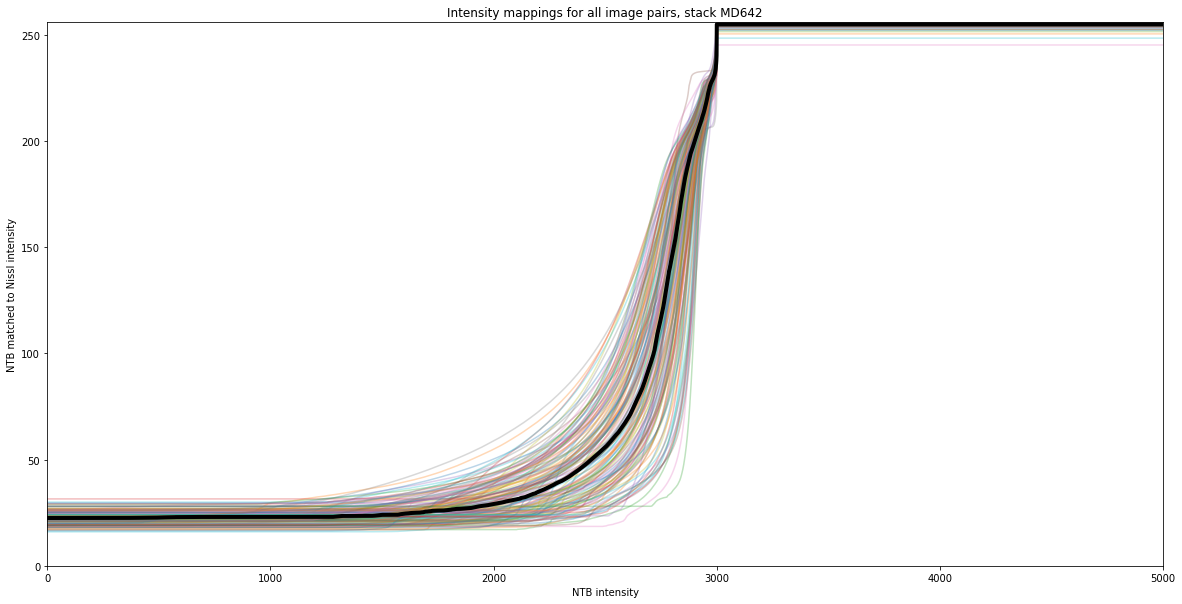

rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F13-2017.02.17-20.12.13_MD657_3_0039_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F13-2017.02.17-20.12.13_MD657_3_0039_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F13-2017.02.17-20.12.13_MD657_3_0039_intensity_mapping.npy


Child returned 0
Child returned 0
0.46 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F14-2017.02.17-20.29.47_MD657_1_0040_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F14-2017.02.17-20.29.47_MD657_1_0040_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F14-2017.02.17-20.29.47_MD657_1_0040_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F14-2017.02.17-20.29.47_MD657_2_0041_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F14-2017.02.17-20.29.47_MD657_2_0041_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F14-2017.02.17-20.29.47_MD657_2_0041_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F14-2017.02.17-20.29.47_MD657_3_0042_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F14-2017.02.17-20.29.47_MD657_3_0042_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F14-2017.02.17-20.29.47_MD657_3_0042_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F15-2017.02.17-20.46.06_MD657_1_0043_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F15-2017.02.17-20.46.06_MD657_1_0043_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F15-2017.02.17-20.46.06_MD657_1_0043_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F15-2017.02.17-20.46.06_MD657_2_0044_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F15-2017.02.17-20.46.06_MD657_2_0044_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F15-2017.02.17-20.46.06_MD657_2_0044_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F15-2017.02.17-20.46.06_MD657_3_0045_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F15-2017.02.17-20.46.06_MD657_3_0045_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F15-2017.02.17-20.46.06_MD657_3_0045_intensity_mapping.npy


Child returned 0
0.46 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F16-2017.02.17-21.02.17_MD657_1_0046_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F16-2017.02.17-21.02.17_MD657_1_0046_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F16-2017.02.17-21.02.17_MD657_1_0046_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F16-2017.02.17-21.02.17_MD657_2_0047_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F16-2017.02.17-21.02.17_MD657_2_0047_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F16-2017.02.17-21.02.17_MD657_2_0047_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F16-2017.02.17-21.02.17_MD657_3_0048_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F16-2017.02.17-21.02.17_MD657_3_0048_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F16-2017.02.17-21.02.17_MD657_3_0048_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F17-2017.02.17-21.22.26_MD657_1_0049_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F17-2017.02.17-21.22.26_MD657_1_0049_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F17-2017.02.17-21.22.26_MD657_1_0049_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F17-2017.02.17-21.22.26_MD657_2_0050_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F17-2017.02.17-21.22.26_MD657_2_0050_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F17-2017.02.17-21.22.26_MD657_2_0050_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F17-2017.02.17-21.22.26_MD657_3_0051_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F17-2017.02.17-21.22.26_MD657_3_0051_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F17-2017.02.17-21.22.26_MD657_3_0051_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F18-2017.02.17-21.43.03_MD657_1_0052_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F18-2017.02.17-21.43.03_MD657_1_0052_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F18-2017.02.17-21.43.03_MD657_1_0052_intensity_mapping.npy


Child returned 0
0.58 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F18-2017.02.17-21.43.03_MD657_2_0053_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F18-2017.02.17-21.43.03_MD657_2_0053_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F18-2017.02.17-21.43.03_MD657_2_0053_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F18-2017.02.17-21.43.03_MD657_3_0054_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F18-2017.02.17-21.43.03_MD657_3_0054_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F18-2017.02.17-21.43.03_MD657_3_0054_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F19-2017.02.17-22.03.48_MD657_1_0055_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F19-2017.02.17-22.03.48_MD657_1_0055_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F19-2017.02.17-22.03.48_MD657_1_0055_intensity_mapping.npy


Child returned 0
0.46 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F19-2017.02.17-22.03.48_MD657_2_0056_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F19-2017.02.17-22.03.48_MD657_2_0056_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F19-2017.02.17-22.03.48_MD657_2_0056_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F19-2017.02.23-16.16.58_MD657_3_0057_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F19-2017.02.23-16.16.58_MD657_3_0057_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F19-2017.02.23-16.16.58_MD657_3_0057_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F20-2017.02.17-22.23.13_MD657_1_0058_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F20-2017.02.17-22.23.13_MD657_1_0058_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F20-2017.02.17-22.23.13_MD657_1_0058_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F20-2017.02.17-22.23.13_MD657_2_0059_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F20-2017.02.17-22.23.13_MD657_2_0059_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F20-2017.02.17-22.23.13_MD657_2_0059_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F21-2017.02.17-22.40.14_MD657_1_0061_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F21-2017.02.17-22.40.14_MD657_1_0061_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F21-2017.02.17-22.40.14_MD657_1_0061_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F21-2017.02.17-22.40.14_MD657_2_0062_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F21-2017.02.17-22.40.14_MD657_2_0062_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F21-2017.02.17-22.40.14_MD657_2_0062_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F22-2017.02.17-22.55.59_MD657_1_0064_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F22-2017.02.17-22.55.59_MD657_1_0064_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F22-2017.02.17-22.55.59_MD657_1_0064_intensity_mapping.npy


Child returned 0
0.54 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F22-2017.02.17-22.55.59_MD657_2_0065_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F22-2017.02.17-22.55.59_MD657_2_0065_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F22-2017.02.17-22.55.59_MD657_2_0065_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F23-2017.02.17-23.13.17_MD657_1_0067_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F23-2017.02.17-23.13.17_MD657_1_0067_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F23-2017.02.17-23.13.17_MD657_1_0067_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F23-2017.02.17-23.13.17_MD657_2_0068_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F23-2017.02.17-23.13.17_MD657_2_0068_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F23-2017.02.17-23.13.17_MD657_2_0068_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F24-2017.02.17-23.30.45_MD657_1_0070_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F24-2017.02.17-23.30.45_MD657_1_0070_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F24-2017.02.17-23.30.45_MD657_1_0070_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F24-2017.02.17-23.30.45_MD657_2_0071_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F24-2017.02.17-23.30.45_MD657_2_0071_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F24-2017.02.17-23.30.45_MD657_2_0071_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F25-2017.02.17-23.50.52_MD657_1_0073_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F25-2017.02.17-23.50.52_MD657_1_0073_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F25-2017.02.17-23.50.52_MD657_1_0073_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F25-2017.02.17-23.50.52_MD657_2_0074_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F25-2017.02.17-23.50.52_MD657_2_0074_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F25-2017.02.17-23.50.52_MD657_2_0074_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F26-2017.02.18-00.10.00_MD657_1_0076_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F26-2017.02.18-00.10.00_MD657_1_0076_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F26-2017.02.18-00.10.00_MD657_1_0076_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F26-2017.02.18-00.10.00_MD657_2_0077_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F26-2017.02.18-00.10.00_MD657_2_0077_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F26-2017.02.18-00.10.00_MD657_2_0077_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F27-2017.02.18-00.26.43_MD657_1_0079_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F27-2017.02.18-00.26.43_MD657_1_0079_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F27-2017.02.18-00.26.43_MD657_1_0079_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F27-2017.02.18-00.26.43_MD657_2_0080_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F27-2017.02.18-00.26.43_MD657_2_0080_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F27-2017.02.18-00.26.43_MD657_2_0080_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F28-2017.02.18-00.45.02_MD657_1_0082_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F28-2017.02.18-00.45.02_MD657_1_0082_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F28-2017.02.18-00.45.02_MD657_1_0082_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F28-2017.02.18-00.45.02_MD657_2_0083_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F28-2017.02.18-00.45.02_MD657_2_0083_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F28-2017.02.18-00.45.02_MD657_2_0083_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F29-2017.02.18-01.04.58_MD657_1_0085_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F29-2017.02.18-01.04.58_MD657_1_0085_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F29-2017.02.18-01.04.58_MD657_1_0085_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F29-2017.02.18-01.04.58_MD657_2_0086_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F29-2017.02.18-01.04.58_MD657_2_0086_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F29-2017.02.18-01.04.58_MD657_2_0086_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F30-2017.02.18-01.19.38_MD657_1_0088_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F30-2017.02.18-01.19.38_MD657_1_0088_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F30-2017.02.18-01.19.38_MD657_1_0088_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F30-2017.02.18-01.19.38_MD657_2_0089_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F30-2017.02.18-01.19.38_MD657_2_0089_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F30-2017.02.18-01.19.38_MD657_2_0089_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F31-2017.02.18-01.38.22_MD657_1_0091_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F31-2017.02.18-01.38.22_MD657_1_0091_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F31-2017.02.18-01.38.22_MD657_1_0091_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F31-2017.02.18-01.38.22_MD657_2_0092_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F31-2017.02.18-01.38.22_MD657_2_0092_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F31-2017.02.18-01.38.22_MD657_2_0092_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F32-2017.02.18-01.56.25_MD657_1_0094_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F32-2017.02.18-01.56.25_MD657_1_0094_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F32-2017.02.18-01.56.25_MD657_1_0094_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F32-2017.02.18-01.56.25_MD657_2_0095_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F32-2017.02.18-01.56.25_MD657_2_0095_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F32-2017.02.18-01.56.25_MD657_2_0095_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F33-2017.02.18-02.14.58_MD657_1_0097_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F33-2017.02.18-02.14.58_MD657_1_0097_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F33-2017.02.18-02.14.58_MD657_1_0097_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F33-2017.02.18-02.14.58_MD657_2_0098_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F33-2017.02.18-02.14.58_MD657_2_0098_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F33-2017.02.18-02.14.58_MD657_2_0098_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F34-2017.02.18-02.34.03_MD657_1_0100_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F34-2017.02.18-02.34.03_MD657_1_0100_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F34-2017.02.18-02.34.03_MD657_1_0100_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F34-2017.02.18-02.34.03_MD657_2_0101_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F34-2017.02.18-02.34.03_MD657_2_0101_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F34-2017.02.18-02.34.03_MD657_2_0101_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F35-2017.02.18-02.55.49_MD657_1_0103_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F35-2017.02.18-02.55.49_MD657_1_0103_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F35-2017.02.18-02.55.49_MD657_1_0103_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F35-2017.02.18-02.55.49_MD657_2_0104_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F35-2017.02.18-02.55.49_MD657_2_0104_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F35-2017.02.18-02.55.49_MD657_2_0104_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F36-2017.02.18-03.17.09_MD657_1_0106_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F36-2017.02.18-03.17.09_MD657_1_0106_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F36-2017.02.18-03.17.09_MD657_1_0106_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F36-2017.02.18-03.17.09_MD657_2_0107_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F36-2017.02.18-03.17.09_MD657_2_0107_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F36-2017.02.18-03.17.09_MD657_2_0107_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F37-2017.02.18-03.39.28_MD657_1_0109_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F37-2017.02.18-03.39.28_MD657_1_0109_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F37-2017.02.18-03.39.28_MD657_1_0109_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F37-2017.02.18-03.39.28_MD657_2_0110_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F37-2017.02.18-03.39.28_MD657_2_0110_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F37-2017.02.18-03.39.28_MD657_2_0110_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F38-2017.02.18-04.00.12_MD657_1_0112_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F38-2017.02.18-04.00.12_MD657_1_0112_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F38-2017.02.18-04.00.12_MD657_1_0112_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F38-2017.02.18-04.00.12_MD657_2_0113_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F38-2017.02.18-04.00.12_MD657_2_0113_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F38-2017.02.18-04.00.12_MD657_2_0113_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F39-2017.02.18-04.23.19_MD657_1_0115_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F39-2017.02.18-04.23.19_MD657_1_0115_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F39-2017.02.18-04.23.19_MD657_1_0115_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F39-2017.02.18-04.23.19_MD657_2_0116_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F39-2017.02.18-04.23.19_MD657_2_0116_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F39-2017.02.18-04.23.19_MD657_2_0116_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F40-2017.02.18-04.41.42_MD657_1_0118_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F40-2017.02.18-04.41.42_MD657_1_0118_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F40-2017.02.18-04.41.42_MD657_1_0118_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F40-2017.02.18-04.41.42_MD657_2_0119_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F40-2017.02.18-04.41.42_MD657_2_0119_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F40-2017.02.18-04.41.42_MD657_2_0119_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F41-2017.02.18-05.02.58_MD657_1_0121_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F41-2017.02.18-05.02.58_MD657_1_0121_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F41-2017.02.18-05.02.58_MD657_1_0121_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F41-2017.02.18-05.02.58_MD657_2_0122_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F41-2017.02.18-05.02.58_MD657_2_0122_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F41-2017.02.18-05.02.58_MD657_2_0122_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F42-2017.02.18-05.24.25_MD657_1_0124_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F42-2017.02.18-05.24.25_MD657_1_0124_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F42-2017.02.18-05.24.25_MD657_1_0124_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F42-2017.02.18-05.24.25_MD657_2_0125_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F42-2017.02.18-05.24.25_MD657_2_0125_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F42-2017.02.18-05.24.25_MD657_2_0125_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F43-2017.02.18-05.45.18_MD657_2_0128_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F43-2017.02.18-05.45.18_MD657_2_0128_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F43-2017.02.18-05.45.18_MD657_2_0128_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F44-2017.02.18-06.06.27_MD657_1_0130_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F44-2017.02.18-06.06.27_MD657_1_0130_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F44-2017.02.18-06.06.27_MD657_1_0130_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F44-2017.02.18-06.06.27_MD657_2_0131_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F44-2017.02.18-06.06.27_MD657_2_0131_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F44-2017.02.18-06.06.27_MD657_2_0131_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F45-2017.02.18-06.31.13_MD657_1_0133_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F45-2017.02.18-06.31.13_MD657_1_0133_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F45-2017.02.18-06.31.13_MD657_1_0133_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F45-2017.02.18-06.31.13_MD657_2_0134_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F45-2017.02.18-06.31.13_MD657_2_0134_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F45-2017.02.18-06.31.13_MD657_2_0134_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F46-2017.02.18-06.53.05_MD657_1_0136_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F46-2017.02.18-06.53.05_MD657_1_0136_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F46-2017.02.18-06.53.05_MD657_1_0136_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F46-2017.02.18-06.53.05_MD657_2_0137_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F46-2017.02.18-06.53.05_MD657_2_0137_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F46-2017.02.18-06.53.05_MD657_2_0137_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F47-2017.02.18-07.16.41_MD657_1_0139_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F47-2017.02.18-07.16.41_MD657_1_0139_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F47-2017.02.18-07.16.41_MD657_1_0139_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F47-2017.02.18-07.16.41_MD657_2_0140_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F47-2017.02.18-07.16.41_MD657_2_0140_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F47-2017.02.18-07.16.41_MD657_2_0140_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F48-2017.02.18-07.38.25_MD657_1_0142_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F48-2017.02.18-07.38.25_MD657_1_0142_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F48-2017.02.18-07.38.25_MD657_1_0142_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F48-2017.02.18-07.38.25_MD657_2_0143_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F48-2017.02.18-07.38.25_MD657_2_0143_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F48-2017.02.18-07.38.25_MD657_2_0143_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F49-2017.02.18-08.01.25_MD657_1_0145_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F49-2017.02.18-08.01.25_MD657_1_0145_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F49-2017.02.18-08.01.25_MD657_1_0145_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F49-2017.02.18-08.01.25_MD657_2_0146_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F49-2017.02.18-08.01.25_MD657_2_0146_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F49-2017.02.18-08.01.25_MD657_2_0146_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F50-2017.02.18-08.23.22_MD657_1_0148_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F50-2017.02.18-08.23.22_MD657_1_0148_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F50-2017.02.18-08.23.22_MD657_1_0148_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F50-2017.02.18-08.23.22_MD657_2_0149_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F50-2017.02.18-08.23.22_MD657_2_0149_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F50-2017.02.18-08.23.22_MD657_2_0149_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F51-2017.02.18-08.45.55_MD657_1_0151_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F51-2017.02.18-08.45.55_MD657_1_0151_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F51-2017.02.18-08.45.55_MD657_1_0151_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F51-2017.02.18-08.45.55_MD657_2_0152_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F51-2017.02.18-08.45.55_MD657_2_0152_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F51-2017.02.18-08.45.55_MD657_2_0152_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F52-2017.02.18-09.06.44_MD657_1_0154_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F52-2017.02.18-09.06.44_MD657_1_0154_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F52-2017.02.18-09.06.44_MD657_1_0154_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F52-2017.02.18-09.06.44_MD657_2_0155_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F52-2017.02.18-09.06.44_MD657_2_0155_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F52-2017.02.18-09.06.44_MD657_2_0155_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F53-2017.02.18-09.27.00_MD657_1_0157_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F53-2017.02.18-09.27.00_MD657_1_0157_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F53-2017.02.18-09.27.00_MD657_1_0157_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F53-2017.02.18-09.27.00_MD657_2_0158_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F53-2017.02.18-09.27.00_MD657_2_0158_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F53-2017.02.18-09.27.00_MD657_2_0158_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F54-2017.02.18-09.47.40_MD657_1_0160_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F54-2017.02.18-09.47.40_MD657_1_0160_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F54-2017.02.18-09.47.40_MD657_1_0160_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F54-2017.02.18-09.47.40_MD657_2_0161_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F54-2017.02.18-09.47.40_MD657_2_0161_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F54-2017.02.18-09.47.40_MD657_2_0161_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F55-2017.02.18-10.08.41_MD657_1_0163_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F55-2017.02.18-10.08.41_MD657_1_0163_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F55-2017.02.18-10.08.41_MD657_1_0163_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F55-2017.02.18-10.08.41_MD657_2_0164_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F55-2017.02.18-10.08.41_MD657_2_0164_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F55-2017.02.18-10.08.41_MD657_2_0164_intensity_mapping.npy


Child returned 0
0.47 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F56-2017.02.18-10.29.22_MD657_1_0166_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F56-2017.02.18-10.29.22_MD657_1_0166_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F56-2017.02.18-10.29.22_MD657_1_0166_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F56-2017.02.18-10.29.22_MD657_2_0167_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F56-2017.02.18-10.29.22_MD657_2_0167_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F56-2017.02.18-10.29.22_MD657_2_0167_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F57-2017.02.18-10.51.33_MD657_1_0169_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F57-2017.02.18-10.51.33_MD657_1_0169_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F57-2017.02.18-10.51.33_MD657_1_0169_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F57-2017.02.18-10.51.33_MD657_2_0170_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F57-2017.02.18-10.51.33_MD657_2_0170_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F57-2017.02.18-10.51.33_MD657_2_0170_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F58-2017.02.18-11.13.40_MD657_1_0172_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F58-2017.02.18-11.13.40_MD657_1_0172_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F58-2017.02.18-11.13.40_MD657_1_0172_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F58-2017.02.18-11.13.40_MD657_2_0173_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F58-2017.02.18-11.13.40_MD657_2_0173_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F58-2017.02.18-11.13.40_MD657_2_0173_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F59-2017.02.18-11.35.33_MD657_1_0175_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F59-2017.02.18-11.35.33_MD657_1_0175_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F59-2017.02.18-11.35.33_MD657_1_0175_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F59-2017.02.18-11.35.33_MD657_2_0176_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F59-2017.02.18-11.35.33_MD657_2_0176_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F59-2017.02.18-11.35.33_MD657_2_0176_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F60-2017.02.18-11.55.59_MD657_1_0178_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F60-2017.02.18-11.55.59_MD657_1_0178_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F60-2017.02.18-11.55.59_MD657_1_0178_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F60-2017.02.18-11.55.59_MD657_2_0179_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F60-2017.02.18-11.55.59_MD657_2_0179_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F60-2017.02.18-11.55.59_MD657_2_0179_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F61-2017.02.18-12.18.33_MD657_1_0181_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F61-2017.02.18-12.18.33_MD657_1_0181_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F61-2017.02.18-12.18.33_MD657_1_0181_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F61-2017.02.18-12.18.33_MD657_2_0182_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F61-2017.02.18-12.18.33_MD657_2_0182_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F61-2017.02.18-12.18.33_MD657_2_0182_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F62-2017.03.03-14.13.07_MD657_1_0184_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F62-2017.03.03-14.13.07_MD657_1_0184_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F62-2017.03.03-14.13.07_MD657_1_0184_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F62-2017.03.03-14.13.07_MD657_2_0185_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F62-2017.03.03-14.13.07_MD657_2_0185_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F62-2017.03.03-14.13.07_MD657_2_0185_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F63-2017.02.18-12.40.56_MD657_1_0187_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F63-2017.02.18-12.40.56_MD657_1_0187_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F63-2017.02.18-12.40.56_MD657_1_0187_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F63-2017.02.18-12.40.56_MD657_2_0188_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F63-2017.02.18-12.40.56_MD657_2_0188_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F63-2017.02.18-12.40.56_MD657_2_0188_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F64-2017.02.18-13.04.19_MD657_1_0190_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F64-2017.02.18-13.04.19_MD657_1_0190_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F64-2017.02.18-13.04.19_MD657_1_0190_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F64-2017.02.18-13.04.19_MD657_2_0191_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F64-2017.02.18-13.04.19_MD657_2_0191_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F64-2017.02.18-13.04.19_MD657_2_0191_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F65-2017.02.18-13.26.50_MD657_1_0193_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F65-2017.02.18-13.26.50_MD657_1_0193_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F65-2017.02.18-13.26.50_MD657_1_0193_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F65-2017.02.18-13.26.50_MD657_2_0194_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F65-2017.02.18-13.26.50_MD657_2_0194_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F65-2017.02.18-13.26.50_MD657_2_0194_intensity_mapping.npy


Child returned 0
0.58 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F66-2017.02.18-13.46.29_MD657_2_0197_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F66-2017.02.18-13.46.29_MD657_2_0197_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F66-2017.02.18-13.46.29_MD657_2_0197_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F67-2017.02.18-14.08.14_MD657_1_0199_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F67-2017.02.18-14.08.14_MD657_1_0199_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F67-2017.02.18-14.08.14_MD657_1_0199_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F67-2017.02.18-14.08.14_MD657_2_0200_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F67-2017.02.18-14.08.14_MD657_2_0200_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F67-2017.02.18-14.08.14_MD657_2_0200_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F68-2017.02.18-14.30.16_MD657_1_0202_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F68-2017.02.18-14.30.16_MD657_1_0202_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F68-2017.02.18-14.30.16_MD657_1_0202_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F68-2017.02.18-14.30.16_MD657_2_0203_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F68-2017.02.18-14.30.16_MD657_2_0203_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F68-2017.02.18-14.30.16_MD657_2_0203_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F69-2017.02.24-23.35.00_MD657_1_0205_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F69-2017.02.24-23.35.00_MD657_1_0205_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F69-2017.02.24-23.35.00_MD657_1_0205_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F69-2017.02.24-23.35.00_MD657_2_0206_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F69-2017.02.24-23.35.00_MD657_2_0206_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F69-2017.02.24-23.35.00_MD657_2_0206_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F70-2017.02.18-14.49.54_MD657_1_0208_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F70-2017.02.18-14.49.54_MD657_1_0208_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F70-2017.02.18-14.49.54_MD657_1_0208_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F70-2017.02.18-14.49.54_MD657_2_0209_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F70-2017.02.18-14.49.54_MD657_2_0209_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F70-2017.02.18-14.49.54_MD657_2_0209_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F71-2017.02.18-15.08.19_MD657_1_0211_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F71-2017.02.18-15.08.19_MD657_1_0211_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F71-2017.02.18-15.08.19_MD657_1_0211_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F71-2017.02.18-15.08.19_MD657_2_0212_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F71-2017.02.18-15.08.19_MD657_2_0212_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F71-2017.02.18-15.08.19_MD657_2_0212_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F72-2017.02.18-15.26.35_MD657_1_0214_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F72-2017.02.18-15.26.35_MD657_1_0214_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F72-2017.02.18-15.26.35_MD657_1_0214_intensity_mapping.npy


Child returned 0
0.51 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F72-2017.02.18-15.26.35_MD657_2_0215_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F72-2017.02.18-15.26.35_MD657_2_0215_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F72-2017.02.18-15.26.35_MD657_2_0215_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F73-2017.02.18-15.46.36_MD657_1_0217_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F73-2017.02.18-15.46.36_MD657_1_0217_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F73-2017.02.18-15.46.36_MD657_1_0217_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F73-2017.02.18-15.46.36_MD657_2_0218_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F73-2017.02.18-15.46.36_MD657_2_0218_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F73-2017.02.18-15.46.36_MD657_2_0218_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F74-2017.02.23-17.14.18_MD657_1_0220_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F74-2017.02.23-17.14.18_MD657_1_0220_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F74-2017.02.23-17.14.18_MD657_1_0220_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F74-2017.02.18-16.04.48_MD657_2_0221_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F74-2017.02.18-16.04.48_MD657_2_0221_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F74-2017.02.18-16.04.48_MD657_2_0221_intensity_mapping.npy


Child returned 0
0.46 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F75-2017.02.18-16.21.28_MD657_1_0223_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F75-2017.02.18-16.21.28_MD657_1_0223_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F75-2017.02.18-16.21.28_MD657_1_0223_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F75-2017.02.18-16.21.28_MD657_2_0224_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F75-2017.02.18-16.21.28_MD657_2_0224_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F75-2017.02.18-16.21.28_MD657_2_0224_intensity_mapping.npy


Child returned 0
0.54 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F76-2017.02.18-16.37.33_MD657_1_0226_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F76-2017.02.18-16.37.33_MD657_1_0226_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F76-2017.02.18-16.37.33_MD657_1_0226_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F76-2017.02.18-16.37.33_MD657_2_0227_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F76-2017.02.18-16.37.33_MD657_2_0227_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F76-2017.02.18-16.37.33_MD657_2_0227_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F77-2017.02.18-16.54.30_MD657_1_0229_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F77-2017.02.18-16.54.30_MD657_1_0229_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F77-2017.02.18-16.54.30_MD657_1_0229_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F77-2017.02.18-16.54.30_MD657_2_0230_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD657/MD657_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F77-2017.02.18-16.54.30_MD657_2_0230_intensity_mapping.npy /shared/CSHL_data_processed/MD657/MD657_intensity_mapping/MD657-F77-2017.02.18-16.54.30_MD657_2_0230_intensity_mapping.npy


Child returned 0
0.43 seconds.


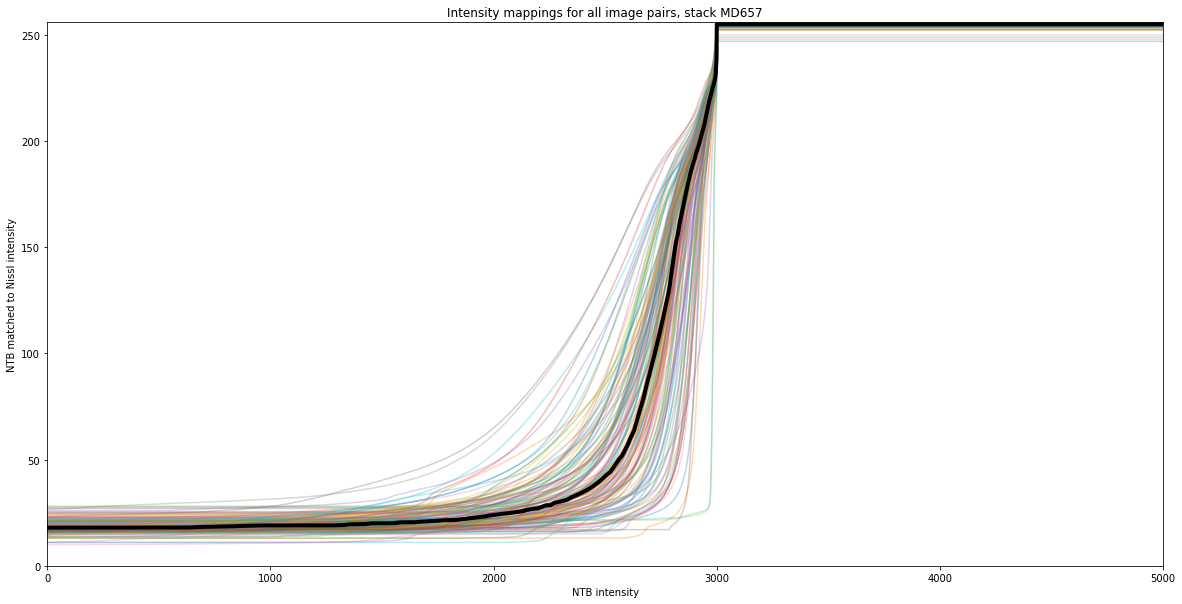

rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F18-2017.04.04-19.29.18_MD658_2_0053_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F18-2017.04.04-19.29.18_MD658_2_0053_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F18-2017.04.04-19.29.18_MD658_2_0053_intensity_mapping.npy


Child returned 0
Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F18-2017.04.04-19.29.18_MD658_3_0054_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F18-2017.04.04-19.29.18_MD658_3_0054_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F18-2017.04.04-19.29.18_MD658_3_0054_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.12-19.31.00_MD658_1_0055_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.12-19.31.00_MD658_1_0055_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.12-19.31.00_MD658_1_0055_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.12-19.31.00_MD658_2_0056_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.12-19.31.00_MD658_2_0056_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.12-19.31.00_MD658_2_0056_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.04-19.44.45_MD658_3_0057_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.04-19.44.45_MD658_3_0057_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F19-2017.04.04-19.44.45_MD658_3_0057_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.12-19.48.14_MD658_1_0058_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.12-19.48.14_MD658_1_0058_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.12-19.48.14_MD658_1_0058_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.04-20.00.33_MD658_2_0059_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.04-20.00.33_MD658_2_0059_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.04-20.00.33_MD658_2_0059_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.04-20.00.33_MD658_3_0060_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.04-20.00.33_MD658_3_0060_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F20-2017.04.04-20.00.33_MD658_3_0060_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F21-2017.04.04-20.15.37_MD658_1_0061_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F21-2017.04.04-20.15.37_MD658_1_0061_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F21-2017.04.04-20.15.37_MD658_1_0061_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F21-2017.04.04-20.15.37_MD658_2_0062_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F21-2017.04.04-20.15.37_MD658_2_0062_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F21-2017.04.04-20.15.37_MD658_2_0062_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F22-2017.04.04-20.27.54_MD658_1_0064_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F22-2017.04.04-20.27.54_MD658_1_0064_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F22-2017.04.04-20.27.54_MD658_1_0064_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F22-2017.04.04-20.27.54_MD658_2_0065_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F22-2017.04.04-20.27.54_MD658_2_0065_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F22-2017.04.04-20.27.54_MD658_2_0065_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F23-2017.04.04-20.42.02_MD658_1_0067_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F23-2017.04.04-20.42.02_MD658_1_0067_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F23-2017.04.04-20.42.02_MD658_1_0067_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F23-2017.04.04-20.42.02_MD658_2_0068_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F23-2017.04.04-20.42.02_MD658_2_0068_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F23-2017.04.04-20.42.02_MD658_2_0068_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F24-2017.04.04-20.54.05_MD658_1_0070_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F24-2017.04.04-20.54.05_MD658_1_0070_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F24-2017.04.04-20.54.05_MD658_1_0070_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F24-2017.04.04-20.54.05_MD658_2_0071_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F24-2017.04.04-20.54.05_MD658_2_0071_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F24-2017.04.04-20.54.05_MD658_2_0071_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F25-2017.04.04-21.07.22_MD658_1_0073_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F25-2017.04.04-21.07.22_MD658_1_0073_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F25-2017.04.04-21.07.22_MD658_1_0073_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F25-2017.04.04-21.07.22_MD658_2_0074_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F25-2017.04.04-21.07.22_MD658_2_0074_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F25-2017.04.04-21.07.22_MD658_2_0074_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F26-2017.04.04-21.20.41_MD658_1_0076_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F26-2017.04.04-21.20.41_MD658_1_0076_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F26-2017.04.04-21.20.41_MD658_1_0076_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F26-2017.04.04-21.20.41_MD658_2_0077_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F26-2017.04.04-21.20.41_MD658_2_0077_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F26-2017.04.04-21.20.41_MD658_2_0077_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F27-2017.04.04-21.35.33_MD658_1_0079_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F27-2017.04.04-21.35.33_MD658_1_0079_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F27-2017.04.04-21.35.33_MD658_1_0079_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F27-2017.04.04-21.35.33_MD658_2_0080_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F27-2017.04.04-21.35.33_MD658_2_0080_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F27-2017.04.04-21.35.33_MD658_2_0080_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F28-2017.04.04-21.51.10_MD658_1_0082_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F28-2017.04.04-21.51.10_MD658_1_0082_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F28-2017.04.04-21.51.10_MD658_1_0082_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F28-2017.04.04-21.51.10_MD658_2_0083_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F28-2017.04.04-21.51.10_MD658_2_0083_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F28-2017.04.04-21.51.10_MD658_2_0083_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F29-2017.04.04-22.06.12_MD658_1_0085_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F29-2017.04.04-22.06.12_MD658_1_0085_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F29-2017.04.04-22.06.12_MD658_1_0085_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F29-2017.04.04-22.06.12_MD658_2_0086_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F29-2017.04.04-22.06.12_MD658_2_0086_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F29-2017.04.04-22.06.12_MD658_2_0086_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F30-2017.04.04-22.22.02_MD658_1_0088_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F30-2017.04.04-22.22.02_MD658_1_0088_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F30-2017.04.04-22.22.02_MD658_1_0088_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F30-2017.04.04-22.22.02_MD658_2_0089_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F30-2017.04.04-22.22.02_MD658_2_0089_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F30-2017.04.04-22.22.02_MD658_2_0089_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F31-2017.04.04-22.39.14_MD658_1_0091_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F31-2017.04.04-22.39.14_MD658_1_0091_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F31-2017.04.04-22.39.14_MD658_1_0091_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F31-2017.04.04-22.39.14_MD658_2_0092_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F31-2017.04.04-22.39.14_MD658_2_0092_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F31-2017.04.04-22.39.14_MD658_2_0092_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F32-2017.04.04-22.55.49_MD658_1_0094_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F32-2017.04.04-22.55.49_MD658_1_0094_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F32-2017.04.04-22.55.49_MD658_1_0094_intensity_mapping.npy


Child returned 0
0.57 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F32-2017.04.04-22.55.49_MD658_2_0095_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F32-2017.04.04-22.55.49_MD658_2_0095_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F32-2017.04.04-22.55.49_MD658_2_0095_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F33-2017.04.04-23.12.27_MD658_1_0097_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F33-2017.04.04-23.12.27_MD658_1_0097_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F33-2017.04.04-23.12.27_MD658_1_0097_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F33-2017.04.04-23.12.27_MD658_2_0098_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F33-2017.04.04-23.12.27_MD658_2_0098_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F33-2017.04.04-23.12.27_MD658_2_0098_intensity_mapping.npy


Child returned 0
0.40 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F34-2017.04.04-23.30.17_MD658_1_0100_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F34-2017.04.04-23.30.17_MD658_1_0100_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F34-2017.04.04-23.30.17_MD658_1_0100_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F34-2017.04.04-23.30.17_MD658_2_0101_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F34-2017.04.04-23.30.17_MD658_2_0101_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F34-2017.04.04-23.30.17_MD658_2_0101_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F35-2017.04.04-23.48.51_MD658_1_0103_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F35-2017.04.04-23.48.51_MD658_1_0103_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F35-2017.04.04-23.48.51_MD658_1_0103_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F35-2017.04.04-23.48.51_MD658_2_0104_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F35-2017.04.04-23.48.51_MD658_2_0104_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F35-2017.04.04-23.48.51_MD658_2_0104_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F36-2017.04.05-00.05.46_MD658_1_0106_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F36-2017.04.05-00.05.46_MD658_1_0106_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F36-2017.04.05-00.05.46_MD658_1_0106_intensity_mapping.npy


Child returned 0
0.40 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F36-2017.04.05-00.05.46_MD658_2_0107_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F36-2017.04.05-00.05.46_MD658_2_0107_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F36-2017.04.05-00.05.46_MD658_2_0107_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F37-2017.04.05-00.23.56_MD658_1_0109_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F37-2017.04.05-00.23.56_MD658_1_0109_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F37-2017.04.05-00.23.56_MD658_1_0109_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F37-2017.04.05-00.23.56_MD658_2_0110_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F37-2017.04.05-00.23.56_MD658_2_0110_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F37-2017.04.05-00.23.56_MD658_2_0110_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F38-2017.04.05-00.43.15_MD658_1_0112_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F38-2017.04.05-00.43.15_MD658_1_0112_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F38-2017.04.05-00.43.15_MD658_1_0112_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F38-2017.04.05-00.43.15_MD658_2_0113_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F38-2017.04.05-00.43.15_MD658_2_0113_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F38-2017.04.05-00.43.15_MD658_2_0113_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F39-2017.04.05-01.00.25_MD658_1_0115_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F39-2017.04.05-01.00.25_MD658_1_0115_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F39-2017.04.05-01.00.25_MD658_1_0115_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F39-2017.04.05-01.00.25_MD658_2_0116_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F39-2017.04.05-01.00.25_MD658_2_0116_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F39-2017.04.05-01.00.25_MD658_2_0116_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F40-2017.04.05-01.18.31_MD658_1_0118_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F40-2017.04.05-01.18.31_MD658_1_0118_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F40-2017.04.05-01.18.31_MD658_1_0118_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F40-2017.04.05-01.18.31_MD658_2_0119_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F40-2017.04.05-01.18.31_MD658_2_0119_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F40-2017.04.05-01.18.31_MD658_2_0119_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F41-2017.04.05-01.36.02_MD658_1_0121_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F41-2017.04.05-01.36.02_MD658_1_0121_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F41-2017.04.05-01.36.02_MD658_1_0121_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F41-2017.04.05-01.36.02_MD658_2_0122_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F41-2017.04.05-01.36.02_MD658_2_0122_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F41-2017.04.05-01.36.02_MD658_2_0122_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F42-2017.04.05-01.51.45_MD658_1_0124_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F42-2017.04.05-01.51.45_MD658_1_0124_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F42-2017.04.05-01.51.45_MD658_1_0124_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F42-2017.04.05-01.51.45_MD658_2_0125_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F42-2017.04.05-01.51.45_MD658_2_0125_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F42-2017.04.05-01.51.45_MD658_2_0125_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F43-2017.04.05-02.10.06_MD658_1_0127_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F43-2017.04.05-02.10.06_MD658_1_0127_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F43-2017.04.05-02.10.06_MD658_1_0127_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F43-2017.04.05-02.10.06_MD658_2_0128_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F43-2017.04.05-02.10.06_MD658_2_0128_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F43-2017.04.05-02.10.06_MD658_2_0128_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F44-2017.04.05-11.53.25_MD658_1_0130_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F44-2017.04.05-11.53.25_MD658_1_0130_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F44-2017.04.05-11.53.25_MD658_1_0130_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F44-2017.04.05-11.53.25_MD658_2_0131_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F44-2017.04.05-11.53.25_MD658_2_0131_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F44-2017.04.05-11.53.25_MD658_2_0131_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F45-2017.04.05-02.29.00_MD658_1_0133_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F45-2017.04.05-02.29.00_MD658_1_0133_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F45-2017.04.05-02.29.00_MD658_1_0133_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F45-2017.04.05-02.29.00_MD658_2_0134_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F45-2017.04.05-02.29.00_MD658_2_0134_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F45-2017.04.05-02.29.00_MD658_2_0134_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F46-2017.04.05-02.44.53_MD658_1_0136_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F46-2017.04.05-02.44.53_MD658_1_0136_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F46-2017.04.05-02.44.53_MD658_1_0136_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F46-2017.04.05-02.44.53_MD658_2_0137_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F46-2017.04.05-02.44.53_MD658_2_0137_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F46-2017.04.05-02.44.53_MD658_2_0137_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F47-2017.04.05-03.01.03_MD658_1_0139_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F47-2017.04.05-03.01.03_MD658_1_0139_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F47-2017.04.05-03.01.03_MD658_1_0139_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F47-2017.04.05-03.01.03_MD658_2_0140_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F47-2017.04.05-03.01.03_MD658_2_0140_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F47-2017.04.05-03.01.03_MD658_2_0140_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F48-2017.04.05-03.19.01_MD658_1_0142_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F48-2017.04.05-03.19.01_MD658_1_0142_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F48-2017.04.05-03.19.01_MD658_1_0142_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F48-2017.04.05-03.19.01_MD658_2_0143_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F48-2017.04.05-03.19.01_MD658_2_0143_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F48-2017.04.05-03.19.01_MD658_2_0143_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F49-2017.04.05-03.36.45_MD658_1_0145_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F49-2017.04.05-03.36.45_MD658_1_0145_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F49-2017.04.05-03.36.45_MD658_1_0145_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F49-2017.04.05-03.36.45_MD658_2_0146_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F49-2017.04.05-03.36.45_MD658_2_0146_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F49-2017.04.05-03.36.45_MD658_2_0146_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F50-2017.04.05-03.53.13_MD658_1_0148_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F50-2017.04.05-03.53.13_MD658_1_0148_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F50-2017.04.05-03.53.13_MD658_1_0148_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F50-2017.04.05-03.53.13_MD658_2_0149_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F50-2017.04.05-03.53.13_MD658_2_0149_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F50-2017.04.05-03.53.13_MD658_2_0149_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F51-2017.04.05-04.11.47_MD658_1_0151_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F51-2017.04.05-04.11.47_MD658_1_0151_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F51-2017.04.05-04.11.47_MD658_1_0151_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F51-2017.04.05-04.11.47_MD658_2_0152_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F51-2017.04.05-04.11.47_MD658_2_0152_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F51-2017.04.05-04.11.47_MD658_2_0152_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F52-2017.04.05-04.30.53_MD658_1_0154_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F52-2017.04.05-04.30.53_MD658_1_0154_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F52-2017.04.05-04.30.53_MD658_1_0154_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F52-2017.04.05-04.30.53_MD658_2_0155_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F52-2017.04.05-04.30.53_MD658_2_0155_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F52-2017.04.05-04.30.53_MD658_2_0155_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F53-2017.04.05-04.48.56_MD658_1_0157_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F53-2017.04.05-04.48.56_MD658_1_0157_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F53-2017.04.05-04.48.56_MD658_1_0157_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F53-2017.04.05-04.48.56_MD658_2_0158_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F53-2017.04.05-04.48.56_MD658_2_0158_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F53-2017.04.05-04.48.56_MD658_2_0158_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F54-2017.04.05-05.08.54_MD658_1_0160_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F54-2017.04.05-05.08.54_MD658_1_0160_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F54-2017.04.05-05.08.54_MD658_1_0160_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F54-2017.04.05-05.08.54_MD658_2_0161_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F54-2017.04.05-05.08.54_MD658_2_0161_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F54-2017.04.05-05.08.54_MD658_2_0161_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_1_0166_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_1_0166_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_1_0166_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_2_0167_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_2_0167_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F56-2017.04.05-05.43.40_MD658_2_0167_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F57-2017.04.05-06.03.16_MD658_1_0169_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F57-2017.04.05-06.03.16_MD658_1_0169_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F57-2017.04.05-06.03.16_MD658_1_0169_intensity_mapping.npy


Child returned 0
0.58 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_1_0172_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_1_0172_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_1_0172_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_2_0173_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_2_0173_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F58-2017.04.05-06.12.45_MD658_2_0173_intensity_mapping.npy


Child returned 0
0.52 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F59-2017.04.05-06.30.32_MD658_1_0175_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F59-2017.04.05-06.30.32_MD658_1_0175_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F59-2017.04.05-06.30.32_MD658_1_0175_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F59-2017.04.05-06.30.32_MD658_2_0176_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F59-2017.04.05-06.30.32_MD658_2_0176_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F59-2017.04.05-06.30.32_MD658_2_0176_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F60-2017.04.05-06.47.55_MD658_1_0178_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F60-2017.04.05-06.47.55_MD658_1_0178_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F60-2017.04.05-06.47.55_MD658_1_0178_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F60-2017.04.05-06.47.55_MD658_2_0179_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F60-2017.04.05-06.47.55_MD658_2_0179_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F60-2017.04.05-06.47.55_MD658_2_0179_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F61-2017.04.05-07.03.26_MD658_1_0181_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F61-2017.04.05-07.03.26_MD658_1_0181_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F61-2017.04.05-07.03.26_MD658_1_0181_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F61-2017.04.05-07.03.26_MD658_2_0182_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F61-2017.04.05-07.03.26_MD658_2_0182_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F61-2017.04.05-07.03.26_MD658_2_0182_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F62-2017.04.05-07.19.12_MD658_1_0184_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F62-2017.04.05-07.19.12_MD658_1_0184_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F62-2017.04.05-07.19.12_MD658_1_0184_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F62-2017.04.05-07.19.12_MD658_2_0185_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F62-2017.04.05-07.19.12_MD658_2_0185_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F62-2017.04.05-07.19.12_MD658_2_0185_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F63-2017.04.05-07.34.43_MD658_1_0187_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F63-2017.04.05-07.34.43_MD658_1_0187_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F63-2017.04.05-07.34.43_MD658_1_0187_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F63-2017.04.05-07.34.43_MD658_2_0188_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F63-2017.04.05-07.34.43_MD658_2_0188_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F63-2017.04.05-07.34.43_MD658_2_0188_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F64-2017.04.05-07.50.24_MD658_1_0190_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F64-2017.04.05-07.50.24_MD658_1_0190_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F64-2017.04.05-07.50.24_MD658_1_0190_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F64-2017.04.05-07.50.24_MD658_2_0191_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F64-2017.04.05-07.50.24_MD658_2_0191_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F64-2017.04.05-07.50.24_MD658_2_0191_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F65-2017.04.05-08.06.40_MD658_1_0193_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F65-2017.04.05-08.06.40_MD658_1_0193_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F65-2017.04.05-08.06.40_MD658_1_0193_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F65-2017.04.05-08.06.40_MD658_2_0194_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F65-2017.04.05-08.06.40_MD658_2_0194_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F65-2017.04.05-08.06.40_MD658_2_0194_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F66-2017.04.05-08.23.36_MD658_1_0196_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F66-2017.04.05-08.23.36_MD658_1_0196_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F66-2017.04.05-08.23.36_MD658_1_0196_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F66-2017.04.05-08.23.36_MD658_2_0197_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F66-2017.04.05-08.23.36_MD658_2_0197_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F66-2017.04.05-08.23.36_MD658_2_0197_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F67-2017.04.05-08.41.06_MD658_1_0199_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F67-2017.04.05-08.41.06_MD658_1_0199_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F67-2017.04.05-08.41.06_MD658_1_0199_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F67-2017.04.05-08.41.06_MD658_2_0200_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F67-2017.04.05-08.41.06_MD658_2_0200_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F67-2017.04.05-08.41.06_MD658_2_0200_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F68-2017.04.05-08.57.21_MD658_1_0202_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F68-2017.04.05-08.57.21_MD658_1_0202_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F68-2017.04.05-08.57.21_MD658_1_0202_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F68-2017.04.05-08.57.21_MD658_2_0203_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F68-2017.04.05-08.57.21_MD658_2_0203_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F68-2017.04.05-08.57.21_MD658_2_0203_intensity_mapping.npy


Child returned 0
0.42 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F69-2017.04.05-09.14.36_MD658_1_0205_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F69-2017.04.05-09.14.36_MD658_1_0205_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F69-2017.04.05-09.14.36_MD658_1_0205_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F69-2017.04.05-09.14.36_MD658_2_0206_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F69-2017.04.05-09.14.36_MD658_2_0206_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F69-2017.04.05-09.14.36_MD658_2_0206_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_1_0208_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_1_0208_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_1_0208_intensity_mapping.npy


Child returned 0
0.46 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_2_0209_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_2_0209_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_2_0209_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_3_0210_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_3_0210_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F70-2017.04.05-09.30.06_MD658_3_0210_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_1_0211_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_1_0211_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_1_0211_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_2_0212_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_2_0212_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_2_0212_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_3_0213_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_3_0213_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F71-2017.04.05-09.48.48_MD658_3_0213_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_1_0214_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_1_0214_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_1_0214_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_2_0215_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_2_0215_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_2_0215_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_3_0216_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_3_0216_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F72-2017.04.05-10.08.26_MD658_3_0216_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_1_0217_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_1_0217_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_1_0217_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_3_0219_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_3_0219_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F73-2017.04.05-10.27.52_MD658_3_0219_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_1_0220_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_1_0220_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_1_0220_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_2_0221_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_2_0221_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_2_0221_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_3_0222_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_3_0222_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F74-2017.04.05-10.46.30_MD658_3_0222_intensity_mapping.npy


Child returned 0
0.40 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_1_0223_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_1_0223_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_1_0223_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_2_0224_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_2_0224_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_2_0224_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_3_0225_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_3_0225_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F75-2017.04.05-11.05.25_MD658_3_0225_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_1_0226_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_1_0226_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_1_0226_intensity_mapping.npy


Child returned 0
0.50 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_2_0227_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_2_0227_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_2_0227_intensity_mapping.npy


Child returned 0
0.49 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_3_0228_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_3_0228_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F76-2017.04.05-11.21.55_MD658_3_0228_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_1_0229_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_1_0229_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_1_0229_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_2_0230_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_2_0230_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_2_0230_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_3_0231_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_3_0231_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F77-2017.04.05-11.38.11_MD658_3_0231_intensity_mapping.npy


Child returned 0
0.44 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_1_0232_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_1_0232_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_1_0232_intensity_mapping.npy


Child returned 0
0.48 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_2_0233_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_2_0233_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_2_0233_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_3_0234_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_3_0234_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F78-2017.04.05-12.12.18_MD658_3_0234_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_1_0235_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_1_0235_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_1_0235_intensity_mapping.npy


Child returned 0
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_2_0236_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_2_0236_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_2_0236_intensity_mapping.npy


Child returned 0
0.45 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_3_0237_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed/MD658/MD658_intensity_mapping
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_3_0237_intensity_mapping.npy /shared/CSHL_data_processed/MD658/MD658_intensity_mapping/MD658-F79-2017.04.05-12.28.29_MD658_3_0237_intensity_mapping.npy


Child returned 0
0.44 seconds.


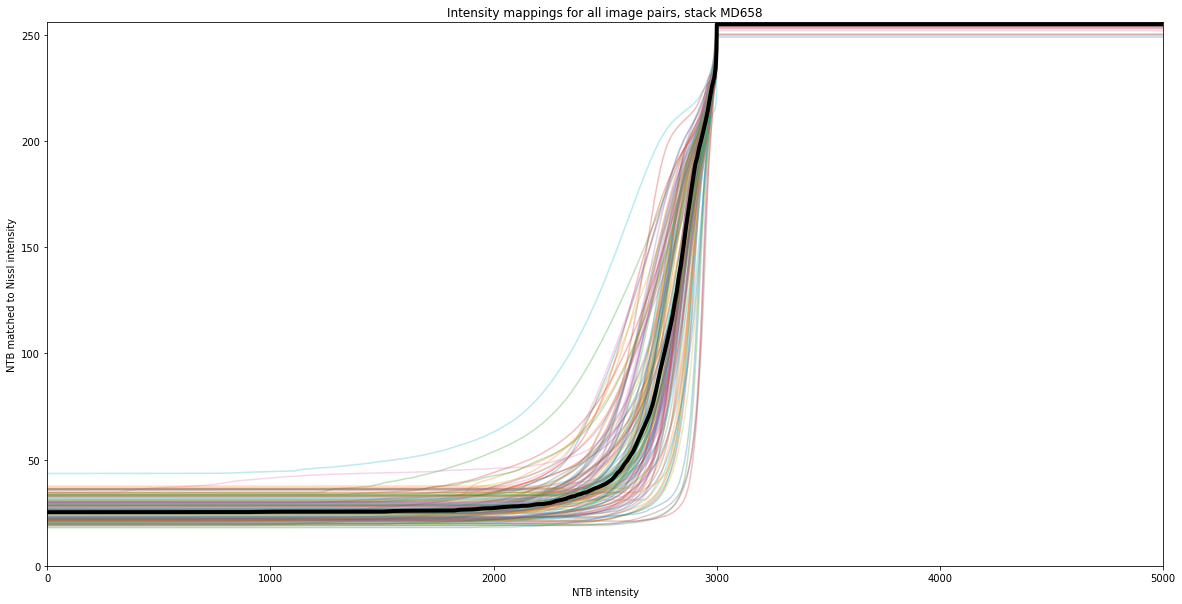

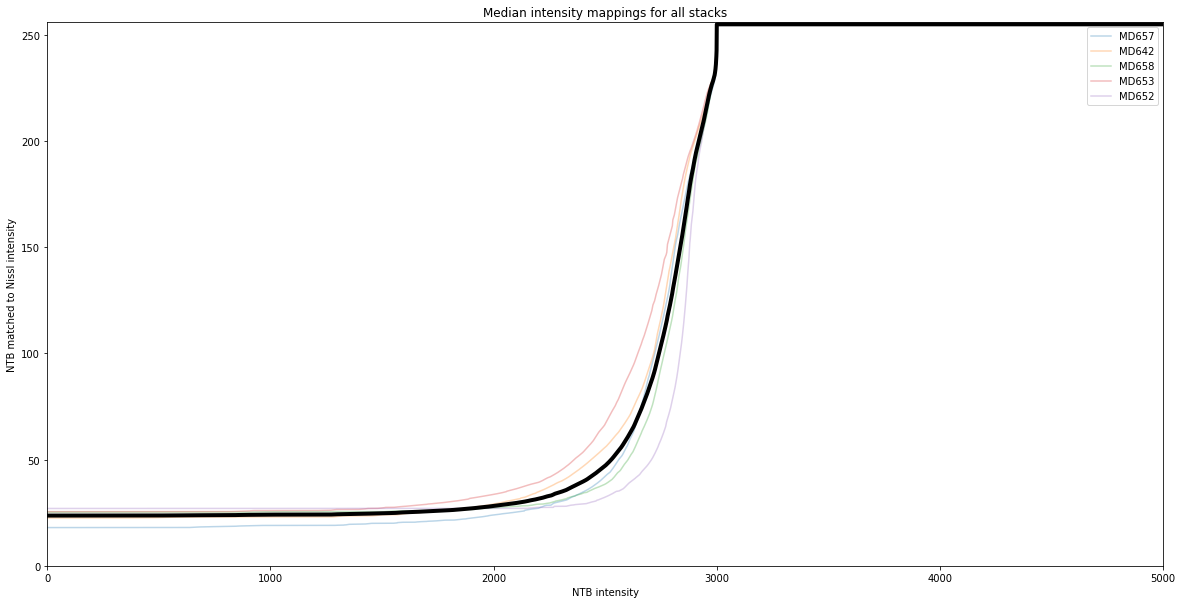

In [2]:
median_intensity_mappings_all_stacks = {}

# for stack in ['MD653']:
for stack in all_alt_nissl_ntb_stacks + all_alt_nissl_tracing_stacks:

    download_from_s3(DataManager.get_sorted_filenames_filename(stack=stack))
    _, sections_to_filenames = DataManager.load_sorted_filenames(stack=stack)

    valid_filenames = [fn for fn in sections_to_filenames.values() if not is_invalid(fn=fn)]
    download_from_s3(DataManager.get_anchor_filename_filename(stack=stack))

    _, _, _, _, first_sec, last_sec = DataManager.load_cropbox(stack=stack)
    first_fn = sections_to_filenames[first_sec]
    last_fn = sections_to_filenames[last_sec]
    first_idx_among_valid = valid_filenames.index(first_fn)
    last_idx_among_valid = valid_filenames.index(last_fn)


    filename_pairs = []
    l = valid_filenames[first_idx_among_valid:last_idx_among_valid+1]
    for i, fn in enumerate(l):
        if l[i].split('-')[1][0] == 'F':
            for d in range(1, 99):
                if i+d < len(l) and l[i+d].split('-')[1][0] == 'N':
                    filename_pairs.append((l[i+d], l[i]))
                    break
                if i-d >= 0 and l[i-d].split('-')[1][0] == 'N':
                    filename_pairs.append((l[i-d], l[i]))
                    break

    ntb_values = np.arange(0, 5000)

    intensity_mapping_all_pairs = {}

    for nissl_fn, ntb_fn in filename_pairs:

        fp = DataManager.get_ntb_to_nissl_intensity_profile_mapping_filepath(stack=stack, ntb_fn=ntb_fn)        
        download_from_s3(fp)
        ntb_intensity_mapping = np.load(fp)

        intensity_mapping_all_pairs[(nissl_fn, ntb_fn)] = ntb_intensity_mapping

    #     plt.figure(figsize=(3,3));
    #     plt.plot(ntb_values, ntb_intensity_mapping)
    #     plt.xlim([0,5000]);
    #     plt.ylim([0,256]);
    #     plt.xlabel('NTB intensity');
    #     plt.ylabel('NTB matched to Nissl intensity');
    #     plt.title('nissl %s\n ntb %s' % (nissl_fn, ntb_fn));
    #     plt.show();

    median_intensity_mapping = np.median(intensity_mapping_all_pairs.values(), axis=0)
    median_intensity_mappings_all_stacks[stack] = median_intensity_mapping
    
    plt.figure(figsize=(20, 10));

    for nissl_fn, ntb_fn in filename_pairs:
        plt.plot(ntb_values, intensity_mapping_all_pairs[(nissl_fn, ntb_fn)], alpha=.3);

    plt.plot(ntb_values, median_intensity_mapping, linewidth=4, c='k');

    plt.xlim([0,5000]);
    plt.ylim([0,256]);
    plt.xlabel('NTB intensity');
    plt.ylabel('NTB matched to Nissl intensity');
    plt.title('Intensity mappings for all image pairs, stack %s' % stack);
    plt.show();
    
mean_intensity_mapping_all_stacks = np.mean(median_intensity_mappings_all_stacks.values(), axis=0)

plt.figure(figsize=(20, 10));
for stack, mim in median_intensity_mappings_all_stacks.iteritems():
    plt.plot(ntb_values, mim, label=stack, alpha=.3);
plt.plot(ntb_values, mean_intensity_mapping_all_stacks, linewidth=4, c='k');
plt.xlim([0,5000]);
plt.ylim([0,256]);
plt.xlabel('NTB intensity');
plt.ylabel('NTB matched to Nissl intensity');
plt.title('Median intensity mappings for all stacks');
plt.legend();
plt.show();

In [6]:
fp = os.path.join(DATA_DIR, 'average_nissl_intensity_mapping.npy')
np.save(fp, mean_intensity_mapping_all_stacks)

# Fit exponential to median intensity mapping

In [3]:
fp = os.path.join(DATA_DIR, 'average_nissl_intensity_mapping.npy')
download_from_s3(fp)
mean_intensity_mapping = np.load(fp)

rm -rf /shared/CSHL_data_processed/average_nissl_intensity_mapping.npy && mkdir -p /shared/CSHL_data_processed
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/average_nissl_intensity_mapping.npy /shared/CSHL_data_processed/average_nissl_intensity_mapping.npy


Child returned 0
Child returned 0
0.46 seconds.


In [6]:
len(mean_intensity_mapping)

5000

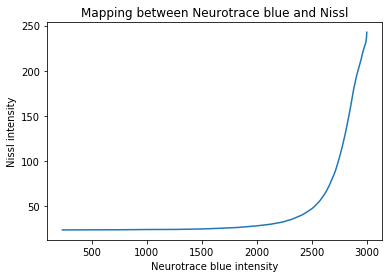

In [4]:
plt.figure();
valid_range = np.where(np.diff(mean_intensity_mapping) != 0)[0]
plt.plot(valid_range, mean_intensity_mapping[valid_range]);
plt.xlabel('Neurotrace blue intensity');
plt.ylabel('Nissl intensity');
plt.title('Mapping between Neurotrace blue and Nissl');

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


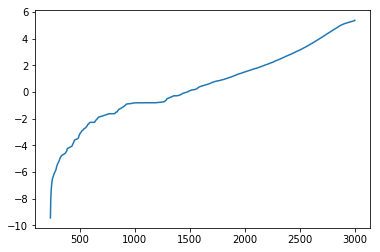

In [25]:
c = mean_intensity_mapping[valid_range].min()
log_f = np.log(mean_intensity_mapping[valid_range] - c)
plt.plot(valid_range, log_f);

- We expect the exponent plot to be linear, but it is NOT fully linear.